<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [16]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>

In [17]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [18]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [19]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
# train_images[0]

We will also need to do this for our test images

In [20]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

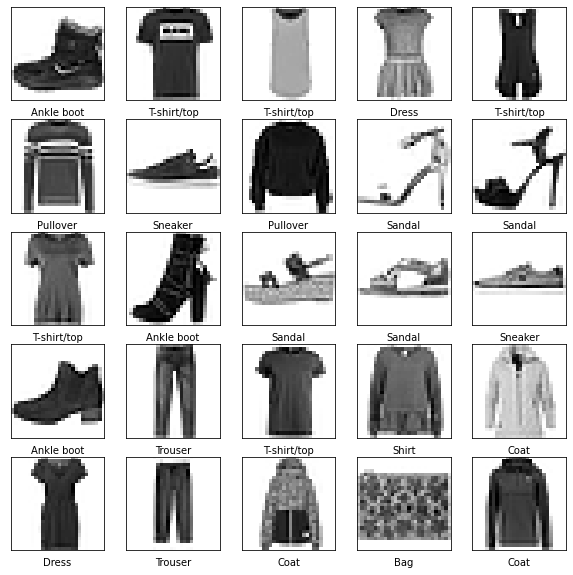

In [22]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [23]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [24]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_1 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [25]:
model.fit(train_images, train_labels, epochs=num_epochs)

Epoch 1/5


   1/1875 [..............................] - ETA: 17:50 - loss: 28.0856 - accuracy: 0.0625

   3/1875 [..............................] - ETA: 57s - loss: 25.7915 - accuracy: 0.0608  

   5/1875 [..............................] - ETA: 1:00 - loss: 23.2352 - accuracy: 0.0736

   8/1875 [..............................] - ETA: 51s - loss: 20.5859 - accuracy: 0.0834 

  10/1875 [..............................] - ETA: 50s - loss: 19.1682 - accuracy: 0.0886

  13/1875 [..............................] - ETA: 47s - loss: 17.3616 - accuracy: 0.1027

  15/1875 [..............................] - ETA: 49s - loss: 16.3481 - accuracy: 0.1138

  16/1875 [..............................] - ETA: 52s - loss: 15.8930 - accuracy: 0.1192

  18/1875 [..............................] - ETA: 56s - loss: 15.0662 - accuracy: 0.1294

  19/1875 [..............................] - ETA: 58s - loss: 14.6895 - accuracy: 0.1345

  21/1875 [..............................] - ETA: 59s - loss: 14.0019 - accuracy: 0.1440

  23/1875 [..............................] - ETA: 1:00 - loss: 13.3862 - accuracy: 0.1540

  25/1875 [..............................] - ETA: 1:01 - loss: 12.8325 - accuracy: 0.1641

  27/1875 [..............................] - ETA: 1:02 - loss: 12.3326 - accuracy: 0.1741

  29/1875 [..............................] - ETA: 1:04 - loss: 11.8788 - accuracy: 0.1841

  30/1875 [..............................] - ETA: 1:06 - loss: 11.6672 - accuracy: 0.1890

  32/1875 [..............................] - ETA: 1:07 - loss: 11.2705 - accuracy: 0.1987

  35/1875 [..............................] - ETA: 1:04 - loss: 10.7346 - accuracy: 0.2125

  39/1875 [..............................] - ETA: 1:00 - loss: 10.1131 - accuracy: 0.2293

  42/1875 [..............................] - ETA: 58s - loss: 9.7031 - accuracy: 0.2413  

  44/1875 [..............................] - ETA: 58s - loss: 9.4520 - accuracy: 0.2492

  47/1875 [..............................] - ETA: 56s - loss: 9.1040 - accuracy: 0.2605

  51/1875 [..............................] - ETA: 54s - loss: 8.6876 - accuracy: 0.2749

  54/1875 [..............................] - ETA: 53s - loss: 8.4050 - accuracy: 0.2852

  58/1875 [..............................] - ETA: 51s - loss: 8.0625 - accuracy: 0.2982

  61/1875 [..............................] - ETA: 50s - loss: 7.8279 - accuracy: 0.3073

  64/1875 [>.............................] - ETA: 49s - loss: 7.6102 - accuracy: 0.3159

  68/1875 [>.............................] - ETA: 47s - loss: 7.3429 - accuracy: 0.3267

  72/1875 [>.............................] - ETA: 46s - loss: 7.0984 - accuracy: 0.3369

  76/1875 [>.............................] - ETA: 45s - loss: 6.8737 - accuracy: 0.3466

  80/1875 [>.............................] - ETA: 44s - loss: 6.6667 - accuracy: 0.3557

  84/1875 [>.............................] - ETA: 43s - loss: 6.4754 - accuracy: 0.3642

  87/1875 [>.............................] - ETA: 43s - loss: 6.3410 - accuracy: 0.3703

  90/1875 [>.............................] - ETA: 42s - loss: 6.2139 - accuracy: 0.3761

  94/1875 [>.............................] - ETA: 42s - loss: 6.0543 - accuracy: 0.3836

  98/1875 [>.............................] - ETA: 41s - loss: 5.9050 - accuracy: 0.3907

 102/1875 [>.............................] - ETA: 40s - loss: 5.7648 - accuracy: 0.3976

 105/1875 [>.............................] - ETA: 40s - loss: 5.6652 - accuracy: 0.4025

 109/1875 [>.............................] - ETA: 40s - loss: 5.5393 - accuracy: 0.4088

 113/1875 [>.............................] - ETA: 39s - loss: 5.4205 - accuracy: 0.4147

 117/1875 [>.............................] - ETA: 39s - loss: 5.3080 - accuracy: 0.4205

 121/1875 [>.............................] - ETA: 38s - loss: 5.2013 - accuracy: 0.4261

 124/1875 [>.............................] - ETA: 38s - loss: 5.1250 - accuracy: 0.4302

 126/1875 [=>............................] - ETA: 39s - loss: 5.0757 - accuracy: 0.4329

 127/1875 [=>............................] - ETA: 39s - loss: 5.0515 - accuracy: 0.4342

 128/1875 [=>............................] - ETA: 39s - loss: 5.0276 - accuracy: 0.4355

 129/1875 [=>............................] - ETA: 40s - loss: 5.0040 - accuracy: 0.4368

 131/1875 [=>............................] - ETA: 40s - loss: 4.9576 - accuracy: 0.4393

 134/1875 [=>............................] - ETA: 40s - loss: 4.8901 - accuracy: 0.4431

 137/1875 [=>............................] - ETA: 39s - loss: 4.8250 - accuracy: 0.4468

 140/1875 [=>............................] - ETA: 39s - loss: 4.7621 - accuracy: 0.4504

 143/1875 [=>............................] - ETA: 39s - loss: 4.7013 - accuracy: 0.4539

 146/1875 [=>............................] - ETA: 39s - loss: 4.6426 - accuracy: 0.4573

 149/1875 [=>............................] - ETA: 38s - loss: 4.5857 - accuracy: 0.4606

 152/1875 [=>............................] - ETA: 38s - loss: 4.5307 - accuracy: 0.4638

 156/1875 [=>............................] - ETA: 38s - loss: 4.4601 - accuracy: 0.4680

 160/1875 [=>............................] - ETA: 37s - loss: 4.3922 - accuracy: 0.4721

 164/1875 [=>............................] - ETA: 37s - loss: 4.3270 - accuracy: 0.4760

 168/1875 [=>............................] - ETA: 37s - loss: 4.2644 - accuracy: 0.4798

 172/1875 [=>............................] - ETA: 36s - loss: 4.2042 - accuracy: 0.4835

 175/1875 [=>............................] - ETA: 36s - loss: 4.1606 - accuracy: 0.4862

 179/1875 [=>............................] - ETA: 36s - loss: 4.1042 - accuracy: 0.4896

 182/1875 [=>............................] - ETA: 36s - loss: 4.0633 - accuracy: 0.4922

 185/1875 [=>............................] - ETA: 36s - loss: 4.0235 - accuracy: 0.4947

 188/1875 [==>...........................] - ETA: 35s - loss: 3.9848 - accuracy: 0.4971

 191/1875 [==>...........................] - ETA: 35s - loss: 3.9471 - accuracy: 0.4994

 194/1875 [==>...........................] - ETA: 35s - loss: 3.9103 - accuracy: 0.5018

 197/1875 [==>...........................] - ETA: 35s - loss: 3.8744 - accuracy: 0.5040

 201/1875 [==>...........................] - ETA: 35s - loss: 3.8280 - accuracy: 0.5070

 205/1875 [==>...........................] - ETA: 34s - loss: 3.7830 - accuracy: 0.5099

 209/1875 [==>...........................] - ETA: 34s - loss: 3.7394 - accuracy: 0.5127

 213/1875 [==>...........................] - ETA: 34s - loss: 3.6971 - accuracy: 0.5155

 216/1875 [==>...........................] - ETA: 34s - loss: 3.6663 - accuracy: 0.5175

 219/1875 [==>...........................] - ETA: 34s - loss: 3.6361 - accuracy: 0.5195

 222/1875 [==>...........................] - ETA: 34s - loss: 3.6065 - accuracy: 0.5215

 225/1875 [==>...........................] - ETA: 34s - loss: 3.5776 - accuracy: 0.5234

 228/1875 [==>...........................] - ETA: 33s - loss: 3.5494 - accuracy: 0.5253

 231/1875 [==>...........................] - ETA: 33s - loss: 3.5218 - accuracy: 0.5272

 233/1875 [==>...........................] - ETA: 33s - loss: 3.5037 - accuracy: 0.5284

 236/1875 [==>...........................] - ETA: 33s - loss: 3.4770 - accuracy: 0.5302

 239/1875 [==>...........................] - ETA: 33s - loss: 3.4509 - accuracy: 0.5319

 243/1875 [==>...........................] - ETA: 33s - loss: 3.4168 - accuracy: 0.5342

 246/1875 [==>...........................] - ETA: 33s - loss: 3.3919 - accuracy: 0.5359

 249/1875 [==>...........................] - ETA: 33s - loss: 3.3675 - accuracy: 0.5376

 252/1875 [===>..........................] - ETA: 33s - loss: 3.3435 - accuracy: 0.5393

 256/1875 [===>..........................] - ETA: 33s - loss: 3.3123 - accuracy: 0.5414

 260/1875 [===>..........................] - ETA: 32s - loss: 3.2818 - accuracy: 0.5436

 264/1875 [===>..........................] - ETA: 32s - loss: 3.2522 - accuracy: 0.5456

 268/1875 [===>..........................] - ETA: 32s - loss: 3.2233 - accuracy: 0.5477

 272/1875 [===>..........................] - ETA: 32s - loss: 3.1951 - accuracy: 0.5497

 275/1875 [===>..........................] - ETA: 32s - loss: 3.1744 - accuracy: 0.5512

 278/1875 [===>..........................] - ETA: 32s - loss: 3.1541 - accuracy: 0.5526

 281/1875 [===>..........................] - ETA: 31s - loss: 3.1341 - accuracy: 0.5540

 285/1875 [===>..........................] - ETA: 31s - loss: 3.1080 - accuracy: 0.5559

 289/1875 [===>..........................] - ETA: 31s - loss: 3.0825 - accuracy: 0.5577

 292/1875 [===>..........................] - ETA: 31s - loss: 3.0638 - accuracy: 0.5591

 296/1875 [===>..........................] - ETA: 31s - loss: 3.0393 - accuracy: 0.5608

 300/1875 [===>..........................] - ETA: 31s - loss: 3.0153 - accuracy: 0.5625

 303/1875 [===>..........................] - ETA: 31s - loss: 2.9977 - accuracy: 0.5638

 307/1875 [===>..........................] - ETA: 30s - loss: 2.9747 - accuracy: 0.5655

 310/1875 [===>..........................] - ETA: 30s - loss: 2.9577 - accuracy: 0.5667

 313/1875 [====>.........................] - ETA: 30s - loss: 2.9410 - accuracy: 0.5679

 317/1875 [====>.........................] - ETA: 30s - loss: 2.9192 - accuracy: 0.5695

 320/1875 [====>.........................] - ETA: 30s - loss: 2.9032 - accuracy: 0.5706

 323/1875 [====>.........................] - ETA: 30s - loss: 2.8873 - accuracy: 0.5718

 327/1875 [====>.........................] - ETA: 30s - loss: 2.8666 - accuracy: 0.5733

 331/1875 [====>.........................] - ETA: 30s - loss: 2.8463 - accuracy: 0.5748

 334/1875 [====>.........................] - ETA: 30s - loss: 2.8313 - accuracy: 0.5759

 337/1875 [====>.........................] - ETA: 29s - loss: 2.8166 - accuracy: 0.5770

 339/1875 [====>.........................] - ETA: 30s - loss: 2.8069 - accuracy: 0.5778

 341/1875 [====>.........................] - ETA: 30s - loss: 2.7973 - accuracy: 0.5785

 343/1875 [====>.........................] - ETA: 30s - loss: 2.7878 - accuracy: 0.5792

 344/1875 [====>.........................] - ETA: 30s - loss: 2.7831 - accuracy: 0.5795

 346/1875 [====>.........................] - ETA: 30s - loss: 2.7737 - accuracy: 0.5802

 349/1875 [====>.........................] - ETA: 30s - loss: 2.7598 - accuracy: 0.5813

 351/1875 [====>.........................] - ETA: 30s - loss: 2.7506 - accuracy: 0.5820

 353/1875 [====>.........................] - ETA: 30s - loss: 2.7415 - accuracy: 0.5827

 354/1875 [====>.........................] - ETA: 31s - loss: 2.7370 - accuracy: 0.5830

 355/1875 [====>.........................] - ETA: 31s - loss: 2.7325 - accuracy: 0.5833

 357/1875 [====>.........................] - ETA: 31s - loss: 2.7236 - accuracy: 0.5840

 359/1875 [====>.........................] - ETA: 31s - loss: 2.7148 - accuracy: 0.5847

 362/1875 [====>.........................] - ETA: 31s - loss: 2.7017 - accuracy: 0.5857

 364/1875 [====>.........................] - ETA: 31s - loss: 2.6931 - accuracy: 0.5863

 367/1875 [====>.........................] - ETA: 31s - loss: 2.6803 - accuracy: 0.5873

 370/1875 [====>.........................] - ETA: 31s - loss: 2.6677 - accuracy: 0.5882

 372/1875 [====>.........................] - ETA: 31s - loss: 2.6594 - accuracy: 0.5889

 374/1875 [====>.........................] - ETA: 31s - loss: 2.6512 - accuracy: 0.5895

 377/1875 [=====>........................] - ETA: 31s - loss: 2.6389 - accuracy: 0.5904

 380/1875 [=====>........................] - ETA: 31s - loss: 2.6269 - accuracy: 0.5914

 382/1875 [=====>........................] - ETA: 31s - loss: 2.6189 - accuracy: 0.5920

 385/1875 [=====>........................] - ETA: 31s - loss: 2.6071 - accuracy: 0.5929

 388/1875 [=====>........................] - ETA: 31s - loss: 2.5955 - accuracy: 0.5938

 391/1875 [=====>........................] - ETA: 31s - loss: 2.5839 - accuracy: 0.5947

 394/1875 [=====>........................] - ETA: 31s - loss: 2.5726 - accuracy: 0.5956

 396/1875 [=====>........................] - ETA: 31s - loss: 2.5651 - accuracy: 0.5962

 399/1875 [=====>........................] - ETA: 30s - loss: 2.5540 - accuracy: 0.5970

 402/1875 [=====>........................] - ETA: 30s - loss: 2.5430 - accuracy: 0.5979

 405/1875 [=====>........................] - ETA: 30s - loss: 2.5321 - accuracy: 0.5987

 408/1875 [=====>........................] - ETA: 30s - loss: 2.5214 - accuracy: 0.5996

 411/1875 [=====>........................] - ETA: 30s - loss: 2.5108 - accuracy: 0.6004

 414/1875 [=====>........................] - ETA: 30s - loss: 2.5004 - accuracy: 0.6012

 417/1875 [=====>........................] - ETA: 30s - loss: 2.4900 - accuracy: 0.6021

 420/1875 [=====>........................] - ETA: 30s - loss: 2.4798 - accuracy: 0.6029

 423/1875 [=====>........................] - ETA: 30s - loss: 2.4697 - accuracy: 0.6037

 425/1875 [=====>........................] - ETA: 30s - loss: 2.4630 - accuracy: 0.6042

 428/1875 [=====>........................] - ETA: 30s - loss: 2.4531 - accuracy: 0.6050

 431/1875 [=====>........................] - ETA: 30s - loss: 2.4433 - accuracy: 0.6058

 434/1875 [=====>........................] - ETA: 30s - loss: 2.4336 - accuracy: 0.6066

 437/1875 [=====>........................] - ETA: 30s - loss: 2.4241 - accuracy: 0.6074

 438/1875 [======>.......................] - ETA: 30s - loss: 2.4209 - accuracy: 0.6076

 440/1875 [======>.......................] - ETA: 30s - loss: 2.4146 - accuracy: 0.6082

 442/1875 [======>.......................] - ETA: 30s - loss: 2.4084 - accuracy: 0.6087

 444/1875 [======>.......................] - ETA: 30s - loss: 2.4022 - accuracy: 0.6092

 447/1875 [======>.......................] - ETA: 30s - loss: 2.3929 - accuracy: 0.6099

 450/1875 [======>.......................] - ETA: 30s - loss: 2.3838 - accuracy: 0.6107

 452/1875 [======>.......................] - ETA: 30s - loss: 2.3778 - accuracy: 0.6112

 455/1875 [======>.......................] - ETA: 30s - loss: 2.3688 - accuracy: 0.6119

 458/1875 [======>.......................] - ETA: 30s - loss: 2.3600 - accuracy: 0.6126

 460/1875 [======>.......................] - ETA: 30s - loss: 2.3541 - accuracy: 0.6131

 463/1875 [======>.......................] - ETA: 30s - loss: 2.3454 - accuracy: 0.6139

 466/1875 [======>.......................] - ETA: 30s - loss: 2.3368 - accuracy: 0.6146

 469/1875 [======>.......................] - ETA: 30s - loss: 2.3283 - accuracy: 0.6153

 472/1875 [======>.......................] - ETA: 29s - loss: 2.3199 - accuracy: 0.6160

 475/1875 [======>.......................] - ETA: 29s - loss: 2.3116 - accuracy: 0.6167

 478/1875 [======>.......................] - ETA: 29s - loss: 2.3033 - accuracy: 0.6174

 481/1875 [======>.......................] - ETA: 29s - loss: 2.2952 - accuracy: 0.6181

 484/1875 [======>.......................] - ETA: 29s - loss: 2.2871 - accuracy: 0.6188

 487/1875 [======>.......................] - ETA: 29s - loss: 2.2791 - accuracy: 0.6194

 490/1875 [======>.......................] - ETA: 29s - loss: 2.2712 - accuracy: 0.6201

 493/1875 [======>.......................] - ETA: 29s - loss: 2.2634 - accuracy: 0.6208

 496/1875 [======>.......................] - ETA: 29s - loss: 2.2556 - accuracy: 0.6215

 499/1875 [======>.......................] - ETA: 29s - loss: 2.2479 - accuracy: 0.6221

 502/1875 [=======>......................] - ETA: 29s - loss: 2.2403 - accuracy: 0.6228

 504/1875 [=======>......................] - ETA: 29s - loss: 2.2353 - accuracy: 0.6232

 507/1875 [=======>......................] - ETA: 29s - loss: 2.2278 - accuracy: 0.6238

 510/1875 [=======>......................] - ETA: 28s - loss: 2.2204 - accuracy: 0.6245

 513/1875 [=======>......................] - ETA: 28s - loss: 2.2131 - accuracy: 0.6251

 516/1875 [=======>......................] - ETA: 28s - loss: 2.2059 - accuracy: 0.6257

 519/1875 [=======>......................] - ETA: 28s - loss: 2.1987 - accuracy: 0.6263

 522/1875 [=======>......................] - ETA: 28s - loss: 2.1916 - accuracy: 0.6270

 525/1875 [=======>......................] - ETA: 28s - loss: 2.1845 - accuracy: 0.6276

 527/1875 [=======>......................] - ETA: 28s - loss: 2.1799 - accuracy: 0.6280

 530/1875 [=======>......................] - ETA: 28s - loss: 2.1729 - accuracy: 0.6286

 533/1875 [=======>......................] - ETA: 28s - loss: 2.1660 - accuracy: 0.6292

 536/1875 [=======>......................] - ETA: 28s - loss: 2.1592 - accuracy: 0.6298

 538/1875 [=======>......................] - ETA: 28s - loss: 2.1547 - accuracy: 0.6302

 541/1875 [=======>......................] - ETA: 28s - loss: 2.1480 - accuracy: 0.6308

 543/1875 [=======>......................] - ETA: 28s - loss: 2.1435 - accuracy: 0.6312

 545/1875 [=======>......................] - ETA: 28s - loss: 2.1391 - accuracy: 0.6315

 548/1875 [=======>......................] - ETA: 28s - loss: 2.1326 - accuracy: 0.6321

 551/1875 [=======>......................] - ETA: 28s - loss: 2.1260 - accuracy: 0.6327

 554/1875 [=======>......................] - ETA: 28s - loss: 2.1196 - accuracy: 0.6333

 557/1875 [=======>......................] - ETA: 28s - loss: 2.1132 - accuracy: 0.6338

 559/1875 [=======>......................] - ETA: 28s - loss: 2.1090 - accuracy: 0.6342

 562/1875 [=======>......................] - ETA: 28s - loss: 2.1027 - accuracy: 0.6348

 565/1875 [========>.....................] - ETA: 27s - loss: 2.0964 - accuracy: 0.6353

 567/1875 [========>.....................] - ETA: 27s - loss: 2.0923 - accuracy: 0.6357

 570/1875 [========>.....................] - ETA: 27s - loss: 2.0861 - accuracy: 0.6363

 573/1875 [========>.....................] - ETA: 27s - loss: 2.0800 - accuracy: 0.6368

 576/1875 [========>.....................] - ETA: 27s - loss: 2.0739 - accuracy: 0.6374

 578/1875 [========>.....................] - ETA: 27s - loss: 2.0699 - accuracy: 0.6377

 581/1875 [========>.....................] - ETA: 27s - loss: 2.0640 - accuracy: 0.6383

 584/1875 [========>.....................] - ETA: 27s - loss: 2.0580 - accuracy: 0.6388

 587/1875 [========>.....................] - ETA: 27s - loss: 2.0522 - accuracy: 0.6393

 590/1875 [========>.....................] - ETA: 27s - loss: 2.0463 - accuracy: 0.6399

 593/1875 [========>.....................] - ETA: 27s - loss: 2.0406 - accuracy: 0.6404

 596/1875 [========>.....................] - ETA: 27s - loss: 2.0348 - accuracy: 0.6409

 599/1875 [========>.....................] - ETA: 27s - loss: 2.0292 - accuracy: 0.6414

 602/1875 [========>.....................] - ETA: 27s - loss: 2.0235 - accuracy: 0.6419

 605/1875 [========>.....................] - ETA: 27s - loss: 2.0179 - accuracy: 0.6424

 607/1875 [========>.....................] - ETA: 27s - loss: 2.0142 - accuracy: 0.6428

 610/1875 [========>.....................] - ETA: 26s - loss: 2.0087 - accuracy: 0.6433

 613/1875 [========>.....................] - ETA: 26s - loss: 2.0032 - accuracy: 0.6438

 616/1875 [========>.....................] - ETA: 26s - loss: 1.9978 - accuracy: 0.6443

 619/1875 [========>.....................] - ETA: 26s - loss: 1.9924 - accuracy: 0.6448

 622/1875 [========>.....................] - ETA: 26s - loss: 1.9871 - accuracy: 0.6453

 625/1875 [=========>....................] - ETA: 26s - loss: 1.9818 - accuracy: 0.6458

 628/1875 [=========>....................] - ETA: 26s - loss: 1.9765 - accuracy: 0.6463

 631/1875 [=========>....................] - ETA: 26s - loss: 1.9713 - accuracy: 0.6468

 634/1875 [=========>....................] - ETA: 26s - loss: 1.9661 - accuracy: 0.6472

 637/1875 [=========>....................] - ETA: 26s - loss: 1.9610 - accuracy: 0.6477

 640/1875 [=========>....................] - ETA: 26s - loss: 1.9559 - accuracy: 0.6482

 643/1875 [=========>....................] - ETA: 26s - loss: 1.9508 - accuracy: 0.6487

 644/1875 [=========>....................] - ETA: 26s - loss: 1.9491 - accuracy: 0.6488

 646/1875 [=========>....................] - ETA: 26s - loss: 1.9458 - accuracy: 0.6491

 648/1875 [=========>....................] - ETA: 26s - loss: 1.9425 - accuracy: 0.6494

 650/1875 [=========>....................] - ETA: 26s - loss: 1.9392 - accuracy: 0.6497

 653/1875 [=========>....................] - ETA: 26s - loss: 1.9342 - accuracy: 0.6502

 656/1875 [=========>....................] - ETA: 26s - loss: 1.9293 - accuracy: 0.6507

 659/1875 [=========>....................] - ETA: 26s - loss: 1.9245 - accuracy: 0.6511

 662/1875 [=========>....................] - ETA: 26s - loss: 1.9197 - accuracy: 0.6516

 665/1875 [=========>....................] - ETA: 26s - loss: 1.9149 - accuracy: 0.6520

 668/1875 [=========>....................] - ETA: 25s - loss: 1.9101 - accuracy: 0.6525

 671/1875 [=========>....................] - ETA: 25s - loss: 1.9054 - accuracy: 0.6529

 673/1875 [=========>....................] - ETA: 25s - loss: 1.9023 - accuracy: 0.6532

 676/1875 [=========>....................] - ETA: 25s - loss: 1.8976 - accuracy: 0.6536

 679/1875 [=========>....................] - ETA: 25s - loss: 1.8930 - accuracy: 0.6541

 682/1875 [=========>....................] - ETA: 25s - loss: 1.8884 - accuracy: 0.6545

 685/1875 [=========>....................] - ETA: 25s - loss: 1.8839 - accuracy: 0.6550

 688/1875 [==========>...................] - ETA: 25s - loss: 1.8794 - accuracy: 0.6554

 691/1875 [==========>...................] - ETA: 25s - loss: 1.8749 - accuracy: 0.6558

 694/1875 [==========>...................] - ETA: 25s - loss: 1.8704 - accuracy: 0.6562

 695/1875 [==========>...................] - ETA: 25s - loss: 1.8690 - accuracy: 0.6564

 698/1875 [==========>...................] - ETA: 25s - loss: 1.8646 - accuracy: 0.6568

 700/1875 [==========>...................] - ETA: 25s - loss: 1.8616 - accuracy: 0.6571

 702/1875 [==========>...................] - ETA: 25s - loss: 1.8587 - accuracy: 0.6573

 704/1875 [==========>...................] - ETA: 25s - loss: 1.8558 - accuracy: 0.6576

 706/1875 [==========>...................] - ETA: 25s - loss: 1.8530 - accuracy: 0.6579

 708/1875 [==========>...................] - ETA: 25s - loss: 1.8501 - accuracy: 0.6582

 710/1875 [==========>...................] - ETA: 25s - loss: 1.8472 - accuracy: 0.6584

 712/1875 [==========>...................] - ETA: 25s - loss: 1.8444 - accuracy: 0.6587

 715/1875 [==========>...................] - ETA: 25s - loss: 1.8402 - accuracy: 0.6591

 717/1875 [==========>...................] - ETA: 25s - loss: 1.8374 - accuracy: 0.6594

 720/1875 [==========>...................] - ETA: 25s - loss: 1.8332 - accuracy: 0.6598

 722/1875 [==========>...................] - ETA: 25s - loss: 1.8304 - accuracy: 0.6601

 724/1875 [==========>...................] - ETA: 25s - loss: 1.8277 - accuracy: 0.6603

 726/1875 [==========>...................] - ETA: 25s - loss: 1.8249 - accuracy: 0.6606

 727/1875 [==========>...................] - ETA: 25s - loss: 1.8236 - accuracy: 0.6607

 729/1875 [==========>...................] - ETA: 25s - loss: 1.8208 - accuracy: 0.6610

 730/1875 [==========>...................] - ETA: 25s - loss: 1.8195 - accuracy: 0.6611

 731/1875 [==========>...................] - ETA: 25s - loss: 1.8181 - accuracy: 0.6612

 733/1875 [==========>...................] - ETA: 25s - loss: 1.8154 - accuracy: 0.6615

 735/1875 [==========>...................] - ETA: 25s - loss: 1.8127 - accuracy: 0.6618

 737/1875 [==========>...................] - ETA: 25s - loss: 1.8101 - accuracy: 0.6620

 739/1875 [==========>...................] - ETA: 25s - loss: 1.8074 - accuracy: 0.6623

 740/1875 [==========>...................] - ETA: 25s - loss: 1.8061 - accuracy: 0.6624

 742/1875 [==========>...................] - ETA: 25s - loss: 1.8034 - accuracy: 0.6627

 743/1875 [==========>...................] - ETA: 25s - loss: 1.8021 - accuracy: 0.6628

 745/1875 [==========>...................] - ETA: 25s - loss: 1.7995 - accuracy: 0.6631

 747/1875 [==========>...................] - ETA: 25s - loss: 1.7968 - accuracy: 0.6633

 749/1875 [==========>...................] - ETA: 25s - loss: 1.7942 - accuracy: 0.6636

 751/1875 [===========>..................] - ETA: 25s - loss: 1.7916 - accuracy: 0.6638

 752/1875 [===========>..................] - ETA: 25s - loss: 1.7904 - accuracy: 0.6639

 753/1875 [===========>..................] - ETA: 25s - loss: 1.7891 - accuracy: 0.6641

 755/1875 [===========>..................] - ETA: 25s - loss: 1.7865 - accuracy: 0.6643

 757/1875 [===========>..................] - ETA: 25s - loss: 1.7839 - accuracy: 0.6646

 759/1875 [===========>..................] - ETA: 25s - loss: 1.7814 - accuracy: 0.6648

 761/1875 [===========>..................] - ETA: 25s - loss: 1.7788 - accuracy: 0.6651

 763/1875 [===========>..................] - ETA: 25s - loss: 1.7763 - accuracy: 0.6653

 766/1875 [===========>..................] - ETA: 25s - loss: 1.7726 - accuracy: 0.6657

 768/1875 [===========>..................] - ETA: 25s - loss: 1.7701 - accuracy: 0.6659

 771/1875 [===========>..................] - ETA: 25s - loss: 1.7663 - accuracy: 0.6663

 774/1875 [===========>..................] - ETA: 25s - loss: 1.7626 - accuracy: 0.6666

 777/1875 [===========>..................] - ETA: 24s - loss: 1.7589 - accuracy: 0.6670

 780/1875 [===========>..................] - ETA: 24s - loss: 1.7553 - accuracy: 0.6674

 782/1875 [===========>..................] - ETA: 24s - loss: 1.7528 - accuracy: 0.6676

 785/1875 [===========>..................] - ETA: 24s - loss: 1.7492 - accuracy: 0.6680

 787/1875 [===========>..................] - ETA: 24s - loss: 1.7468 - accuracy: 0.6682

 790/1875 [===========>..................] - ETA: 24s - loss: 1.7432 - accuracy: 0.6686

 793/1875 [===========>..................] - ETA: 24s - loss: 1.7397 - accuracy: 0.6689

 795/1875 [===========>..................] - ETA: 24s - loss: 1.7373 - accuracy: 0.6691

 798/1875 [===========>..................] - ETA: 24s - loss: 1.7338 - accuracy: 0.6695

 801/1875 [===========>..................] - ETA: 24s - loss: 1.7303 - accuracy: 0.6698

 804/1875 [===========>..................] - ETA: 24s - loss: 1.7268 - accuracy: 0.6702

 807/1875 [===========>..................] - ETA: 24s - loss: 1.7233 - accuracy: 0.6705

 809/1875 [===========>..................] - ETA: 24s - loss: 1.7210 - accuracy: 0.6708

 812/1875 [===========>..................] - ETA: 24s - loss: 1.7176 - accuracy: 0.6711

 815/1875 [============>.................] - ETA: 24s - loss: 1.7142 - accuracy: 0.6714

 818/1875 [============>.................] - ETA: 23s - loss: 1.7108 - accuracy: 0.6718

 821/1875 [============>.................] - ETA: 23s - loss: 1.7075 - accuracy: 0.6721

 824/1875 [============>.................] - ETA: 23s - loss: 1.7041 - accuracy: 0.6724

 827/1875 [============>.................] - ETA: 23s - loss: 1.7008 - accuracy: 0.6728

 830/1875 [============>.................] - ETA: 23s - loss: 1.6975 - accuracy: 0.6731

 833/1875 [============>.................] - ETA: 23s - loss: 1.6942 - accuracy: 0.6734

 836/1875 [============>.................] - ETA: 23s - loss: 1.6910 - accuracy: 0.6738

 838/1875 [============>.................] - ETA: 23s - loss: 1.6888 - accuracy: 0.6740

 840/1875 [============>.................] - ETA: 23s - loss: 1.6866 - accuracy: 0.6742

 843/1875 [============>.................] - ETA: 23s - loss: 1.6834 - accuracy: 0.6745

 845/1875 [============>.................] - ETA: 23s - loss: 1.6813 - accuracy: 0.6748

 847/1875 [============>.................] - ETA: 23s - loss: 1.6792 - accuracy: 0.6750

 849/1875 [============>.................] - ETA: 23s - loss: 1.6770 - accuracy: 0.6752

 852/1875 [============>.................] - ETA: 23s - loss: 1.6739 - accuracy: 0.6755

 853/1875 [============>.................] - ETA: 23s - loss: 1.6728 - accuracy: 0.6756

 856/1875 [============>.................] - ETA: 23s - loss: 1.6697 - accuracy: 0.6759

 858/1875 [============>.................] - ETA: 23s - loss: 1.6676 - accuracy: 0.6761

 860/1875 [============>.................] - ETA: 23s - loss: 1.6655 - accuracy: 0.6763

 862/1875 [============>.................] - ETA: 23s - loss: 1.6635 - accuracy: 0.6766

 864/1875 [============>.................] - ETA: 23s - loss: 1.6614 - accuracy: 0.6768

 865/1875 [============>.................] - ETA: 23s - loss: 1.6604 - accuracy: 0.6769

 867/1875 [============>.................] - ETA: 23s - loss: 1.6583 - accuracy: 0.6771

 869/1875 [============>.................] - ETA: 23s - loss: 1.6563 - accuracy: 0.6773

 871/1875 [============>.................] - ETA: 23s - loss: 1.6543 - accuracy: 0.6775

 873/1875 [============>.................] - ETA: 23s - loss: 1.6522 - accuracy: 0.6777

 876/1875 [=============>................] - ETA: 23s - loss: 1.6492 - accuracy: 0.6780

 877/1875 [=============>................] - ETA: 23s - loss: 1.6482 - accuracy: 0.6781

 879/1875 [=============>................] - ETA: 23s - loss: 1.6462 - accuracy: 0.6783

 880/1875 [=============>................] - ETA: 23s - loss: 1.6452 - accuracy: 0.6784

 882/1875 [=============>................] - ETA: 22s - loss: 1.6432 - accuracy: 0.6786

 884/1875 [=============>................] - ETA: 22s - loss: 1.6412 - accuracy: 0.6788

 885/1875 [=============>................] - ETA: 22s - loss: 1.6402 - accuracy: 0.6789

 886/1875 [=============>................] - ETA: 22s - loss: 1.6393 - accuracy: 0.6790

 887/1875 [=============>................] - ETA: 22s - loss: 1.6383 - accuracy: 0.6791

 889/1875 [=============>................] - ETA: 22s - loss: 1.6363 - accuracy: 0.6793

 891/1875 [=============>................] - ETA: 22s - loss: 1.6344 - accuracy: 0.6796

 892/1875 [=============>................] - ETA: 22s - loss: 1.6334 - accuracy: 0.6797

 894/1875 [=============>................] - ETA: 22s - loss: 1.6314 - accuracy: 0.6799

 896/1875 [=============>................] - ETA: 22s - loss: 1.6295 - accuracy: 0.6801

 897/1875 [=============>................] - ETA: 22s - loss: 1.6285 - accuracy: 0.6802

 899/1875 [=============>................] - ETA: 22s - loss: 1.6266 - accuracy: 0.6804

 901/1875 [=============>................] - ETA: 22s - loss: 1.6247 - accuracy: 0.6806

 903/1875 [=============>................] - ETA: 22s - loss: 1.6228 - accuracy: 0.6808

 905/1875 [=============>................] - ETA: 22s - loss: 1.6208 - accuracy: 0.6810

 906/1875 [=============>................] - ETA: 22s - loss: 1.6199 - accuracy: 0.6810

 907/1875 [=============>................] - ETA: 22s - loss: 1.6189 - accuracy: 0.6811

 909/1875 [=============>................] - ETA: 22s - loss: 1.6171 - accuracy: 0.6813

 910/1875 [=============>................] - ETA: 22s - loss: 1.6161 - accuracy: 0.6814

 912/1875 [=============>................] - ETA: 22s - loss: 1.6142 - accuracy: 0.6816

 914/1875 [=============>................] - ETA: 22s - loss: 1.6124 - accuracy: 0.6818

 916/1875 [=============>................] - ETA: 22s - loss: 1.6105 - accuracy: 0.6820

 920/1875 [=============>................] - ETA: 22s - loss: 1.6068 - accuracy: 0.6824

 923/1875 [=============>................] - ETA: 22s - loss: 1.6040 - accuracy: 0.6827

 927/1875 [=============>................] - ETA: 22s - loss: 1.6003 - accuracy: 0.6831

 931/1875 [=============>................] - ETA: 22s - loss: 1.5967 - accuracy: 0.6835

 934/1875 [=============>................] - ETA: 22s - loss: 1.5940 - accuracy: 0.6838

 938/1875 [==============>...............] - ETA: 22s - loss: 1.5904 - accuracy: 0.6841

 942/1875 [==============>...............] - ETA: 21s - loss: 1.5868 - accuracy: 0.6845

 946/1875 [==============>...............] - ETA: 21s - loss: 1.5832 - accuracy: 0.6849

 950/1875 [==============>...............] - ETA: 21s - loss: 1.5797 - accuracy: 0.6853

 953/1875 [==============>...............] - ETA: 21s - loss: 1.5771 - accuracy: 0.6855

 957/1875 [==============>...............] - ETA: 21s - loss: 1.5736 - accuracy: 0.6859

 961/1875 [==============>...............] - ETA: 21s - loss: 1.5702 - accuracy: 0.6863

 965/1875 [==============>...............] - ETA: 21s - loss: 1.5667 - accuracy: 0.6866

 969/1875 [==============>...............] - ETA: 21s - loss: 1.5633 - accuracy: 0.6870

 973/1875 [==============>...............] - ETA: 20s - loss: 1.5599 - accuracy: 0.6874

 977/1875 [==============>...............] - ETA: 20s - loss: 1.5566 - accuracy: 0.6877

 981/1875 [==============>...............] - ETA: 20s - loss: 1.5532 - accuracy: 0.6881

 985/1875 [==============>...............] - ETA: 20s - loss: 1.5499 - accuracy: 0.6884

 989/1875 [==============>...............] - ETA: 20s - loss: 1.5466 - accuracy: 0.6888

 993/1875 [==============>...............] - ETA: 20s - loss: 1.5433 - accuracy: 0.6891

 997/1875 [==============>...............] - ETA: 20s - loss: 1.5401 - accuracy: 0.6895

1000/1875 [===============>..............] - ETA: 20s - loss: 1.5377 - accuracy: 0.6898

1004/1875 [===============>..............] - ETA: 20s - loss: 1.5344 - accuracy: 0.6901

1008/1875 [===============>..............] - ETA: 19s - loss: 1.5312 - accuracy: 0.6905

1012/1875 [===============>..............] - ETA: 19s - loss: 1.5281 - accuracy: 0.6908

1016/1875 [===============>..............] - ETA: 19s - loss: 1.5249 - accuracy: 0.6911

1020/1875 [===============>..............] - ETA: 19s - loss: 1.5218 - accuracy: 0.6915

1024/1875 [===============>..............] - ETA: 19s - loss: 1.5187 - accuracy: 0.6918

1028/1875 [===============>..............] - ETA: 19s - loss: 1.5156 - accuracy: 0.6922

1032/1875 [===============>..............] - ETA: 19s - loss: 1.5125 - accuracy: 0.6925

1036/1875 [===============>..............] - ETA: 19s - loss: 1.5094 - accuracy: 0.6928

1040/1875 [===============>..............] - ETA: 19s - loss: 1.5064 - accuracy: 0.6932

1044/1875 [===============>..............] - ETA: 18s - loss: 1.5034 - accuracy: 0.6935

1048/1875 [===============>..............] - ETA: 18s - loss: 1.5004 - accuracy: 0.6938

1052/1875 [===============>..............] - ETA: 18s - loss: 1.4974 - accuracy: 0.6942

1056/1875 [===============>..............] - ETA: 18s - loss: 1.4945 - accuracy: 0.6945

1059/1875 [===============>..............] - ETA: 18s - loss: 1.4922 - accuracy: 0.6947

1063/1875 [================>.............] - ETA: 18s - loss: 1.4893 - accuracy: 0.6951

1067/1875 [================>.............] - ETA: 18s - loss: 1.4864 - accuracy: 0.6954

1071/1875 [================>.............] - ETA: 18s - loss: 1.4835 - accuracy: 0.6957

1075/1875 [================>.............] - ETA: 18s - loss: 1.4806 - accuracy: 0.6960

1079/1875 [================>.............] - ETA: 17s - loss: 1.4778 - accuracy: 0.6964

1083/1875 [================>.............] - ETA: 17s - loss: 1.4749 - accuracy: 0.6967

1087/1875 [================>.............] - ETA: 17s - loss: 1.4721 - accuracy: 0.6970

1091/1875 [================>.............] - ETA: 17s - loss: 1.4693 - accuracy: 0.6973

1095/1875 [================>.............] - ETA: 17s - loss: 1.4665 - accuracy: 0.6976

1099/1875 [================>.............] - ETA: 17s - loss: 1.4638 - accuracy: 0.6979

1103/1875 [================>.............] - ETA: 17s - loss: 1.4610 - accuracy: 0.6982

1107/1875 [================>.............] - ETA: 17s - loss: 1.4583 - accuracy: 0.6985

1111/1875 [================>.............] - ETA: 17s - loss: 1.4555 - accuracy: 0.6988

1115/1875 [================>.............] - ETA: 16s - loss: 1.4528 - accuracy: 0.6991

1119/1875 [================>.............] - ETA: 16s - loss: 1.4501 - accuracy: 0.6995

1123/1875 [================>.............] - ETA: 16s - loss: 1.4475 - accuracy: 0.6998

1127/1875 [=================>............] - ETA: 16s - loss: 1.4448 - accuracy: 0.7001

1131/1875 [=================>............] - ETA: 16s - loss: 1.4422 - accuracy: 0.7004

1134/1875 [=================>............] - ETA: 16s - loss: 1.4402 - accuracy: 0.7006

1138/1875 [=================>............] - ETA: 16s - loss: 1.4376 - accuracy: 0.7009

1142/1875 [=================>............] - ETA: 16s - loss: 1.4350 - accuracy: 0.7012

1146/1875 [=================>............] - ETA: 16s - loss: 1.4324 - accuracy: 0.7015

1150/1875 [=================>............] - ETA: 15s - loss: 1.4298 - accuracy: 0.7018

1154/1875 [=================>............] - ETA: 15s - loss: 1.4272 - accuracy: 0.7021

1158/1875 [=================>............] - ETA: 15s - loss: 1.4247 - accuracy: 0.7023

1162/1875 [=================>............] - ETA: 15s - loss: 1.4222 - accuracy: 0.7026

1166/1875 [=================>............] - ETA: 15s - loss: 1.4197 - accuracy: 0.7029

1170/1875 [=================>............] - ETA: 15s - loss: 1.4172 - accuracy: 0.7032

1174/1875 [=================>............] - ETA: 15s - loss: 1.4147 - accuracy: 0.7035

1178/1875 [=================>............] - ETA: 15s - loss: 1.4122 - accuracy: 0.7038

1182/1875 [=================>............] - ETA: 15s - loss: 1.4097 - accuracy: 0.7041

1186/1875 [=================>............] - ETA: 15s - loss: 1.4073 - accuracy: 0.7044

1189/1875 [==================>...........] - ETA: 14s - loss: 1.4055 - accuracy: 0.7046

1191/1875 [==================>...........] - ETA: 14s - loss: 1.4043 - accuracy: 0.7047

1194/1875 [==================>...........] - ETA: 14s - loss: 1.4024 - accuracy: 0.7049

1198/1875 [==================>...........] - ETA: 14s - loss: 1.4000 - accuracy: 0.7052

1202/1875 [==================>...........] - ETA: 14s - loss: 1.3976 - accuracy: 0.7055

1206/1875 [==================>...........] - ETA: 14s - loss: 1.3953 - accuracy: 0.7057

1208/1875 [==================>...........] - ETA: 14s - loss: 1.3941 - accuracy: 0.7059

1210/1875 [==================>...........] - ETA: 14s - loss: 1.3929 - accuracy: 0.7060

1212/1875 [==================>...........] - ETA: 14s - loss: 1.3917 - accuracy: 0.7062

1216/1875 [==================>...........] - ETA: 14s - loss: 1.3894 - accuracy: 0.7064

1220/1875 [==================>...........] - ETA: 14s - loss: 1.3870 - accuracy: 0.7067

1224/1875 [==================>...........] - ETA: 14s - loss: 1.3847 - accuracy: 0.7070

1228/1875 [==================>...........] - ETA: 14s - loss: 1.3824 - accuracy: 0.7072

1232/1875 [==================>...........] - ETA: 13s - loss: 1.3801 - accuracy: 0.7075

1235/1875 [==================>...........] - ETA: 13s - loss: 1.3784 - accuracy: 0.7077

1239/1875 [==================>...........] - ETA: 13s - loss: 1.3761 - accuracy: 0.7080

1243/1875 [==================>...........] - ETA: 13s - loss: 1.3738 - accuracy: 0.7082

1247/1875 [==================>...........] - ETA: 13s - loss: 1.3716 - accuracy: 0.7085

1251/1875 [===================>..........] - ETA: 13s - loss: 1.3693 - accuracy: 0.7088

1254/1875 [===================>..........] - ETA: 13s - loss: 1.3677 - accuracy: 0.7090

1258/1875 [===================>..........] - ETA: 13s - loss: 1.3655 - accuracy: 0.7092

1262/1875 [===================>..........] - ETA: 13s - loss: 1.3633 - accuracy: 0.7095

1266/1875 [===================>..........] - ETA: 13s - loss: 1.3611 - accuracy: 0.7097

1270/1875 [===================>..........] - ETA: 13s - loss: 1.3589 - accuracy: 0.7100

1274/1875 [===================>..........] - ETA: 12s - loss: 1.3567 - accuracy: 0.7102

1277/1875 [===================>..........] - ETA: 12s - loss: 1.3551 - accuracy: 0.7104

1279/1875 [===================>..........] - ETA: 12s - loss: 1.3540 - accuracy: 0.7106

1281/1875 [===================>..........] - ETA: 12s - loss: 1.3529 - accuracy: 0.7107

1283/1875 [===================>..........] - ETA: 12s - loss: 1.3519 - accuracy: 0.7108

1285/1875 [===================>..........] - ETA: 12s - loss: 1.3508 - accuracy: 0.7109

1287/1875 [===================>..........] - ETA: 12s - loss: 1.3497 - accuracy: 0.7111

1289/1875 [===================>..........] - ETA: 12s - loss: 1.3487 - accuracy: 0.7112

1291/1875 [===================>..........] - ETA: 12s - loss: 1.3476 - accuracy: 0.7113

1293/1875 [===================>..........] - ETA: 12s - loss: 1.3465 - accuracy: 0.7114

1295/1875 [===================>..........] - ETA: 12s - loss: 1.3455 - accuracy: 0.7116

1297/1875 [===================>..........] - ETA: 12s - loss: 1.3444 - accuracy: 0.7117

1299/1875 [===================>..........] - ETA: 12s - loss: 1.3434 - accuracy: 0.7118

1301/1875 [===================>..........] - ETA: 12s - loss: 1.3423 - accuracy: 0.7119

1303/1875 [===================>..........] - ETA: 12s - loss: 1.3413 - accuracy: 0.7121

1305/1875 [===================>..........] - ETA: 12s - loss: 1.3403 - accuracy: 0.7122

1308/1875 [===================>..........] - ETA: 12s - loss: 1.3387 - accuracy: 0.7124

1312/1875 [===================>..........] - ETA: 12s - loss: 1.3366 - accuracy: 0.7126

1316/1875 [====================>.........] - ETA: 12s - loss: 1.3346 - accuracy: 0.7129

1320/1875 [====================>.........] - ETA: 12s - loss: 1.3325 - accuracy: 0.7131

1323/1875 [====================>.........] - ETA: 12s - loss: 1.3310 - accuracy: 0.7133

1327/1875 [====================>.........] - ETA: 11s - loss: 1.3290 - accuracy: 0.7135

1331/1875 [====================>.........] - ETA: 11s - loss: 1.3270 - accuracy: 0.7138

1335/1875 [====================>.........] - ETA: 11s - loss: 1.3250 - accuracy: 0.7140

1339/1875 [====================>.........] - ETA: 11s - loss: 1.3230 - accuracy: 0.7142

1342/1875 [====================>.........] - ETA: 11s - loss: 1.3215 - accuracy: 0.7144

1345/1875 [====================>.........] - ETA: 11s - loss: 1.3200 - accuracy: 0.7146

1349/1875 [====================>.........] - ETA: 11s - loss: 1.3180 - accuracy: 0.7148

1353/1875 [====================>.........] - ETA: 11s - loss: 1.3160 - accuracy: 0.7151

1357/1875 [====================>.........] - ETA: 11s - loss: 1.3141 - accuracy: 0.7153

1361/1875 [====================>.........] - ETA: 11s - loss: 1.3121 - accuracy: 0.7155

1365/1875 [====================>.........] - ETA: 11s - loss: 1.3102 - accuracy: 0.7158

1369/1875 [====================>.........] - ETA: 10s - loss: 1.3083 - accuracy: 0.7160

1373/1875 [====================>.........] - ETA: 10s - loss: 1.3064 - accuracy: 0.7162

1377/1875 [=====================>........] - ETA: 10s - loss: 1.3045 - accuracy: 0.7165

1381/1875 [=====================>........] - ETA: 10s - loss: 1.3026 - accuracy: 0.7167

1385/1875 [=====================>........] - ETA: 10s - loss: 1.3007 - accuracy: 0.7169

1389/1875 [=====================>........] - ETA: 10s - loss: 1.2988 - accuracy: 0.7171

1393/1875 [=====================>........] - ETA: 10s - loss: 1.2969 - accuracy: 0.7174

1397/1875 [=====================>........] - ETA: 10s - loss: 1.2951 - accuracy: 0.7176

1399/1875 [=====================>........] - ETA: 10s - loss: 1.2941 - accuracy: 0.7177

1403/1875 [=====================>........] - ETA: 10s - loss: 1.2923 - accuracy: 0.7179

1407/1875 [=====================>........] - ETA: 10s - loss: 1.2905 - accuracy: 0.7181

1411/1875 [=====================>........] - ETA: 9s - loss: 1.2886 - accuracy: 0.7184 

1415/1875 [=====================>........] - ETA: 9s - loss: 1.2868 - accuracy: 0.7186

1419/1875 [=====================>........] - ETA: 9s - loss: 1.2850 - accuracy: 0.7188

1423/1875 [=====================>........] - ETA: 9s - loss: 1.2832 - accuracy: 0.7190

1427/1875 [=====================>........] - ETA: 9s - loss: 1.2814 - accuracy: 0.7193

1431/1875 [=====================>........] - ETA: 9s - loss: 1.2796 - accuracy: 0.7195

1435/1875 [=====================>........] - ETA: 9s - loss: 1.2778 - accuracy: 0.7197

1439/1875 [======================>.......] - ETA: 9s - loss: 1.2761 - accuracy: 0.7199

1443/1875 [======================>.......] - ETA: 9s - loss: 1.2743 - accuracy: 0.7201

1447/1875 [======================>.......] - ETA: 9s - loss: 1.2725 - accuracy: 0.7203

1450/1875 [======================>.......] - ETA: 9s - loss: 1.2712 - accuracy: 0.7205

1454/1875 [======================>.......] - ETA: 8s - loss: 1.2695 - accuracy: 0.7207

1458/1875 [======================>.......] - ETA: 8s - loss: 1.2677 - accuracy: 0.7209

1462/1875 [======================>.......] - ETA: 8s - loss: 1.2660 - accuracy: 0.7211

1466/1875 [======================>.......] - ETA: 8s - loss: 1.2643 - accuracy: 0.7214

1469/1875 [======================>.......] - ETA: 8s - loss: 1.2630 - accuracy: 0.7215

1472/1875 [======================>.......] - ETA: 8s - loss: 1.2617 - accuracy: 0.7217

1476/1875 [======================>.......] - ETA: 8s - loss: 1.2600 - accuracy: 0.7219

1479/1875 [======================>.......] - ETA: 8s - loss: 1.2588 - accuracy: 0.7220

1482/1875 [======================>.......] - ETA: 8s - loss: 1.2575 - accuracy: 0.7222

1486/1875 [======================>.......] - ETA: 8s - loss: 1.2558 - accuracy: 0.7224

1490/1875 [======================>.......] - ETA: 8s - loss: 1.2541 - accuracy: 0.7226

1494/1875 [======================>.......] - ETA: 8s - loss: 1.2525 - accuracy: 0.7228

1498/1875 [======================>.......] - ETA: 7s - loss: 1.2508 - accuracy: 0.7230

1502/1875 [=======================>......] - ETA: 7s - loss: 1.2491 - accuracy: 0.7232

1506/1875 [=======================>......] - ETA: 7s - loss: 1.2475 - accuracy: 0.7234

1510/1875 [=======================>......] - ETA: 7s - loss: 1.2458 - accuracy: 0.7236

1514/1875 [=======================>......] - ETA: 7s - loss: 1.2442 - accuracy: 0.7239

1518/1875 [=======================>......] - ETA: 7s - loss: 1.2426 - accuracy: 0.7241

1522/1875 [=======================>......] - ETA: 7s - loss: 1.2410 - accuracy: 0.7243

1525/1875 [=======================>......] - ETA: 7s - loss: 1.2397 - accuracy: 0.7244

1529/1875 [=======================>......] - ETA: 7s - loss: 1.2381 - accuracy: 0.7246

1533/1875 [=======================>......] - ETA: 7s - loss: 1.2365 - accuracy: 0.7248

1537/1875 [=======================>......] - ETA: 7s - loss: 1.2349 - accuracy: 0.7250

1541/1875 [=======================>......] - ETA: 7s - loss: 1.2333 - accuracy: 0.7252

1545/1875 [=======================>......] - ETA: 6s - loss: 1.2318 - accuracy: 0.7254

1549/1875 [=======================>......] - ETA: 6s - loss: 1.2302 - accuracy: 0.7256

1553/1875 [=======================>......] - ETA: 6s - loss: 1.2286 - accuracy: 0.7258

1557/1875 [=======================>......] - ETA: 6s - loss: 1.2270 - accuracy: 0.7260

1561/1875 [=======================>......] - ETA: 6s - loss: 1.2255 - accuracy: 0.7262

1565/1875 [========================>.....] - ETA: 6s - loss: 1.2239 - accuracy: 0.7264

1569/1875 [========================>.....] - ETA: 6s - loss: 1.2224 - accuracy: 0.7266

1573/1875 [========================>.....] - ETA: 6s - loss: 1.2209 - accuracy: 0.7268

1577/1875 [========================>.....] - ETA: 6s - loss: 1.2193 - accuracy: 0.7270

1581/1875 [========================>.....] - ETA: 6s - loss: 1.2178 - accuracy: 0.7272

1585/1875 [========================>.....] - ETA: 6s - loss: 1.2163 - accuracy: 0.7274

1588/1875 [========================>.....] - ETA: 5s - loss: 1.2151 - accuracy: 0.7275

1592/1875 [========================>.....] - ETA: 5s - loss: 1.2136 - accuracy: 0.7277

1595/1875 [========================>.....] - ETA: 5s - loss: 1.2125 - accuracy: 0.7279

1598/1875 [========================>.....] - ETA: 5s - loss: 1.2114 - accuracy: 0.7280

1602/1875 [========================>.....] - ETA: 5s - loss: 1.2099 - accuracy: 0.7282

1606/1875 [========================>.....] - ETA: 5s - loss: 1.2084 - accuracy: 0.7284

1610/1875 [========================>.....] - ETA: 5s - loss: 1.2069 - accuracy: 0.7286

1614/1875 [========================>.....] - ETA: 5s - loss: 1.2055 - accuracy: 0.7288

1618/1875 [========================>.....] - ETA: 5s - loss: 1.2040 - accuracy: 0.7289

1622/1875 [========================>.....] - ETA: 5s - loss: 1.2025 - accuracy: 0.7291

1626/1875 [=========================>....] - ETA: 5s - loss: 1.2011 - accuracy: 0.7293

1629/1875 [=========================>....] - ETA: 5s - loss: 1.2000 - accuracy: 0.7295

1633/1875 [=========================>....] - ETA: 5s - loss: 1.1986 - accuracy: 0.7296

1637/1875 [=========================>....] - ETA: 4s - loss: 1.1971 - accuracy: 0.7298

1640/1875 [=========================>....] - ETA: 4s - loss: 1.1960 - accuracy: 0.7300

1642/1875 [=========================>....] - ETA: 4s - loss: 1.1953 - accuracy: 0.7301

1645/1875 [=========================>....] - ETA: 4s - loss: 1.1943 - accuracy: 0.7302

1648/1875 [=========================>....] - ETA: 4s - loss: 1.1932 - accuracy: 0.7303

1651/1875 [=========================>....] - ETA: 4s - loss: 1.1921 - accuracy: 0.7305

1655/1875 [=========================>....] - ETA: 4s - loss: 1.1907 - accuracy: 0.7307

1659/1875 [=========================>....] - ETA: 4s - loss: 1.1893 - accuracy: 0.7308

1663/1875 [=========================>....] - ETA: 4s - loss: 1.1879 - accuracy: 0.7310

1667/1875 [=========================>....] - ETA: 4s - loss: 1.1865 - accuracy: 0.7312

1671/1875 [=========================>....] - ETA: 4s - loss: 1.1851 - accuracy: 0.7314

1675/1875 [=========================>....] - ETA: 4s - loss: 1.1837 - accuracy: 0.7316

1679/1875 [=========================>....] - ETA: 4s - loss: 1.1823 - accuracy: 0.7317

1683/1875 [=========================>....] - ETA: 3s - loss: 1.1810 - accuracy: 0.7319

1687/1875 [=========================>....] - ETA: 3s - loss: 1.1796 - accuracy: 0.7321

1691/1875 [==========================>...] - ETA: 3s - loss: 1.1782 - accuracy: 0.7323

1695/1875 [==========================>...] - ETA: 3s - loss: 1.1769 - accuracy: 0.7324

1699/1875 [==========================>...] - ETA: 3s - loss: 1.1755 - accuracy: 0.7326

1703/1875 [==========================>...] - ETA: 3s - loss: 1.1742 - accuracy: 0.7328

1707/1875 [==========================>...] - ETA: 3s - loss: 1.1728 - accuracy: 0.7330

1711/1875 [==========================>...] - ETA: 3s - loss: 1.1715 - accuracy: 0.7331

1715/1875 [==========================>...] - ETA: 3s - loss: 1.1702 - accuracy: 0.7333

1719/1875 [==========================>...] - ETA: 3s - loss: 1.1688 - accuracy: 0.7335

1723/1875 [==========================>...] - ETA: 3s - loss: 1.1675 - accuracy: 0.7337

1726/1875 [==========================>...] - ETA: 3s - loss: 1.1665 - accuracy: 0.7338

1730/1875 [==========================>...] - ETA: 2s - loss: 1.1652 - accuracy: 0.7340

1732/1875 [==========================>...] - ETA: 2s - loss: 1.1646 - accuracy: 0.7340

1734/1875 [==========================>...] - ETA: 2s - loss: 1.1639 - accuracy: 0.7341

1736/1875 [==========================>...] - ETA: 2s - loss: 1.1633 - accuracy: 0.7342

1738/1875 [==========================>...] - ETA: 2s - loss: 1.1626 - accuracy: 0.7343

1741/1875 [==========================>...] - ETA: 2s - loss: 1.1616 - accuracy: 0.7344

1745/1875 [==========================>...] - ETA: 2s - loss: 1.1604 - accuracy: 0.7346

1749/1875 [==========================>...] - ETA: 2s - loss: 1.1591 - accuracy: 0.7348

1753/1875 [===========================>..] - ETA: 2s - loss: 1.1578 - accuracy: 0.7349

1757/1875 [===========================>..] - ETA: 2s - loss: 1.1565 - accuracy: 0.7351

1761/1875 [===========================>..] - ETA: 2s - loss: 1.1552 - accuracy: 0.7353

1765/1875 [===========================>..] - ETA: 2s - loss: 1.1540 - accuracy: 0.7354

1769/1875 [===========================>..] - ETA: 2s - loss: 1.1527 - accuracy: 0.7356

1773/1875 [===========================>..] - ETA: 2s - loss: 1.1514 - accuracy: 0.7358

1776/1875 [===========================>..] - ETA: 2s - loss: 1.1505 - accuracy: 0.7359

1780/1875 [===========================>..] - ETA: 1s - loss: 1.1492 - accuracy: 0.7360

1784/1875 [===========================>..] - ETA: 1s - loss: 1.1480 - accuracy: 0.7362

1788/1875 [===========================>..] - ETA: 1s - loss: 1.1468 - accuracy: 0.7364

1792/1875 [===========================>..] - ETA: 1s - loss: 1.1455 - accuracy: 0.7365

1796/1875 [===========================>..] - ETA: 1s - loss: 1.1443 - accuracy: 0.7367

1800/1875 [===========================>..] - ETA: 1s - loss: 1.1431 - accuracy: 0.7368

1804/1875 [===========================>..] - ETA: 1s - loss: 1.1418 - accuracy: 0.7370

1808/1875 [===========================>..] - ETA: 1s - loss: 1.1406 - accuracy: 0.7372

1812/1875 [===========================>..] - ETA: 1s - loss: 1.1394 - accuracy: 0.7373

1816/1875 [============================>.] - ETA: 1s - loss: 1.1382 - accuracy: 0.7375

1819/1875 [============================>.] - ETA: 1s - loss: 1.1373 - accuracy: 0.7376

1823/1875 [============================>.] - ETA: 1s - loss: 1.1361 - accuracy: 0.7378

1825/1875 [============================>.] - ETA: 1s - loss: 1.1355 - accuracy: 0.7378

1827/1875 [============================>.] - ETA: 0s - loss: 1.1349 - accuracy: 0.7379

1829/1875 [============================>.] - ETA: 0s - loss: 1.1343 - accuracy: 0.7380

1831/1875 [============================>.] - ETA: 0s - loss: 1.1337 - accuracy: 0.7381

1832/1875 [============================>.] - ETA: 0s - loss: 1.1334 - accuracy: 0.7381

1834/1875 [============================>.] - ETA: 0s - loss: 1.1328 - accuracy: 0.7382

1836/1875 [============================>.] - ETA: 0s - loss: 1.1322 - accuracy: 0.7383

1838/1875 [============================>.] - ETA: 0s - loss: 1.1316 - accuracy: 0.7384

1840/1875 [============================>.] - ETA: 0s - loss: 1.1310 - accuracy: 0.7384

1842/1875 [============================>.] - ETA: 0s - loss: 1.1304 - accuracy: 0.7385

1844/1875 [============================>.] - ETA: 0s - loss: 1.1299 - accuracy: 0.7386

1846/1875 [============================>.] - ETA: 0s - loss: 1.1293 - accuracy: 0.7387

1848/1875 [============================>.] - ETA: 0s - loss: 1.1287 - accuracy: 0.7387

1850/1875 [============================>.] - ETA: 0s - loss: 1.1281 - accuracy: 0.7388

1852/1875 [============================>.] - ETA: 0s - loss: 1.1275 - accuracy: 0.7389

1854/1875 [============================>.] - ETA: 0s - loss: 1.1269 - accuracy: 0.7390

1856/1875 [============================>.] - ETA: 0s - loss: 1.1263 - accuracy: 0.7391

1858/1875 [============================>.] - ETA: 0s - loss: 1.1258 - accuracy: 0.7391

1860/1875 [============================>.] - ETA: 0s - loss: 1.1252 - accuracy: 0.7392

1862/1875 [============================>.] - ETA: 0s - loss: 1.1246 - accuracy: 0.7393

1864/1875 [============================>.] - ETA: 0s - loss: 1.1240 - accuracy: 0.7394

1865/1875 [============================>.] - ETA: 0s - loss: 1.1237 - accuracy: 0.7394

1867/1875 [============================>.] - ETA: 0s - loss: 1.1232 - accuracy: 0.7395

1869/1875 [============================>.] - ETA: 0s - loss: 1.1226 - accuracy: 0.7396

1871/1875 [============================>.] - ETA: 0s - loss: 1.1220 - accuracy: 0.7396

1873/1875 [============================>.] - ETA: 0s - loss: 1.1214 - accuracy: 0.7397

1875/1875 [==============================] - ETA: 0s - loss: 1.1209 - accuracy: 0.7398

1875/1875 [==============================] - 39s 21ms/step - loss: 1.1206 - accuracy: 0.7398


Epoch 2/5


   1/1875 [..............................] - ETA: 1:26 - loss: 0.2737 - accuracy: 0.8750

   3/1875 [..............................] - ETA: 1:07 - loss: 0.2812 - accuracy: 0.8733

   5/1875 [..............................] - ETA: 1:09 - loss: 0.3158 - accuracy: 0.8590

   7/1875 [..............................] - ETA: 1:09 - loss: 0.3335 - accuracy: 0.8540

   9/1875 [..............................] - ETA: 1:09 - loss: 0.3406 - accuracy: 0.8525

  10/1875 [..............................] - ETA: 1:12 - loss: 0.3443 - accuracy: 0.8513

  12/1875 [..............................] - ETA: 1:13 - loss: 0.3478 - accuracy: 0.8511

  14/1875 [..............................] - ETA: 1:10 - loss: 0.3476 - accuracy: 0.8522

  18/1875 [..............................] - ETA: 1:00 - loss: 0.3496 - accuracy: 0.8533

  22/1875 [..............................] - ETA: 54s - loss: 0.3528 - accuracy: 0.8538 

  26/1875 [..............................] - ETA: 49s - loss: 0.3550 - accuracy: 0.8540

  30/1875 [..............................] - ETA: 46s - loss: 0.3546 - accuracy: 0.8553

  34/1875 [..............................] - ETA: 44s - loss: 0.3536 - accuracy: 0.8569

  38/1875 [..............................] - ETA: 42s - loss: 0.3528 - accuracy: 0.8582

  42/1875 [..............................] - ETA: 41s - loss: 0.3518 - accuracy: 0.8594

  46/1875 [..............................] - ETA: 39s - loss: 0.3510 - accuracy: 0.8604

  50/1875 [..............................] - ETA: 38s - loss: 0.3505 - accuracy: 0.8610

  54/1875 [..............................] - ETA: 38s - loss: 0.3504 - accuracy: 0.8614

  58/1875 [..............................] - ETA: 37s - loss: 0.3501 - accuracy: 0.8619

  62/1875 [..............................] - ETA: 36s - loss: 0.3498 - accuracy: 0.8623

  64/1875 [>.............................] - ETA: 36s - loss: 0.3497 - accuracy: 0.8625

  67/1875 [>.............................] - ETA: 36s - loss: 0.3495 - accuracy: 0.8628

  68/1875 [>.............................] - ETA: 37s - loss: 0.3495 - accuracy: 0.8629

  70/1875 [>.............................] - ETA: 38s - loss: 0.3493 - accuracy: 0.8631

  72/1875 [>.............................] - ETA: 39s - loss: 0.3491 - accuracy: 0.8633

  75/1875 [>.............................] - ETA: 39s - loss: 0.3487 - accuracy: 0.8637

  77/1875 [>.............................] - ETA: 39s - loss: 0.3484 - accuracy: 0.8639

  79/1875 [>.............................] - ETA: 39s - loss: 0.3481 - accuracy: 0.8641

  82/1875 [>.............................] - ETA: 39s - loss: 0.3478 - accuracy: 0.8644

  84/1875 [>.............................] - ETA: 40s - loss: 0.3475 - accuracy: 0.8646

  86/1875 [>.............................] - ETA: 41s - loss: 0.3473 - accuracy: 0.8648

  88/1875 [>.............................] - ETA: 41s - loss: 0.3472 - accuracy: 0.8650

  90/1875 [>.............................] - ETA: 42s - loss: 0.3470 - accuracy: 0.8652

  92/1875 [>.............................] - ETA: 43s - loss: 0.3469 - accuracy: 0.8653

  94/1875 [>.............................] - ETA: 43s - loss: 0.3468 - accuracy: 0.8655

  96/1875 [>.............................] - ETA: 43s - loss: 0.3467 - accuracy: 0.8656

 100/1875 [>.............................] - ETA: 43s - loss: 0.3465 - accuracy: 0.8659

 102/1875 [>.............................] - ETA: 43s - loss: 0.3465 - accuracy: 0.8660

 106/1875 [>.............................] - ETA: 42s - loss: 0.3465 - accuracy: 0.8662

 110/1875 [>.............................] - ETA: 41s - loss: 0.3466 - accuracy: 0.8664

 114/1875 [>.............................] - ETA: 41s - loss: 0.3467 - accuracy: 0.8665

 118/1875 [>.............................] - ETA: 40s - loss: 0.3470 - accuracy: 0.8666

 122/1875 [>.............................] - ETA: 40s - loss: 0.3472 - accuracy: 0.8668

 126/1875 [=>............................] - ETA: 39s - loss: 0.3474 - accuracy: 0.8669

 130/1875 [=>............................] - ETA: 39s - loss: 0.3477 - accuracy: 0.8670

 134/1875 [=>............................] - ETA: 38s - loss: 0.3478 - accuracy: 0.8672

 138/1875 [=>............................] - ETA: 38s - loss: 0.3479 - accuracy: 0.8673

 141/1875 [=>............................] - ETA: 38s - loss: 0.3480 - accuracy: 0.8675

 145/1875 [=>............................] - ETA: 37s - loss: 0.3480 - accuracy: 0.8676

 149/1875 [=>............................] - ETA: 37s - loss: 0.3481 - accuracy: 0.8677

 152/1875 [=>............................] - ETA: 37s - loss: 0.3481 - accuracy: 0.8678

 156/1875 [=>............................] - ETA: 36s - loss: 0.3482 - accuracy: 0.8679

 159/1875 [=>............................] - ETA: 36s - loss: 0.3483 - accuracy: 0.8680

 162/1875 [=>............................] - ETA: 36s - loss: 0.3484 - accuracy: 0.8681

 166/1875 [=>............................] - ETA: 36s - loss: 0.3484 - accuracy: 0.8682

 170/1875 [=>............................] - ETA: 36s - loss: 0.3485 - accuracy: 0.8683

 174/1875 [=>............................] - ETA: 35s - loss: 0.3486 - accuracy: 0.8684

 178/1875 [=>............................] - ETA: 35s - loss: 0.3486 - accuracy: 0.8684

 182/1875 [=>............................] - ETA: 35s - loss: 0.3487 - accuracy: 0.8685

 186/1875 [=>............................] - ETA: 34s - loss: 0.3487 - accuracy: 0.8686

 190/1875 [==>...........................] - ETA: 34s - loss: 0.3487 - accuracy: 0.8687

 194/1875 [==>...........................] - ETA: 34s - loss: 0.3487 - accuracy: 0.8688

 198/1875 [==>...........................] - ETA: 34s - loss: 0.3487 - accuracy: 0.8689

 201/1875 [==>...........................] - ETA: 34s - loss: 0.3487 - accuracy: 0.8690

 204/1875 [==>...........................] - ETA: 33s - loss: 0.3487 - accuracy: 0.8691

 207/1875 [==>...........................] - ETA: 33s - loss: 0.3487 - accuracy: 0.8692

 211/1875 [==>...........................] - ETA: 33s - loss: 0.3487 - accuracy: 0.8692

 215/1875 [==>...........................] - ETA: 33s - loss: 0.3488 - accuracy: 0.8693

 217/1875 [==>...........................] - ETA: 33s - loss: 0.3488 - accuracy: 0.8693

 221/1875 [==>...........................] - ETA: 33s - loss: 0.3489 - accuracy: 0.8694

 224/1875 [==>...........................] - ETA: 33s - loss: 0.3489 - accuracy: 0.8695

 228/1875 [==>...........................] - ETA: 32s - loss: 0.3490 - accuracy: 0.8695

 232/1875 [==>...........................] - ETA: 32s - loss: 0.3490 - accuracy: 0.8696

 236/1875 [==>...........................] - ETA: 32s - loss: 0.3492 - accuracy: 0.8697

 240/1875 [==>...........................] - ETA: 32s - loss: 0.3493 - accuracy: 0.8697

 244/1875 [==>...........................] - ETA: 32s - loss: 0.3494 - accuracy: 0.8698

 248/1875 [==>...........................] - ETA: 31s - loss: 0.3495 - accuracy: 0.8698

 252/1875 [===>..........................] - ETA: 31s - loss: 0.3496 - accuracy: 0.8699

 256/1875 [===>..........................] - ETA: 31s - loss: 0.3497 - accuracy: 0.8699

 260/1875 [===>..........................] - ETA: 31s - loss: 0.3498 - accuracy: 0.8700

 264/1875 [===>..........................] - ETA: 31s - loss: 0.3499 - accuracy: 0.8700

 268/1875 [===>..........................] - ETA: 30s - loss: 0.3500 - accuracy: 0.8701

 272/1875 [===>..........................] - ETA: 30s - loss: 0.3501 - accuracy: 0.8701

 276/1875 [===>..........................] - ETA: 30s - loss: 0.3502 - accuracy: 0.8701

 280/1875 [===>..........................] - ETA: 30s - loss: 0.3503 - accuracy: 0.8701

 284/1875 [===>..........................] - ETA: 30s - loss: 0.3504 - accuracy: 0.8702

 288/1875 [===>..........................] - ETA: 30s - loss: 0.3505 - accuracy: 0.8702

 292/1875 [===>..........................] - ETA: 30s - loss: 0.3507 - accuracy: 0.8702

 296/1875 [===>..........................] - ETA: 29s - loss: 0.3508 - accuracy: 0.8702

 299/1875 [===>..........................] - ETA: 29s - loss: 0.3508 - accuracy: 0.8702

 301/1875 [===>..........................] - ETA: 30s - loss: 0.3509 - accuracy: 0.8702

 303/1875 [===>..........................] - ETA: 30s - loss: 0.3509 - accuracy: 0.8702

 305/1875 [===>..........................] - ETA: 30s - loss: 0.3510 - accuracy: 0.8702

 307/1875 [===>..........................] - ETA: 30s - loss: 0.3511 - accuracy: 0.8702

 309/1875 [===>..........................] - ETA: 30s - loss: 0.3511 - accuracy: 0.8703

 311/1875 [===>..........................] - ETA: 30s - loss: 0.3511 - accuracy: 0.8703

 313/1875 [====>.........................] - ETA: 30s - loss: 0.3512 - accuracy: 0.8703

 317/1875 [====>.........................] - ETA: 30s - loss: 0.3513 - accuracy: 0.8703

 321/1875 [====>.........................] - ETA: 30s - loss: 0.3514 - accuracy: 0.8703

 325/1875 [====>.........................] - ETA: 30s - loss: 0.3515 - accuracy: 0.8703

 328/1875 [====>.........................] - ETA: 30s - loss: 0.3515 - accuracy: 0.8704

 332/1875 [====>.........................] - ETA: 29s - loss: 0.3516 - accuracy: 0.8704

 335/1875 [====>.........................] - ETA: 29s - loss: 0.3517 - accuracy: 0.8704

 338/1875 [====>.........................] - ETA: 29s - loss: 0.3518 - accuracy: 0.8704

 342/1875 [====>.........................] - ETA: 29s - loss: 0.3519 - accuracy: 0.8704

 346/1875 [====>.........................] - ETA: 29s - loss: 0.3520 - accuracy: 0.8704

 350/1875 [====>.........................] - ETA: 29s - loss: 0.3521 - accuracy: 0.8704

 354/1875 [====>.........................] - ETA: 29s - loss: 0.3521 - accuracy: 0.8704

 358/1875 [====>.........................] - ETA: 29s - loss: 0.3522 - accuracy: 0.8704

 362/1875 [====>.........................] - ETA: 29s - loss: 0.3523 - accuracy: 0.8704

 366/1875 [====>.........................] - ETA: 28s - loss: 0.3524 - accuracy: 0.8704

 370/1875 [====>.........................] - ETA: 28s - loss: 0.3524 - accuracy: 0.8704

 373/1875 [====>.........................] - ETA: 28s - loss: 0.3525 - accuracy: 0.8704

 377/1875 [=====>........................] - ETA: 28s - loss: 0.3526 - accuracy: 0.8704

 381/1875 [=====>........................] - ETA: 28s - loss: 0.3526 - accuracy: 0.8704

 385/1875 [=====>........................] - ETA: 28s - loss: 0.3527 - accuracy: 0.8704

 389/1875 [=====>........................] - ETA: 28s - loss: 0.3528 - accuracy: 0.8704

 393/1875 [=====>........................] - ETA: 27s - loss: 0.3528 - accuracy: 0.8704

 397/1875 [=====>........................] - ETA: 27s - loss: 0.3529 - accuracy: 0.8704

 399/1875 [=====>........................] - ETA: 27s - loss: 0.3529 - accuracy: 0.8704

 403/1875 [=====>........................] - ETA: 27s - loss: 0.3530 - accuracy: 0.8704

 406/1875 [=====>........................] - ETA: 27s - loss: 0.3530 - accuracy: 0.8704

 410/1875 [=====>........................] - ETA: 27s - loss: 0.3531 - accuracy: 0.8704

 414/1875 [=====>........................] - ETA: 27s - loss: 0.3532 - accuracy: 0.8704

 418/1875 [=====>........................] - ETA: 27s - loss: 0.3532 - accuracy: 0.8704

 422/1875 [=====>........................] - ETA: 27s - loss: 0.3533 - accuracy: 0.8703

 426/1875 [=====>........................] - ETA: 26s - loss: 0.3534 - accuracy: 0.8703

 430/1875 [=====>........................] - ETA: 26s - loss: 0.3535 - accuracy: 0.8703

 431/1875 [=====>........................] - ETA: 27s - loss: 0.3535 - accuracy: 0.8703

 432/1875 [=====>........................] - ETA: 27s - loss: 0.3535 - accuracy: 0.8703

 434/1875 [=====>........................] - ETA: 27s - loss: 0.3535 - accuracy: 0.8703

 435/1875 [=====>........................] - ETA: 28s - loss: 0.3535 - accuracy: 0.8703

 437/1875 [=====>........................] - ETA: 28s - loss: 0.3536 - accuracy: 0.8703

 439/1875 [======>.......................] - ETA: 28s - loss: 0.3536 - accuracy: 0.8703

 443/1875 [======>.......................] - ETA: 28s - loss: 0.3537 - accuracy: 0.8703

 447/1875 [======>.......................] - ETA: 28s - loss: 0.3538 - accuracy: 0.8703

 451/1875 [======>.......................] - ETA: 27s - loss: 0.3539 - accuracy: 0.8702

 455/1875 [======>.......................] - ETA: 27s - loss: 0.3540 - accuracy: 0.8702

 459/1875 [======>.......................] - ETA: 27s - loss: 0.3540 - accuracy: 0.8702

 462/1875 [======>.......................] - ETA: 27s - loss: 0.3541 - accuracy: 0.8702

 466/1875 [======>.......................] - ETA: 27s - loss: 0.3542 - accuracy: 0.8702

 470/1875 [======>.......................] - ETA: 27s - loss: 0.3542 - accuracy: 0.8702

 473/1875 [======>.......................] - ETA: 27s - loss: 0.3543 - accuracy: 0.8702

 477/1875 [======>.......................] - ETA: 27s - loss: 0.3544 - accuracy: 0.8701

 481/1875 [======>.......................] - ETA: 27s - loss: 0.3545 - accuracy: 0.8701

 485/1875 [======>.......................] - ETA: 26s - loss: 0.3545 - accuracy: 0.8701

 489/1875 [======>.......................] - ETA: 26s - loss: 0.3546 - accuracy: 0.8701

 492/1875 [======>.......................] - ETA: 26s - loss: 0.3547 - accuracy: 0.8701

 496/1875 [======>.......................] - ETA: 26s - loss: 0.3548 - accuracy: 0.8701

 500/1875 [=======>......................] - ETA: 26s - loss: 0.3548 - accuracy: 0.8700

 504/1875 [=======>......................] - ETA: 26s - loss: 0.3549 - accuracy: 0.8700

 508/1875 [=======>......................] - ETA: 26s - loss: 0.3550 - accuracy: 0.8700

 512/1875 [=======>......................] - ETA: 26s - loss: 0.3551 - accuracy: 0.8700

 516/1875 [=======>......................] - ETA: 26s - loss: 0.3551 - accuracy: 0.8700

 518/1875 [=======>......................] - ETA: 26s - loss: 0.3552 - accuracy: 0.8700

 522/1875 [=======>......................] - ETA: 26s - loss: 0.3552 - accuracy: 0.8700

 525/1875 [=======>......................] - ETA: 25s - loss: 0.3553 - accuracy: 0.8700

 529/1875 [=======>......................] - ETA: 25s - loss: 0.3553 - accuracy: 0.8700

 533/1875 [=======>......................] - ETA: 25s - loss: 0.3554 - accuracy: 0.8700

 537/1875 [=======>......................] - ETA: 25s - loss: 0.3554 - accuracy: 0.8699

 541/1875 [=======>......................] - ETA: 25s - loss: 0.3555 - accuracy: 0.8699

 545/1875 [=======>......................] - ETA: 25s - loss: 0.3556 - accuracy: 0.8699

 549/1875 [=======>......................] - ETA: 25s - loss: 0.3556 - accuracy: 0.8699

 553/1875 [=======>......................] - ETA: 25s - loss: 0.3557 - accuracy: 0.8699

 556/1875 [=======>......................] - ETA: 25s - loss: 0.3557 - accuracy: 0.8699

 560/1875 [=======>......................] - ETA: 25s - loss: 0.3558 - accuracy: 0.8699

 564/1875 [========>.....................] - ETA: 24s - loss: 0.3558 - accuracy: 0.8699

 568/1875 [========>.....................] - ETA: 24s - loss: 0.3559 - accuracy: 0.8699

 572/1875 [========>.....................] - ETA: 24s - loss: 0.3559 - accuracy: 0.8699

 576/1875 [========>.....................] - ETA: 24s - loss: 0.3560 - accuracy: 0.8699

 580/1875 [========>.....................] - ETA: 24s - loss: 0.3560 - accuracy: 0.8699

 583/1875 [========>.....................] - ETA: 24s - loss: 0.3560 - accuracy: 0.8699

 585/1875 [========>.....................] - ETA: 24s - loss: 0.3561 - accuracy: 0.8699

 587/1875 [========>.....................] - ETA: 24s - loss: 0.3561 - accuracy: 0.8699

 589/1875 [========>.....................] - ETA: 24s - loss: 0.3561 - accuracy: 0.8699

 590/1875 [========>.....................] - ETA: 24s - loss: 0.3561 - accuracy: 0.8699

 592/1875 [========>.....................] - ETA: 24s - loss: 0.3561 - accuracy: 0.8698

 594/1875 [========>.....................] - ETA: 24s - loss: 0.3562 - accuracy: 0.8698

 596/1875 [========>.....................] - ETA: 24s - loss: 0.3562 - accuracy: 0.8698

 598/1875 [========>.....................] - ETA: 24s - loss: 0.3562 - accuracy: 0.8698

 600/1875 [========>.....................] - ETA: 24s - loss: 0.3562 - accuracy: 0.8698

 602/1875 [========>.....................] - ETA: 24s - loss: 0.3562 - accuracy: 0.8698

 604/1875 [========>.....................] - ETA: 24s - loss: 0.3563 - accuracy: 0.8698

 606/1875 [========>.....................] - ETA: 24s - loss: 0.3563 - accuracy: 0.8698

 608/1875 [========>.....................] - ETA: 24s - loss: 0.3563 - accuracy: 0.8698

 611/1875 [========>.....................] - ETA: 24s - loss: 0.3563 - accuracy: 0.8698

 614/1875 [========>.....................] - ETA: 24s - loss: 0.3564 - accuracy: 0.8698

 618/1875 [========>.....................] - ETA: 24s - loss: 0.3564 - accuracy: 0.8698

 622/1875 [========>.....................] - ETA: 24s - loss: 0.3564 - accuracy: 0.8698

 626/1875 [=========>....................] - ETA: 24s - loss: 0.3565 - accuracy: 0.8698

 630/1875 [=========>....................] - ETA: 24s - loss: 0.3565 - accuracy: 0.8698

 634/1875 [=========>....................] - ETA: 24s - loss: 0.3565 - accuracy: 0.8698

 638/1875 [=========>....................] - ETA: 24s - loss: 0.3565 - accuracy: 0.8697

 642/1875 [=========>....................] - ETA: 23s - loss: 0.3566 - accuracy: 0.8697

 646/1875 [=========>....................] - ETA: 23s - loss: 0.3566 - accuracy: 0.8697

 650/1875 [=========>....................] - ETA: 23s - loss: 0.3566 - accuracy: 0.8697

 654/1875 [=========>....................] - ETA: 23s - loss: 0.3566 - accuracy: 0.8697

 658/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 662/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 665/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 667/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 669/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 671/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 673/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 675/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 677/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 679/1875 [=========>....................] - ETA: 23s - loss: 0.3567 - accuracy: 0.8697

 681/1875 [=========>....................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 683/1875 [=========>....................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 685/1875 [=========>....................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 687/1875 [=========>....................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 689/1875 [==========>...................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 691/1875 [==========>...................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 693/1875 [==========>...................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 695/1875 [==========>...................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 698/1875 [==========>...................] - ETA: 23s - loss: 0.3568 - accuracy: 0.8697

 701/1875 [==========>...................] - ETA: 23s - loss: 0.3569 - accuracy: 0.8697

 705/1875 [==========>...................] - ETA: 23s - loss: 0.3569 - accuracy: 0.8697

 709/1875 [==========>...................] - ETA: 23s - loss: 0.3569 - accuracy: 0.8697

 713/1875 [==========>...................] - ETA: 23s - loss: 0.3569 - accuracy: 0.8696

 717/1875 [==========>...................] - ETA: 23s - loss: 0.3569 - accuracy: 0.8696

 721/1875 [==========>...................] - ETA: 22s - loss: 0.3569 - accuracy: 0.8696

 725/1875 [==========>...................] - ETA: 22s - loss: 0.3570 - accuracy: 0.8696

 729/1875 [==========>...................] - ETA: 22s - loss: 0.3570 - accuracy: 0.8696

 733/1875 [==========>...................] - ETA: 22s - loss: 0.3570 - accuracy: 0.8696

 737/1875 [==========>...................] - ETA: 22s - loss: 0.3570 - accuracy: 0.8696

 740/1875 [==========>...................] - ETA: 22s - loss: 0.3571 - accuracy: 0.8696

 743/1875 [==========>...................] - ETA: 22s - loss: 0.3571 - accuracy: 0.8696

 747/1875 [==========>...................] - ETA: 22s - loss: 0.3571 - accuracy: 0.8696

 751/1875 [===========>..................] - ETA: 22s - loss: 0.3571 - accuracy: 0.8696

 755/1875 [===========>..................] - ETA: 22s - loss: 0.3571 - accuracy: 0.8696

 759/1875 [===========>..................] - ETA: 21s - loss: 0.3572 - accuracy: 0.8696

 763/1875 [===========>..................] - ETA: 21s - loss: 0.3572 - accuracy: 0.8696

 767/1875 [===========>..................] - ETA: 21s - loss: 0.3572 - accuracy: 0.8696

 771/1875 [===========>..................] - ETA: 21s - loss: 0.3572 - accuracy: 0.8696

 775/1875 [===========>..................] - ETA: 21s - loss: 0.3573 - accuracy: 0.8696

 779/1875 [===========>..................] - ETA: 21s - loss: 0.3573 - accuracy: 0.8696

 783/1875 [===========>..................] - ETA: 21s - loss: 0.3573 - accuracy: 0.8695

 787/1875 [===========>..................] - ETA: 21s - loss: 0.3573 - accuracy: 0.8695

 791/1875 [===========>..................] - ETA: 21s - loss: 0.3574 - accuracy: 0.8695

 795/1875 [===========>..................] - ETA: 21s - loss: 0.3574 - accuracy: 0.8695

 799/1875 [===========>..................] - ETA: 20s - loss: 0.3574 - accuracy: 0.8695

 803/1875 [===========>..................] - ETA: 20s - loss: 0.3574 - accuracy: 0.8695

 806/1875 [===========>..................] - ETA: 20s - loss: 0.3575 - accuracy: 0.8695

 810/1875 [===========>..................] - ETA: 20s - loss: 0.3575 - accuracy: 0.8695

 814/1875 [============>.................] - ETA: 20s - loss: 0.3575 - accuracy: 0.8695

 818/1875 [============>.................] - ETA: 20s - loss: 0.3575 - accuracy: 0.8695

 822/1875 [============>.................] - ETA: 20s - loss: 0.3576 - accuracy: 0.8695

 826/1875 [============>.................] - ETA: 20s - loss: 0.3576 - accuracy: 0.8695

 830/1875 [============>.................] - ETA: 20s - loss: 0.3576 - accuracy: 0.8695

 834/1875 [============>.................] - ETA: 20s - loss: 0.3577 - accuracy: 0.8694

 838/1875 [============>.................] - ETA: 19s - loss: 0.3577 - accuracy: 0.8694

 842/1875 [============>.................] - ETA: 19s - loss: 0.3577 - accuracy: 0.8694

 846/1875 [============>.................] - ETA: 19s - loss: 0.3578 - accuracy: 0.8694

 849/1875 [============>.................] - ETA: 19s - loss: 0.3578 - accuracy: 0.8694

 853/1875 [============>.................] - ETA: 19s - loss: 0.3578 - accuracy: 0.8694

 857/1875 [============>.................] - ETA: 19s - loss: 0.3578 - accuracy: 0.8694

 861/1875 [============>.................] - ETA: 19s - loss: 0.3579 - accuracy: 0.8694

 865/1875 [============>.................] - ETA: 19s - loss: 0.3579 - accuracy: 0.8694

 869/1875 [============>.................] - ETA: 19s - loss: 0.3579 - accuracy: 0.8694

 873/1875 [============>.................] - ETA: 19s - loss: 0.3580 - accuracy: 0.8693

 875/1875 [=============>................] - ETA: 19s - loss: 0.3580 - accuracy: 0.8693

 879/1875 [=============>................] - ETA: 18s - loss: 0.3580 - accuracy: 0.8693

 883/1875 [=============>................] - ETA: 18s - loss: 0.3581 - accuracy: 0.8693

 887/1875 [=============>................] - ETA: 18s - loss: 0.3581 - accuracy: 0.8693

 891/1875 [=============>................] - ETA: 18s - loss: 0.3581 - accuracy: 0.8693

 895/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 898/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 900/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 902/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 904/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 906/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 908/1875 [=============>................] - ETA: 18s - loss: 0.3582 - accuracy: 0.8693

 910/1875 [=============>................] - ETA: 18s - loss: 0.3583 - accuracy: 0.8693

 912/1875 [=============>................] - ETA: 18s - loss: 0.3583 - accuracy: 0.8692

 916/1875 [=============>................] - ETA: 18s - loss: 0.3583 - accuracy: 0.8692

 919/1875 [=============>................] - ETA: 18s - loss: 0.3583 - accuracy: 0.8692

 923/1875 [=============>................] - ETA: 18s - loss: 0.3583 - accuracy: 0.8692

 927/1875 [=============>................] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 931/1875 [=============>................] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 933/1875 [=============>................] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 935/1875 [=============>................] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 937/1875 [=============>................] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 939/1875 [==============>...............] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 941/1875 [==============>...............] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 943/1875 [==============>...............] - ETA: 18s - loss: 0.3584 - accuracy: 0.8692

 945/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 947/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 949/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 951/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 953/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 955/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 957/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 959/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 961/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 963/1875 [==============>...............] - ETA: 18s - loss: 0.3585 - accuracy: 0.8692

 965/1875 [==============>...............] - ETA: 17s - loss: 0.3585 - accuracy: 0.8692

 967/1875 [==============>...............] - ETA: 17s - loss: 0.3585 - accuracy: 0.8691

 969/1875 [==============>...............] - ETA: 17s - loss: 0.3585 - accuracy: 0.8691

 971/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 973/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 975/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 977/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 978/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 980/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 982/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 985/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 989/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 993/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 995/1875 [==============>...............] - ETA: 17s - loss: 0.3586 - accuracy: 0.8691

 999/1875 [==============>...............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1002/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1005/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1007/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1010/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1013/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1016/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1018/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1021/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1023/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1025/1875 [===============>..............] - ETA: 17s - loss: 0.3587 - accuracy: 0.8691

1027/1875 [===============>..............] - ETA: 16s - loss: 0.3587 - accuracy: 0.8691

1029/1875 [===============>..............] - ETA: 16s - loss: 0.3587 - accuracy: 0.8691

1031/1875 [===============>..............] - ETA: 16s - loss: 0.3587 - accuracy: 0.8691

1033/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1035/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1037/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1039/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1041/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1043/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1047/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1051/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1055/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1059/1875 [===============>..............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1063/1875 [================>.............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1066/1875 [================>.............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1070/1875 [================>.............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1074/1875 [================>.............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1078/1875 [================>.............] - ETA: 16s - loss: 0.3588 - accuracy: 0.8691

1081/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1085/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1089/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1093/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1096/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1099/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1102/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1106/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1110/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1114/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1118/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1122/1875 [================>.............] - ETA: 15s - loss: 0.3588 - accuracy: 0.8691

1126/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1130/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1134/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1138/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1142/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1145/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1149/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1153/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1157/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1161/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1165/1875 [=================>............] - ETA: 14s - loss: 0.3588 - accuracy: 0.8691

1169/1875 [=================>............] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1173/1875 [=================>............] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1177/1875 [=================>............] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1180/1875 [=================>............] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1184/1875 [=================>............] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1188/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1192/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1196/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1200/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1204/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1208/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1212/1875 [==================>...........] - ETA: 13s - loss: 0.3588 - accuracy: 0.8691

1216/1875 [==================>...........] - ETA: 12s - loss: 0.3588 - accuracy: 0.8691

1220/1875 [==================>...........] - ETA: 12s - loss: 0.3588 - accuracy: 0.8691

1224/1875 [==================>...........] - ETA: 12s - loss: 0.3588 - accuracy: 0.8691

1228/1875 [==================>...........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8691

1232/1875 [==================>...........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8691

1236/1875 [==================>...........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8691

1240/1875 [==================>...........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8691

1244/1875 [==================>...........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8691

1248/1875 [==================>...........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8691

1252/1875 [===================>..........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8692

1256/1875 [===================>..........] - ETA: 12s - loss: 0.3587 - accuracy: 0.8692

1260/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1264/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1268/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1272/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1276/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1278/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1282/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1286/1875 [===================>..........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8692

1290/1875 [===================>..........] - ETA: 11s - loss: 0.3586 - accuracy: 0.8692

1294/1875 [===================>..........] - ETA: 11s - loss: 0.3586 - accuracy: 0.8692

1298/1875 [===================>..........] - ETA: 11s - loss: 0.3586 - accuracy: 0.8692

1302/1875 [===================>..........] - ETA: 11s - loss: 0.3586 - accuracy: 0.8692

1306/1875 [===================>..........] - ETA: 11s - loss: 0.3586 - accuracy: 0.8692

1310/1875 [===================>..........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1314/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1318/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1321/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1324/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1326/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1328/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1329/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1331/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1333/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1335/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1337/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1339/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1341/1875 [====================>.........] - ETA: 10s - loss: 0.3586 - accuracy: 0.8692

1343/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8692

1345/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1347/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1349/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1351/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1353/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1355/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1357/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1359/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1361/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1362/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1363/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1365/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1368/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1370/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1372/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1374/1875 [====================>.........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1375/1875 [=====================>........] - ETA: 10s - loss: 0.3585 - accuracy: 0.8693

1377/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693 

1379/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693

1381/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693

1383/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693

1385/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693

1387/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693

1389/1875 [=====================>........] - ETA: 9s - loss: 0.3585 - accuracy: 0.8693

1391/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1393/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1395/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1397/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1399/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1401/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1403/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1405/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1407/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1408/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1410/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1412/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1414/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1416/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1418/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1420/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1421/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8693

1423/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1424/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1425/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1427/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1429/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1430/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1432/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1433/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1435/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1437/1875 [=====================>........] - ETA: 9s - loss: 0.3584 - accuracy: 0.8694

1439/1875 [======================>.......] - ETA: 9s - loss: 0.3583 - accuracy: 0.8694

1441/1875 [======================>.......] - ETA: 9s - loss: 0.3583 - accuracy: 0.8694

1443/1875 [======================>.......] - ETA: 9s - loss: 0.3583 - accuracy: 0.8694

1445/1875 [======================>.......] - ETA: 9s - loss: 0.3583 - accuracy: 0.8694

1447/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1449/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1451/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1455/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1459/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1462/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1466/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1470/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1474/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1478/1875 [======================>.......] - ETA: 8s - loss: 0.3583 - accuracy: 0.8694

1481/1875 [======================>.......] - ETA: 8s - loss: 0.3582 - accuracy: 0.8694

1485/1875 [======================>.......] - ETA: 8s - loss: 0.3582 - accuracy: 0.8695

1488/1875 [======================>.......] - ETA: 8s - loss: 0.3582 - accuracy: 0.8695

1491/1875 [======================>.......] - ETA: 8s - loss: 0.3582 - accuracy: 0.8695

1495/1875 [======================>.......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8695

1499/1875 [======================>.......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8695

1503/1875 [=======================>......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8695

1507/1875 [=======================>......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8695

1511/1875 [=======================>......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8695

1515/1875 [=======================>......] - ETA: 7s - loss: 0.3581 - accuracy: 0.8695

1519/1875 [=======================>......] - ETA: 7s - loss: 0.3581 - accuracy: 0.8695

1523/1875 [=======================>......] - ETA: 7s - loss: 0.3581 - accuracy: 0.8695

1527/1875 [=======================>......] - ETA: 7s - loss: 0.3581 - accuracy: 0.8695

1531/1875 [=======================>......] - ETA: 7s - loss: 0.3581 - accuracy: 0.8695

1535/1875 [=======================>......] - ETA: 7s - loss: 0.3581 - accuracy: 0.8695

1538/1875 [=======================>......] - ETA: 6s - loss: 0.3581 - accuracy: 0.8696

1542/1875 [=======================>......] - ETA: 6s - loss: 0.3581 - accuracy: 0.8696

1546/1875 [=======================>......] - ETA: 6s - loss: 0.3581 - accuracy: 0.8696

1550/1875 [=======================>......] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1554/1875 [=======================>......] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1558/1875 [=======================>......] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1562/1875 [=======================>......] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1566/1875 [========================>.....] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1570/1875 [========================>.....] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1574/1875 [========================>.....] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1578/1875 [========================>.....] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1582/1875 [========================>.....] - ETA: 6s - loss: 0.3580 - accuracy: 0.8696

1586/1875 [========================>.....] - ETA: 5s - loss: 0.3580 - accuracy: 0.8696

1590/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8696

1594/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1598/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1602/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1606/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1609/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1612/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1616/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1620/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1624/1875 [========================>.....] - ETA: 5s - loss: 0.3579 - accuracy: 0.8697

1628/1875 [=========================>....] - ETA: 5s - loss: 0.3578 - accuracy: 0.8697

1632/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1636/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1639/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1643/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1647/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1651/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1655/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8697

1659/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8698

1662/1875 [=========================>....] - ETA: 4s - loss: 0.3578 - accuracy: 0.8698

1666/1875 [=========================>....] - ETA: 4s - loss: 0.3577 - accuracy: 0.8698

1670/1875 [=========================>....] - ETA: 4s - loss: 0.3577 - accuracy: 0.8698

1672/1875 [=========================>....] - ETA: 4s - loss: 0.3577 - accuracy: 0.8698

1676/1875 [=========================>....] - ETA: 4s - loss: 0.3577 - accuracy: 0.8698

1680/1875 [=========================>....] - ETA: 3s - loss: 0.3577 - accuracy: 0.8698

1684/1875 [=========================>....] - ETA: 3s - loss: 0.3577 - accuracy: 0.8698

1688/1875 [==========================>...] - ETA: 3s - loss: 0.3577 - accuracy: 0.8698

1692/1875 [==========================>...] - ETA: 3s - loss: 0.3577 - accuracy: 0.8698

1696/1875 [==========================>...] - ETA: 3s - loss: 0.3577 - accuracy: 0.8698

1700/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8698

1704/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8698

1707/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8698

1711/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8698

1715/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8698

1719/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8698

1723/1875 [==========================>...] - ETA: 3s - loss: 0.3576 - accuracy: 0.8699

1727/1875 [==========================>...] - ETA: 2s - loss: 0.3576 - accuracy: 0.8699

1731/1875 [==========================>...] - ETA: 2s - loss: 0.3576 - accuracy: 0.8699

1735/1875 [==========================>...] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1738/1875 [==========================>...] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1742/1875 [==========================>...] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1745/1875 [==========================>...] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1749/1875 [==========================>...] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1752/1875 [===========================>..] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1756/1875 [===========================>..] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1759/1875 [===========================>..] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1763/1875 [===========================>..] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1767/1875 [===========================>..] - ETA: 2s - loss: 0.3575 - accuracy: 0.8699

1771/1875 [===========================>..] - ETA: 2s - loss: 0.3574 - accuracy: 0.8699

1775/1875 [===========================>..] - ETA: 2s - loss: 0.3574 - accuracy: 0.8699

1779/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8699

1782/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8699

1786/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8699

1788/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8699

1790/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1792/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1794/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1796/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1798/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1800/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1803/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1807/1875 [===========================>..] - ETA: 1s - loss: 0.3574 - accuracy: 0.8700

1810/1875 [===========================>..] - ETA: 1s - loss: 0.3573 - accuracy: 0.8700

1812/1875 [===========================>..] - ETA: 1s - loss: 0.3573 - accuracy: 0.8700

1814/1875 [============================>.] - ETA: 1s - loss: 0.3573 - accuracy: 0.8700

1816/1875 [============================>.] - ETA: 1s - loss: 0.3573 - accuracy: 0.8700

1820/1875 [============================>.] - ETA: 1s - loss: 0.3573 - accuracy: 0.8700

1824/1875 [============================>.] - ETA: 1s - loss: 0.3573 - accuracy: 0.8700

1828/1875 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8700

1831/1875 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8700

1835/1875 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8700

1837/1875 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8700

1840/1875 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8700

1844/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8700

1847/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8700

1850/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8700

1854/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8701

1858/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8701

1861/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8701

1865/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8701

1868/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8701

1871/1875 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8701

1875/1875 [==============================] - ETA: 0s - loss: 0.3571 - accuracy: 0.8701

1875/1875 [==============================] - 38s 20ms/step - loss: 0.3571 - accuracy: 0.8701


Epoch 3/5
   1/1875 [..............................] - ETA: 26s - loss: 0.2636 - accuracy: 0.8750

   5/1875 [..............................] - ETA: 28s - loss: 0.2404 - accuracy: 0.8889

   9/1875 [..............................] - ETA: 28s - loss: 0.2394 - accuracy: 0.8902

  13/1875 [..............................] - ETA: 29s - loss: 0.2473 - accuracy: 0.8913

  17/1875 [..............................] - ETA: 28s - loss: 0.2609 - accuracy: 0.8887

  20/1875 [..............................] - ETA: 29s - loss: 0.2669 - accuracy: 0.8877

  24/1875 [..............................] - ETA: 29s - loss: 0.2721 - accuracy: 0.8875

  28/1875 [..............................] - ETA: 29s - loss: 0.2777 - accuracy: 0.8869

  31/1875 [..............................] - ETA: 29s - loss: 0.2807 - accuracy: 0.8867

  35/1875 [..............................] - ETA: 29s - loss: 0.2838 - accuracy: 0.8865

  39/1875 [..............................] - ETA: 29s - loss: 0.2863 - accuracy: 0.8862

  43/1875 [..............................] - ETA: 28s - loss: 0.2881 - accuracy: 0.8861

  46/1875 [..............................] - ETA: 30s - loss: 0.2890 - accuracy: 0.8861

  50/1875 [..............................] - ETA: 29s - loss: 0.2898 - accuracy: 0.8863

  54/1875 [..............................] - ETA: 29s - loss: 0.2903 - accuracy: 0.8865

  58/1875 [..............................] - ETA: 29s - loss: 0.2906 - accuracy: 0.8867

  62/1875 [..............................] - ETA: 29s - loss: 0.2910 - accuracy: 0.8868

  66/1875 [>.............................] - ETA: 29s - loss: 0.2914 - accuracy: 0.8869

  70/1875 [>.............................] - ETA: 28s - loss: 0.2914 - accuracy: 0.8872

  74/1875 [>.............................] - ETA: 28s - loss: 0.2912 - accuracy: 0.8874

  78/1875 [>.............................] - ETA: 28s - loss: 0.2909 - accuracy: 0.8876

  82/1875 [>.............................] - ETA: 28s - loss: 0.2908 - accuracy: 0.8878

  85/1875 [>.............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8879

  89/1875 [>.............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8880

  91/1875 [>.............................] - ETA: 29s - loss: 0.2906 - accuracy: 0.8881

  94/1875 [>.............................] - ETA: 29s - loss: 0.2905 - accuracy: 0.8883

  97/1875 [>.............................] - ETA: 29s - loss: 0.2904 - accuracy: 0.8884

 100/1875 [>.............................] - ETA: 29s - loss: 0.2904 - accuracy: 0.8884

 104/1875 [>.............................] - ETA: 29s - loss: 0.2905 - accuracy: 0.8886

 108/1875 [>.............................] - ETA: 29s - loss: 0.2906 - accuracy: 0.8886

 112/1875 [>.............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8887

 116/1875 [>.............................] - ETA: 28s - loss: 0.2908 - accuracy: 0.8887

 120/1875 [>.............................] - ETA: 28s - loss: 0.2909 - accuracy: 0.8887

 124/1875 [>.............................] - ETA: 28s - loss: 0.2909 - accuracy: 0.8888

 128/1875 [=>............................] - ETA: 28s - loss: 0.2909 - accuracy: 0.8889

 132/1875 [=>............................] - ETA: 28s - loss: 0.2908 - accuracy: 0.8890

 135/1875 [=>............................] - ETA: 28s - loss: 0.2908 - accuracy: 0.8891

 139/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8892

 142/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8892

 145/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8893

 148/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8893

 152/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8894

 156/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8894

 160/1875 [=>............................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8895

 164/1875 [=>............................] - ETA: 27s - loss: 0.2907 - accuracy: 0.8895

 168/1875 [=>............................] - ETA: 27s - loss: 0.2906 - accuracy: 0.8896

 172/1875 [=>............................] - ETA: 27s - loss: 0.2906 - accuracy: 0.8896

 176/1875 [=>............................] - ETA: 27s - loss: 0.2906 - accuracy: 0.8896

 180/1875 [=>............................] - ETA: 27s - loss: 0.2905 - accuracy: 0.8897

 184/1875 [=>............................] - ETA: 27s - loss: 0.2904 - accuracy: 0.8897

 188/1875 [==>...........................] - ETA: 27s - loss: 0.2904 - accuracy: 0.8898

 192/1875 [==>...........................] - ETA: 27s - loss: 0.2904 - accuracy: 0.8898

 196/1875 [==>...........................] - ETA: 26s - loss: 0.2903 - accuracy: 0.8898

 200/1875 [==>...........................] - ETA: 26s - loss: 0.2902 - accuracy: 0.8899

 204/1875 [==>...........................] - ETA: 26s - loss: 0.2901 - accuracy: 0.8899

 208/1875 [==>...........................] - ETA: 26s - loss: 0.2900 - accuracy: 0.8900

 211/1875 [==>...........................] - ETA: 26s - loss: 0.2900 - accuracy: 0.8900

 215/1875 [==>...........................] - ETA: 26s - loss: 0.2900 - accuracy: 0.8900

 219/1875 [==>...........................] - ETA: 26s - loss: 0.2900 - accuracy: 0.8900

 223/1875 [==>...........................] - ETA: 26s - loss: 0.2900 - accuracy: 0.8900

 227/1875 [==>...........................] - ETA: 26s - loss: 0.2900 - accuracy: 0.8900

 231/1875 [==>...........................] - ETA: 26s - loss: 0.2901 - accuracy: 0.8900

 235/1875 [==>...........................] - ETA: 26s - loss: 0.2901 - accuracy: 0.8899

 239/1875 [==>...........................] - ETA: 26s - loss: 0.2902 - accuracy: 0.8899

 242/1875 [==>...........................] - ETA: 26s - loss: 0.2902 - accuracy: 0.8899

 246/1875 [==>...........................] - ETA: 25s - loss: 0.2903 - accuracy: 0.8898

 250/1875 [===>..........................] - ETA: 25s - loss: 0.2904 - accuracy: 0.8898

 254/1875 [===>..........................] - ETA: 25s - loss: 0.2905 - accuracy: 0.8897

 258/1875 [===>..........................] - ETA: 25s - loss: 0.2905 - accuracy: 0.8897

 262/1875 [===>..........................] - ETA: 25s - loss: 0.2906 - accuracy: 0.8896

 266/1875 [===>..........................] - ETA: 25s - loss: 0.2906 - accuracy: 0.8896

 270/1875 [===>..........................] - ETA: 25s - loss: 0.2907 - accuracy: 0.8896

 274/1875 [===>..........................] - ETA: 25s - loss: 0.2907 - accuracy: 0.8896

 278/1875 [===>..........................] - ETA: 25s - loss: 0.2908 - accuracy: 0.8895

 282/1875 [===>..........................] - ETA: 25s - loss: 0.2908 - accuracy: 0.8895

 286/1875 [===>..........................] - ETA: 25s - loss: 0.2908 - accuracy: 0.8895

 290/1875 [===>..........................] - ETA: 25s - loss: 0.2908 - accuracy: 0.8895

 294/1875 [===>..........................] - ETA: 25s - loss: 0.2908 - accuracy: 0.8895

 298/1875 [===>..........................] - ETA: 25s - loss: 0.2909 - accuracy: 0.8894

 300/1875 [===>..........................] - ETA: 25s - loss: 0.2909 - accuracy: 0.8894

 302/1875 [===>..........................] - ETA: 25s - loss: 0.2909 - accuracy: 0.8894

 304/1875 [===>..........................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8894

 306/1875 [===>..........................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8894

 309/1875 [===>..........................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8894

 310/1875 [===>..........................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8894

 312/1875 [===>..........................] - ETA: 25s - loss: 0.2911 - accuracy: 0.8894

 314/1875 [====>.........................] - ETA: 26s - loss: 0.2911 - accuracy: 0.8894

 316/1875 [====>.........................] - ETA: 26s - loss: 0.2912 - accuracy: 0.8894

 318/1875 [====>.........................] - ETA: 26s - loss: 0.2912 - accuracy: 0.8893

 320/1875 [====>.........................] - ETA: 26s - loss: 0.2913 - accuracy: 0.8893

 322/1875 [====>.........................] - ETA: 26s - loss: 0.2913 - accuracy: 0.8893

 324/1875 [====>.........................] - ETA: 26s - loss: 0.2913 - accuracy: 0.8893

 326/1875 [====>.........................] - ETA: 26s - loss: 0.2914 - accuracy: 0.8893

 328/1875 [====>.........................] - ETA: 27s - loss: 0.2914 - accuracy: 0.8893

 331/1875 [====>.........................] - ETA: 27s - loss: 0.2915 - accuracy: 0.8893

 335/1875 [====>.........................] - ETA: 26s - loss: 0.2916 - accuracy: 0.8893

 338/1875 [====>.........................] - ETA: 27s - loss: 0.2916 - accuracy: 0.8892

 340/1875 [====>.........................] - ETA: 27s - loss: 0.2917 - accuracy: 0.8892

 342/1875 [====>.........................] - ETA: 27s - loss: 0.2917 - accuracy: 0.8892

 344/1875 [====>.........................] - ETA: 27s - loss: 0.2918 - accuracy: 0.8892

 346/1875 [====>.........................] - ETA: 27s - loss: 0.2918 - accuracy: 0.8892

 348/1875 [====>.........................] - ETA: 27s - loss: 0.2919 - accuracy: 0.8892

 350/1875 [====>.........................] - ETA: 27s - loss: 0.2919 - accuracy: 0.8892

 352/1875 [====>.........................] - ETA: 27s - loss: 0.2920 - accuracy: 0.8892

 354/1875 [====>.........................] - ETA: 27s - loss: 0.2920 - accuracy: 0.8892

 356/1875 [====>.........................] - ETA: 28s - loss: 0.2921 - accuracy: 0.8892

 358/1875 [====>.........................] - ETA: 28s - loss: 0.2921 - accuracy: 0.8892

 360/1875 [====>.........................] - ETA: 28s - loss: 0.2922 - accuracy: 0.8892

 362/1875 [====>.........................] - ETA: 28s - loss: 0.2922 - accuracy: 0.8891

 364/1875 [====>.........................] - ETA: 28s - loss: 0.2923 - accuracy: 0.8891

 366/1875 [====>.........................] - ETA: 28s - loss: 0.2923 - accuracy: 0.8891

 368/1875 [====>.........................] - ETA: 28s - loss: 0.2923 - accuracy: 0.8891

 371/1875 [====>.........................] - ETA: 28s - loss: 0.2924 - accuracy: 0.8891

 373/1875 [====>.........................] - ETA: 28s - loss: 0.2924 - accuracy: 0.8891

 375/1875 [=====>........................] - ETA: 28s - loss: 0.2925 - accuracy: 0.8891

 377/1875 [=====>........................] - ETA: 28s - loss: 0.2925 - accuracy: 0.8891

 379/1875 [=====>........................] - ETA: 28s - loss: 0.2926 - accuracy: 0.8891

 381/1875 [=====>........................] - ETA: 28s - loss: 0.2926 - accuracy: 0.8891

 382/1875 [=====>........................] - ETA: 29s - loss: 0.2926 - accuracy: 0.8891

 384/1875 [=====>........................] - ETA: 29s - loss: 0.2927 - accuracy: 0.8891

 386/1875 [=====>........................] - ETA: 29s - loss: 0.2927 - accuracy: 0.8891

 388/1875 [=====>........................] - ETA: 29s - loss: 0.2927 - accuracy: 0.8891

 390/1875 [=====>........................] - ETA: 29s - loss: 0.2928 - accuracy: 0.8891

 392/1875 [=====>........................] - ETA: 29s - loss: 0.2928 - accuracy: 0.8890

 394/1875 [=====>........................] - ETA: 29s - loss: 0.2929 - accuracy: 0.8890

 396/1875 [=====>........................] - ETA: 29s - loss: 0.2929 - accuracy: 0.8890

 398/1875 [=====>........................] - ETA: 29s - loss: 0.2929 - accuracy: 0.8890

 400/1875 [=====>........................] - ETA: 29s - loss: 0.2930 - accuracy: 0.8890

 402/1875 [=====>........................] - ETA: 29s - loss: 0.2930 - accuracy: 0.8890

 404/1875 [=====>........................] - ETA: 29s - loss: 0.2931 - accuracy: 0.8890

 406/1875 [=====>........................] - ETA: 30s - loss: 0.2931 - accuracy: 0.8890

 408/1875 [=====>........................] - ETA: 30s - loss: 0.2931 - accuracy: 0.8890

 410/1875 [=====>........................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8890

 412/1875 [=====>........................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8890

 414/1875 [=====>........................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8890

 418/1875 [=====>........................] - ETA: 30s - loss: 0.2933 - accuracy: 0.8889

 422/1875 [=====>........................] - ETA: 29s - loss: 0.2934 - accuracy: 0.8889

 426/1875 [=====>........................] - ETA: 29s - loss: 0.2934 - accuracy: 0.8889

 430/1875 [=====>........................] - ETA: 29s - loss: 0.2935 - accuracy: 0.8889

 434/1875 [=====>........................] - ETA: 29s - loss: 0.2935 - accuracy: 0.8889

 437/1875 [=====>........................] - ETA: 29s - loss: 0.2936 - accuracy: 0.8889

 441/1875 [======>.......................] - ETA: 29s - loss: 0.2936 - accuracy: 0.8889

 445/1875 [======>.......................] - ETA: 29s - loss: 0.2936 - accuracy: 0.8889

 449/1875 [======>.......................] - ETA: 28s - loss: 0.2937 - accuracy: 0.8889

 453/1875 [======>.......................] - ETA: 28s - loss: 0.2938 - accuracy: 0.8889

 457/1875 [======>.......................] - ETA: 28s - loss: 0.2938 - accuracy: 0.8889

 461/1875 [======>.......................] - ETA: 28s - loss: 0.2939 - accuracy: 0.8888

 465/1875 [======>.......................] - ETA: 28s - loss: 0.2939 - accuracy: 0.8888

 469/1875 [======>.......................] - ETA: 28s - loss: 0.2940 - accuracy: 0.8888

 472/1875 [======>.......................] - ETA: 28s - loss: 0.2940 - accuracy: 0.8888

 476/1875 [======>.......................] - ETA: 28s - loss: 0.2941 - accuracy: 0.8888

 480/1875 [======>.......................] - ETA: 27s - loss: 0.2942 - accuracy: 0.8888

 484/1875 [======>.......................] - ETA: 27s - loss: 0.2942 - accuracy: 0.8888

 488/1875 [======>.......................] - ETA: 27s - loss: 0.2943 - accuracy: 0.8888

 492/1875 [======>.......................] - ETA: 27s - loss: 0.2944 - accuracy: 0.8888

 496/1875 [======>.......................] - ETA: 27s - loss: 0.2944 - accuracy: 0.8888

 500/1875 [=======>......................] - ETA: 27s - loss: 0.2945 - accuracy: 0.8888

 504/1875 [=======>......................] - ETA: 27s - loss: 0.2946 - accuracy: 0.8887

 508/1875 [=======>......................] - ETA: 26s - loss: 0.2946 - accuracy: 0.8887

 512/1875 [=======>......................] - ETA: 26s - loss: 0.2947 - accuracy: 0.8887

 516/1875 [=======>......................] - ETA: 26s - loss: 0.2948 - accuracy: 0.8887

 520/1875 [=======>......................] - ETA: 26s - loss: 0.2948 - accuracy: 0.8887

 524/1875 [=======>......................] - ETA: 26s - loss: 0.2949 - accuracy: 0.8887

 528/1875 [=======>......................] - ETA: 26s - loss: 0.2950 - accuracy: 0.8887

 532/1875 [=======>......................] - ETA: 26s - loss: 0.2951 - accuracy: 0.8886

 535/1875 [=======>......................] - ETA: 26s - loss: 0.2951 - accuracy: 0.8886

 539/1875 [=======>......................] - ETA: 26s - loss: 0.2952 - accuracy: 0.8886

 543/1875 [=======>......................] - ETA: 25s - loss: 0.2952 - accuracy: 0.8886

 547/1875 [=======>......................] - ETA: 25s - loss: 0.2953 - accuracy: 0.8886

 551/1875 [=======>......................] - ETA: 25s - loss: 0.2953 - accuracy: 0.8886

 555/1875 [=======>......................] - ETA: 25s - loss: 0.2954 - accuracy: 0.8886

 559/1875 [=======>......................] - ETA: 25s - loss: 0.2955 - accuracy: 0.8886

 562/1875 [=======>......................] - ETA: 25s - loss: 0.2955 - accuracy: 0.8886

 566/1875 [========>.....................] - ETA: 25s - loss: 0.2956 - accuracy: 0.8886

 570/1875 [========>.....................] - ETA: 25s - loss: 0.2956 - accuracy: 0.8886

 574/1875 [========>.....................] - ETA: 24s - loss: 0.2957 - accuracy: 0.8886

 578/1875 [========>.....................] - ETA: 24s - loss: 0.2957 - accuracy: 0.8886

 582/1875 [========>.....................] - ETA: 24s - loss: 0.2958 - accuracy: 0.8886

 586/1875 [========>.....................] - ETA: 24s - loss: 0.2958 - accuracy: 0.8886

 590/1875 [========>.....................] - ETA: 24s - loss: 0.2959 - accuracy: 0.8886

 594/1875 [========>.....................] - ETA: 24s - loss: 0.2959 - accuracy: 0.8886

 598/1875 [========>.....................] - ETA: 24s - loss: 0.2960 - accuracy: 0.8885

 602/1875 [========>.....................] - ETA: 24s - loss: 0.2960 - accuracy: 0.8885

 605/1875 [========>.....................] - ETA: 24s - loss: 0.2961 - accuracy: 0.8885

 609/1875 [========>.....................] - ETA: 24s - loss: 0.2961 - accuracy: 0.8885

 613/1875 [========>.....................] - ETA: 23s - loss: 0.2962 - accuracy: 0.8885

 617/1875 [========>.....................] - ETA: 23s - loss: 0.2963 - accuracy: 0.8885

 621/1875 [========>.....................] - ETA: 23s - loss: 0.2963 - accuracy: 0.8885

 625/1875 [=========>....................] - ETA: 23s - loss: 0.2964 - accuracy: 0.8885

 629/1875 [=========>....................] - ETA: 23s - loss: 0.2964 - accuracy: 0.8885

 633/1875 [=========>....................] - ETA: 23s - loss: 0.2964 - accuracy: 0.8885

 637/1875 [=========>....................] - ETA: 23s - loss: 0.2965 - accuracy: 0.8885

 641/1875 [=========>....................] - ETA: 23s - loss: 0.2965 - accuracy: 0.8885

 645/1875 [=========>....................] - ETA: 23s - loss: 0.2966 - accuracy: 0.8885

 649/1875 [=========>....................] - ETA: 22s - loss: 0.2966 - accuracy: 0.8885

 653/1875 [=========>....................] - ETA: 22s - loss: 0.2967 - accuracy: 0.8885

 657/1875 [=========>....................] - ETA: 22s - loss: 0.2967 - accuracy: 0.8885

 661/1875 [=========>....................] - ETA: 22s - loss: 0.2967 - accuracy: 0.8885

 665/1875 [=========>....................] - ETA: 22s - loss: 0.2968 - accuracy: 0.8885

 668/1875 [=========>....................] - ETA: 22s - loss: 0.2968 - accuracy: 0.8885

 672/1875 [=========>....................] - ETA: 22s - loss: 0.2969 - accuracy: 0.8885

 676/1875 [=========>....................] - ETA: 22s - loss: 0.2969 - accuracy: 0.8885

 680/1875 [=========>....................] - ETA: 22s - loss: 0.2970 - accuracy: 0.8885

 684/1875 [=========>....................] - ETA: 22s - loss: 0.2970 - accuracy: 0.8885

 688/1875 [==========>...................] - ETA: 22s - loss: 0.2970 - accuracy: 0.8885

 692/1875 [==========>...................] - ETA: 21s - loss: 0.2971 - accuracy: 0.8885

 696/1875 [==========>...................] - ETA: 21s - loss: 0.2971 - accuracy: 0.8885

 700/1875 [==========>...................] - ETA: 21s - loss: 0.2972 - accuracy: 0.8885

 704/1875 [==========>...................] - ETA: 21s - loss: 0.2972 - accuracy: 0.8885

 708/1875 [==========>...................] - ETA: 21s - loss: 0.2973 - accuracy: 0.8885

 712/1875 [==========>...................] - ETA: 21s - loss: 0.2973 - accuracy: 0.8885

 716/1875 [==========>...................] - ETA: 21s - loss: 0.2974 - accuracy: 0.8885

 720/1875 [==========>...................] - ETA: 21s - loss: 0.2974 - accuracy: 0.8885

 724/1875 [==========>...................] - ETA: 21s - loss: 0.2974 - accuracy: 0.8885

 728/1875 [==========>...................] - ETA: 21s - loss: 0.2975 - accuracy: 0.8885

 732/1875 [==========>...................] - ETA: 21s - loss: 0.2975 - accuracy: 0.8885

 735/1875 [==========>...................] - ETA: 20s - loss: 0.2976 - accuracy: 0.8885

 739/1875 [==========>...................] - ETA: 20s - loss: 0.2976 - accuracy: 0.8885

 743/1875 [==========>...................] - ETA: 20s - loss: 0.2976 - accuracy: 0.8885

 747/1875 [==========>...................] - ETA: 20s - loss: 0.2977 - accuracy: 0.8885

 751/1875 [===========>..................] - ETA: 20s - loss: 0.2977 - accuracy: 0.8885

 755/1875 [===========>..................] - ETA: 20s - loss: 0.2978 - accuracy: 0.8885

 759/1875 [===========>..................] - ETA: 20s - loss: 0.2978 - accuracy: 0.8885

 763/1875 [===========>..................] - ETA: 20s - loss: 0.2979 - accuracy: 0.8885

 767/1875 [===========>..................] - ETA: 20s - loss: 0.2979 - accuracy: 0.8885

 771/1875 [===========>..................] - ETA: 20s - loss: 0.2979 - accuracy: 0.8885

 775/1875 [===========>..................] - ETA: 20s - loss: 0.2980 - accuracy: 0.8885

 779/1875 [===========>..................] - ETA: 19s - loss: 0.2980 - accuracy: 0.8885

 783/1875 [===========>..................] - ETA: 19s - loss: 0.2981 - accuracy: 0.8885

 787/1875 [===========>..................] - ETA: 19s - loss: 0.2981 - accuracy: 0.8884

 791/1875 [===========>..................] - ETA: 19s - loss: 0.2982 - accuracy: 0.8884

 795/1875 [===========>..................] - ETA: 19s - loss: 0.2982 - accuracy: 0.8884

 798/1875 [===========>..................] - ETA: 19s - loss: 0.2982 - accuracy: 0.8884

 801/1875 [===========>..................] - ETA: 19s - loss: 0.2983 - accuracy: 0.8884

 805/1875 [===========>..................] - ETA: 19s - loss: 0.2983 - accuracy: 0.8884

 809/1875 [===========>..................] - ETA: 19s - loss: 0.2983 - accuracy: 0.8884

 813/1875 [============>.................] - ETA: 19s - loss: 0.2984 - accuracy: 0.8884

 817/1875 [============>.................] - ETA: 19s - loss: 0.2984 - accuracy: 0.8884

 821/1875 [============>.................] - ETA: 19s - loss: 0.2985 - accuracy: 0.8884

 825/1875 [============>.................] - ETA: 18s - loss: 0.2985 - accuracy: 0.8884

 829/1875 [============>.................] - ETA: 18s - loss: 0.2985 - accuracy: 0.8884

 833/1875 [============>.................] - ETA: 18s - loss: 0.2986 - accuracy: 0.8884

 837/1875 [============>.................] - ETA: 18s - loss: 0.2986 - accuracy: 0.8884

 841/1875 [============>.................] - ETA: 18s - loss: 0.2987 - accuracy: 0.8884

 845/1875 [============>.................] - ETA: 18s - loss: 0.2987 - accuracy: 0.8884

 849/1875 [============>.................] - ETA: 18s - loss: 0.2987 - accuracy: 0.8884

 853/1875 [============>.................] - ETA: 18s - loss: 0.2988 - accuracy: 0.8884

 857/1875 [============>.................] - ETA: 18s - loss: 0.2988 - accuracy: 0.8884

 861/1875 [============>.................] - ETA: 18s - loss: 0.2989 - accuracy: 0.8884

 865/1875 [============>.................] - ETA: 18s - loss: 0.2989 - accuracy: 0.8884

 867/1875 [============>.................] - ETA: 18s - loss: 0.2989 - accuracy: 0.8884

 871/1875 [============>.................] - ETA: 18s - loss: 0.2990 - accuracy: 0.8884

 875/1875 [=============>................] - ETA: 17s - loss: 0.2990 - accuracy: 0.8884

 879/1875 [=============>................] - ETA: 17s - loss: 0.2991 - accuracy: 0.8884

 883/1875 [=============>................] - ETA: 17s - loss: 0.2991 - accuracy: 0.8884

 886/1875 [=============>................] - ETA: 17s - loss: 0.2991 - accuracy: 0.8884

 890/1875 [=============>................] - ETA: 17s - loss: 0.2992 - accuracy: 0.8884

 894/1875 [=============>................] - ETA: 17s - loss: 0.2992 - accuracy: 0.8884

 898/1875 [=============>................] - ETA: 17s - loss: 0.2993 - accuracy: 0.8884

 902/1875 [=============>................] - ETA: 17s - loss: 0.2993 - accuracy: 0.8884

 906/1875 [=============>................] - ETA: 17s - loss: 0.2994 - accuracy: 0.8883

 910/1875 [=============>................] - ETA: 17s - loss: 0.2994 - accuracy: 0.8883

 914/1875 [=============>................] - ETA: 17s - loss: 0.2995 - accuracy: 0.8883

 918/1875 [=============>................] - ETA: 17s - loss: 0.2995 - accuracy: 0.8883

 922/1875 [=============>................] - ETA: 16s - loss: 0.2996 - accuracy: 0.8883

 926/1875 [=============>................] - ETA: 16s - loss: 0.2996 - accuracy: 0.8883

 928/1875 [=============>................] - ETA: 16s - loss: 0.2996 - accuracy: 0.8883

 932/1875 [=============>................] - ETA: 16s - loss: 0.2997 - accuracy: 0.8883

 936/1875 [=============>................] - ETA: 16s - loss: 0.2997 - accuracy: 0.8883

 940/1875 [==============>...............] - ETA: 16s - loss: 0.2998 - accuracy: 0.8883

 944/1875 [==============>...............] - ETA: 16s - loss: 0.2998 - accuracy: 0.8883

 948/1875 [==============>...............] - ETA: 16s - loss: 0.2998 - accuracy: 0.8883

 952/1875 [==============>...............] - ETA: 16s - loss: 0.2999 - accuracy: 0.8883

 956/1875 [==============>...............] - ETA: 16s - loss: 0.2999 - accuracy: 0.8883

 960/1875 [==============>...............] - ETA: 16s - loss: 0.3000 - accuracy: 0.8883

 963/1875 [==============>...............] - ETA: 16s - loss: 0.3000 - accuracy: 0.8883

 966/1875 [==============>...............] - ETA: 16s - loss: 0.3000 - accuracy: 0.8883

 970/1875 [==============>...............] - ETA: 16s - loss: 0.3001 - accuracy: 0.8882

 974/1875 [==============>...............] - ETA: 15s - loss: 0.3001 - accuracy: 0.8882

 977/1875 [==============>...............] - ETA: 15s - loss: 0.3001 - accuracy: 0.8882

 981/1875 [==============>...............] - ETA: 15s - loss: 0.3002 - accuracy: 0.8882

 985/1875 [==============>...............] - ETA: 15s - loss: 0.3002 - accuracy: 0.8882

 989/1875 [==============>...............] - ETA: 15s - loss: 0.3002 - accuracy: 0.8882

 993/1875 [==============>...............] - ETA: 15s - loss: 0.3003 - accuracy: 0.8882

 996/1875 [==============>...............] - ETA: 15s - loss: 0.3003 - accuracy: 0.8882

1000/1875 [===============>..............] - ETA: 15s - loss: 0.3003 - accuracy: 0.8882

1004/1875 [===============>..............] - ETA: 15s - loss: 0.3004 - accuracy: 0.8882

1008/1875 [===============>..............] - ETA: 15s - loss: 0.3004 - accuracy: 0.8882

1012/1875 [===============>..............] - ETA: 15s - loss: 0.3004 - accuracy: 0.8882

1016/1875 [===============>..............] - ETA: 15s - loss: 0.3005 - accuracy: 0.8882

1020/1875 [===============>..............] - ETA: 15s - loss: 0.3005 - accuracy: 0.8882

1024/1875 [===============>..............] - ETA: 14s - loss: 0.3006 - accuracy: 0.8882

1028/1875 [===============>..............] - ETA: 14s - loss: 0.3006 - accuracy: 0.8882

1032/1875 [===============>..............] - ETA: 14s - loss: 0.3006 - accuracy: 0.8882

1036/1875 [===============>..............] - ETA: 14s - loss: 0.3007 - accuracy: 0.8882

1040/1875 [===============>..............] - ETA: 14s - loss: 0.3007 - accuracy: 0.8882

1044/1875 [===============>..............] - ETA: 14s - loss: 0.3007 - accuracy: 0.8881

1048/1875 [===============>..............] - ETA: 14s - loss: 0.3008 - accuracy: 0.8881

1052/1875 [===============>..............] - ETA: 14s - loss: 0.3008 - accuracy: 0.8881

1056/1875 [===============>..............] - ETA: 14s - loss: 0.3008 - accuracy: 0.8881

1060/1875 [===============>..............] - ETA: 14s - loss: 0.3009 - accuracy: 0.8881

1064/1875 [================>.............] - ETA: 14s - loss: 0.3009 - accuracy: 0.8881

1067/1875 [================>.............] - ETA: 14s - loss: 0.3009 - accuracy: 0.8881

1071/1875 [================>.............] - ETA: 14s - loss: 0.3010 - accuracy: 0.8881

1075/1875 [================>.............] - ETA: 14s - loss: 0.3010 - accuracy: 0.8881

1079/1875 [================>.............] - ETA: 13s - loss: 0.3010 - accuracy: 0.8881

1083/1875 [================>.............] - ETA: 13s - loss: 0.3011 - accuracy: 0.8881

1087/1875 [================>.............] - ETA: 13s - loss: 0.3011 - accuracy: 0.8881

1091/1875 [================>.............] - ETA: 13s - loss: 0.3011 - accuracy: 0.8881

1095/1875 [================>.............] - ETA: 13s - loss: 0.3011 - accuracy: 0.8881

1099/1875 [================>.............] - ETA: 13s - loss: 0.3012 - accuracy: 0.8881

1103/1875 [================>.............] - ETA: 13s - loss: 0.3012 - accuracy: 0.8881

1107/1875 [================>.............] - ETA: 13s - loss: 0.3012 - accuracy: 0.8881

1111/1875 [================>.............] - ETA: 13s - loss: 0.3013 - accuracy: 0.8881

1115/1875 [================>.............] - ETA: 13s - loss: 0.3013 - accuracy: 0.8881

1119/1875 [================>.............] - ETA: 13s - loss: 0.3013 - accuracy: 0.8881

1123/1875 [================>.............] - ETA: 13s - loss: 0.3014 - accuracy: 0.8880

1126/1875 [=================>............] - ETA: 13s - loss: 0.3014 - accuracy: 0.8880

1130/1875 [=================>............] - ETA: 12s - loss: 0.3014 - accuracy: 0.8880

1134/1875 [=================>............] - ETA: 12s - loss: 0.3014 - accuracy: 0.8880

1138/1875 [=================>............] - ETA: 12s - loss: 0.3015 - accuracy: 0.8880

1142/1875 [=================>............] - ETA: 12s - loss: 0.3015 - accuracy: 0.8880

1146/1875 [=================>............] - ETA: 12s - loss: 0.3015 - accuracy: 0.8880

1150/1875 [=================>............] - ETA: 12s - loss: 0.3015 - accuracy: 0.8880

1154/1875 [=================>............] - ETA: 12s - loss: 0.3016 - accuracy: 0.8880

1158/1875 [=================>............] - ETA: 12s - loss: 0.3016 - accuracy: 0.8880

1162/1875 [=================>............] - ETA: 12s - loss: 0.3016 - accuracy: 0.8880

1166/1875 [=================>............] - ETA: 12s - loss: 0.3016 - accuracy: 0.8880

1170/1875 [=================>............] - ETA: 12s - loss: 0.3017 - accuracy: 0.8880

1174/1875 [=================>............] - ETA: 12s - loss: 0.3017 - accuracy: 0.8880

1178/1875 [=================>............] - ETA: 12s - loss: 0.3017 - accuracy: 0.8880

1182/1875 [=================>............] - ETA: 12s - loss: 0.3017 - accuracy: 0.8880

1185/1875 [=================>............] - ETA: 11s - loss: 0.3017 - accuracy: 0.8880

1189/1875 [==================>...........] - ETA: 11s - loss: 0.3018 - accuracy: 0.8880

1193/1875 [==================>...........] - ETA: 11s - loss: 0.3018 - accuracy: 0.8880

1197/1875 [==================>...........] - ETA: 11s - loss: 0.3018 - accuracy: 0.8880

1201/1875 [==================>...........] - ETA: 11s - loss: 0.3018 - accuracy: 0.8880

1205/1875 [==================>...........] - ETA: 11s - loss: 0.3018 - accuracy: 0.8880

1209/1875 [==================>...........] - ETA: 11s - loss: 0.3019 - accuracy: 0.8880

1213/1875 [==================>...........] - ETA: 11s - loss: 0.3019 - accuracy: 0.8880

1217/1875 [==================>...........] - ETA: 11s - loss: 0.3019 - accuracy: 0.8880

1221/1875 [==================>...........] - ETA: 11s - loss: 0.3019 - accuracy: 0.8880

1225/1875 [==================>...........] - ETA: 11s - loss: 0.3019 - accuracy: 0.8880

1229/1875 [==================>...........] - ETA: 11s - loss: 0.3020 - accuracy: 0.8880

1233/1875 [==================>...........] - ETA: 11s - loss: 0.3020 - accuracy: 0.8880

1237/1875 [==================>...........] - ETA: 10s - loss: 0.3020 - accuracy: 0.8880

1241/1875 [==================>...........] - ETA: 10s - loss: 0.3020 - accuracy: 0.8880

1244/1875 [==================>...........] - ETA: 10s - loss: 0.3020 - accuracy: 0.8880

1246/1875 [==================>...........] - ETA: 10s - loss: 0.3020 - accuracy: 0.8880

1249/1875 [==================>...........] - ETA: 10s - loss: 0.3021 - accuracy: 0.8880

1253/1875 [===================>..........] - ETA: 10s - loss: 0.3021 - accuracy: 0.8880

1257/1875 [===================>..........] - ETA: 10s - loss: 0.3021 - accuracy: 0.8880

1261/1875 [===================>..........] - ETA: 10s - loss: 0.3021 - accuracy: 0.8880

1265/1875 [===================>..........] - ETA: 10s - loss: 0.3021 - accuracy: 0.8880

1269/1875 [===================>..........] - ETA: 10s - loss: 0.3022 - accuracy: 0.8880

1273/1875 [===================>..........] - ETA: 10s - loss: 0.3022 - accuracy: 0.8880

1277/1875 [===================>..........] - ETA: 10s - loss: 0.3022 - accuracy: 0.8880

1281/1875 [===================>..........] - ETA: 10s - loss: 0.3022 - accuracy: 0.8880

1285/1875 [===================>..........] - ETA: 10s - loss: 0.3022 - accuracy: 0.8880

1289/1875 [===================>..........] - ETA: 10s - loss: 0.3022 - accuracy: 0.8880

1293/1875 [===================>..........] - ETA: 9s - loss: 0.3023 - accuracy: 0.8880 

1297/1875 [===================>..........] - ETA: 9s - loss: 0.3023 - accuracy: 0.8880

1301/1875 [===================>..........] - ETA: 9s - loss: 0.3023 - accuracy: 0.8880

1305/1875 [===================>..........] - ETA: 9s - loss: 0.3023 - accuracy: 0.8880

1309/1875 [===================>..........] - ETA: 9s - loss: 0.3023 - accuracy: 0.8880

1313/1875 [====================>.........] - ETA: 9s - loss: 0.3023 - accuracy: 0.8880

1316/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1320/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1324/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1328/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1330/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1332/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1334/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1335/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1337/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1339/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1342/1875 [====================>.........] - ETA: 9s - loss: 0.3024 - accuracy: 0.8880

1345/1875 [====================>.........] - ETA: 9s - loss: 0.3025 - accuracy: 0.8880

1348/1875 [====================>.........] - ETA: 9s - loss: 0.3025 - accuracy: 0.8880

1352/1875 [====================>.........] - ETA: 9s - loss: 0.3025 - accuracy: 0.8880

1354/1875 [====================>.........] - ETA: 9s - loss: 0.3025 - accuracy: 0.8880

1358/1875 [====================>.........] - ETA: 8s - loss: 0.3025 - accuracy: 0.8880

1362/1875 [====================>.........] - ETA: 8s - loss: 0.3025 - accuracy: 0.8880

1366/1875 [====================>.........] - ETA: 8s - loss: 0.3025 - accuracy: 0.8880

1368/1875 [====================>.........] - ETA: 8s - loss: 0.3025 - accuracy: 0.8880

1371/1875 [====================>.........] - ETA: 8s - loss: 0.3025 - accuracy: 0.8880

1375/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1379/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1383/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1386/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1390/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1394/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1398/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1402/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1406/1875 [=====================>........] - ETA: 8s - loss: 0.3026 - accuracy: 0.8880

1410/1875 [=====================>........] - ETA: 8s - loss: 0.3027 - accuracy: 0.8880

1414/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1418/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1422/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1426/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1429/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1433/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1437/1875 [=====================>........] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1441/1875 [======================>.......] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1445/1875 [======================>.......] - ETA: 7s - loss: 0.3027 - accuracy: 0.8880

1449/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1453/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1456/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1458/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1460/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1463/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1466/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1468/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1470/1875 [======================>.......] - ETA: 7s - loss: 0.3028 - accuracy: 0.8880

1473/1875 [======================>.......] - ETA: 6s - loss: 0.3028 - accuracy: 0.8880

1476/1875 [======================>.......] - ETA: 6s - loss: 0.3028 - accuracy: 0.8880

1478/1875 [======================>.......] - ETA: 6s - loss: 0.3028 - accuracy: 0.8880

1482/1875 [======================>.......] - ETA: 6s - loss: 0.3028 - accuracy: 0.8880

1486/1875 [======================>.......] - ETA: 6s - loss: 0.3028 - accuracy: 0.8880

1490/1875 [======================>.......] - ETA: 6s - loss: 0.3028 - accuracy: 0.8880

1493/1875 [======================>.......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1496/1875 [======================>.......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1500/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1504/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1507/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1510/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1513/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1517/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1521/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1525/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1529/1875 [=======================>......] - ETA: 6s - loss: 0.3029 - accuracy: 0.8880

1533/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1536/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1540/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1544/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1548/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1552/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1556/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1560/1875 [=======================>......] - ETA: 5s - loss: 0.3030 - accuracy: 0.8880

1564/1875 [========================>.....] - ETA: 5s - loss: 0.3030 - accuracy: 0.8879

1568/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1572/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1576/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1579/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1581/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1583/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1586/1875 [========================>.....] - ETA: 5s - loss: 0.3031 - accuracy: 0.8879

1590/1875 [========================>.....] - ETA: 4s - loss: 0.3031 - accuracy: 0.8879

1594/1875 [========================>.....] - ETA: 4s - loss: 0.3031 - accuracy: 0.8879

1598/1875 [========================>.....] - ETA: 4s - loss: 0.3031 - accuracy: 0.8879

1601/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1605/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1609/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1612/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1616/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1620/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1624/1875 [========================>.....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1628/1875 [=========================>....] - ETA: 4s - loss: 0.3032 - accuracy: 0.8879

1632/1875 [=========================>....] - ETA: 4s - loss: 0.3033 - accuracy: 0.8879

1636/1875 [=========================>....] - ETA: 4s - loss: 0.3033 - accuracy: 0.8879

1639/1875 [=========================>....] - ETA: 4s - loss: 0.3033 - accuracy: 0.8879

1643/1875 [=========================>....] - ETA: 4s - loss: 0.3033 - accuracy: 0.8879

1647/1875 [=========================>....] - ETA: 3s - loss: 0.3033 - accuracy: 0.8879

1651/1875 [=========================>....] - ETA: 3s - loss: 0.3033 - accuracy: 0.8879

1655/1875 [=========================>....] - ETA: 3s - loss: 0.3033 - accuracy: 0.8879

1659/1875 [=========================>....] - ETA: 3s - loss: 0.3033 - accuracy: 0.8879

1662/1875 [=========================>....] - ETA: 3s - loss: 0.3033 - accuracy: 0.8879

1666/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1670/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1674/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1678/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1681/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1685/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1687/1875 [=========================>....] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1690/1875 [==========================>...] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1692/1875 [==========================>...] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1696/1875 [==========================>...] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1700/1875 [==========================>...] - ETA: 3s - loss: 0.3034 - accuracy: 0.8879

1702/1875 [==========================>...] - ETA: 2s - loss: 0.3034 - accuracy: 0.8879

1705/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1709/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1713/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1717/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1718/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1721/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1725/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1729/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1732/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1736/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1740/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1743/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1746/1875 [==========================>...] - ETA: 2s - loss: 0.3035 - accuracy: 0.8879

1750/1875 [===========================>..] - ETA: 2s - loss: 0.3036 - accuracy: 0.8879

1753/1875 [===========================>..] - ETA: 2s - loss: 0.3036 - accuracy: 0.8879

1756/1875 [===========================>..] - ETA: 2s - loss: 0.3036 - accuracy: 0.8879

1758/1875 [===========================>..] - ETA: 2s - loss: 0.3036 - accuracy: 0.8879

1760/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1762/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1764/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1765/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1766/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1767/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1769/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1771/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8879

1773/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1775/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1777/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1779/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1781/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1783/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1785/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1787/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1789/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1791/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1793/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1795/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1797/1875 [===========================>..] - ETA: 1s - loss: 0.3036 - accuracy: 0.8878

1799/1875 [===========================>..] - ETA: 1s - loss: 0.3037 - accuracy: 0.8878

1802/1875 [===========================>..] - ETA: 1s - loss: 0.3037 - accuracy: 0.8878

1806/1875 [===========================>..] - ETA: 1s - loss: 0.3037 - accuracy: 0.8878

1810/1875 [===========================>..] - ETA: 1s - loss: 0.3037 - accuracy: 0.8878

1814/1875 [============================>.] - ETA: 1s - loss: 0.3037 - accuracy: 0.8878

1818/1875 [============================>.] - ETA: 1s - loss: 0.3037 - accuracy: 0.8878

1822/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1825/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1829/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1833/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1837/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1841/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1844/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1846/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1848/1875 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8878

1852/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1855/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1858/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1861/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1863/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1866/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1869/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1872/1875 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1875/1875 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.8878

1875/1875 [==============================] - 33s 18ms/step - loss: 0.3038 - accuracy: 0.8878


Epoch 4/5
   1/1875 [..............................] - ETA: 28s - loss: 0.1383 - accuracy: 0.9375

   5/1875 [..............................] - ETA: 27s - loss: 0.2716 - accuracy: 0.8830

   9/1875 [..............................] - ETA: 28s - loss: 0.3138 - accuracy: 0.8607

  13/1875 [..............................] - ETA: 28s - loss: 0.3172 - accuracy: 0.8590

  17/1875 [..............................] - ETA: 28s - loss: 0.3176 - accuracy: 0.8600

  20/1875 [..............................] - ETA: 30s - loss: 0.3174 - accuracy: 0.8616

  24/1875 [..............................] - ETA: 29s - loss: 0.3175 - accuracy: 0.8634

  28/1875 [..............................] - ETA: 29s - loss: 0.3181 - accuracy: 0.8647

  32/1875 [..............................] - ETA: 29s - loss: 0.3174 - accuracy: 0.8664

  35/1875 [..............................] - ETA: 29s - loss: 0.3165 - accuracy: 0.8677

  39/1875 [..............................] - ETA: 29s - loss: 0.3157 - accuracy: 0.8690

  43/1875 [..............................] - ETA: 29s - loss: 0.3154 - accuracy: 0.8699

  47/1875 [..............................] - ETA: 29s - loss: 0.3151 - accuracy: 0.8709

  51/1875 [..............................] - ETA: 28s - loss: 0.3144 - accuracy: 0.8720

  55/1875 [..............................] - ETA: 28s - loss: 0.3135 - accuracy: 0.8730

  59/1875 [..............................] - ETA: 28s - loss: 0.3127 - accuracy: 0.8738

  63/1875 [>.............................] - ETA: 28s - loss: 0.3122 - accuracy: 0.8744

  67/1875 [>.............................] - ETA: 28s - loss: 0.3115 - accuracy: 0.8750

  71/1875 [>.............................] - ETA: 28s - loss: 0.3108 - accuracy: 0.8755

  75/1875 [>.............................] - ETA: 28s - loss: 0.3101 - accuracy: 0.8761

  79/1875 [>.............................] - ETA: 27s - loss: 0.3092 - accuracy: 0.8767

  83/1875 [>.............................] - ETA: 27s - loss: 0.3085 - accuracy: 0.8772

  87/1875 [>.............................] - ETA: 28s - loss: 0.3077 - accuracy: 0.8777

  91/1875 [>.............................] - ETA: 28s - loss: 0.3069 - accuracy: 0.8782

  95/1875 [>.............................] - ETA: 28s - loss: 0.3060 - accuracy: 0.8787

  97/1875 [>.............................] - ETA: 28s - loss: 0.3056 - accuracy: 0.8789

  99/1875 [>.............................] - ETA: 29s - loss: 0.3052 - accuracy: 0.8792

 101/1875 [>.............................] - ETA: 30s - loss: 0.3048 - accuracy: 0.8794

 103/1875 [>.............................] - ETA: 30s - loss: 0.3045 - accuracy: 0.8796

 105/1875 [>.............................] - ETA: 31s - loss: 0.3042 - accuracy: 0.8798

 108/1875 [>.............................] - ETA: 31s - loss: 0.3038 - accuracy: 0.8800

 111/1875 [>.............................] - ETA: 31s - loss: 0.3035 - accuracy: 0.8802

 113/1875 [>.............................] - ETA: 32s - loss: 0.3033 - accuracy: 0.8804

 115/1875 [>.............................] - ETA: 32s - loss: 0.3031 - accuracy: 0.8805

 117/1875 [>.............................] - ETA: 33s - loss: 0.3029 - accuracy: 0.8807

 118/1875 [>.............................] - ETA: 34s - loss: 0.3028 - accuracy: 0.8807

 119/1875 [>.............................] - ETA: 34s - loss: 0.3027 - accuracy: 0.8808

 121/1875 [>.............................] - ETA: 35s - loss: 0.3026 - accuracy: 0.8809

 123/1875 [>.............................] - ETA: 35s - loss: 0.3024 - accuracy: 0.8810

 125/1875 [=>............................] - ETA: 36s - loss: 0.3023 - accuracy: 0.8811

 127/1875 [=>............................] - ETA: 36s - loss: 0.3022 - accuracy: 0.8812

 129/1875 [=>............................] - ETA: 37s - loss: 0.3020 - accuracy: 0.8813

 131/1875 [=>............................] - ETA: 37s - loss: 0.3019 - accuracy: 0.8814

 133/1875 [=>............................] - ETA: 37s - loss: 0.3017 - accuracy: 0.8815

 135/1875 [=>............................] - ETA: 37s - loss: 0.3016 - accuracy: 0.8816

 137/1875 [=>............................] - ETA: 38s - loss: 0.3015 - accuracy: 0.8817

 139/1875 [=>............................] - ETA: 38s - loss: 0.3013 - accuracy: 0.8818

 142/1875 [=>............................] - ETA: 37s - loss: 0.3011 - accuracy: 0.8819

 145/1875 [=>............................] - ETA: 37s - loss: 0.3009 - accuracy: 0.8821

 148/1875 [=>............................] - ETA: 37s - loss: 0.3007 - accuracy: 0.8822

 152/1875 [=>............................] - ETA: 37s - loss: 0.3005 - accuracy: 0.8824

 156/1875 [=>............................] - ETA: 36s - loss: 0.3003 - accuracy: 0.8825

 159/1875 [=>............................] - ETA: 37s - loss: 0.3002 - accuracy: 0.8826

 161/1875 [=>............................] - ETA: 38s - loss: 0.3001 - accuracy: 0.8827

 163/1875 [=>............................] - ETA: 38s - loss: 0.3001 - accuracy: 0.8828

 165/1875 [=>............................] - ETA: 38s - loss: 0.3000 - accuracy: 0.8828

 167/1875 [=>............................] - ETA: 38s - loss: 0.3000 - accuracy: 0.8829

 170/1875 [=>............................] - ETA: 38s - loss: 0.2999 - accuracy: 0.8830

 173/1875 [=>............................] - ETA: 38s - loss: 0.2998 - accuracy: 0.8830

 177/1875 [=>............................] - ETA: 37s - loss: 0.2997 - accuracy: 0.8831

 181/1875 [=>............................] - ETA: 37s - loss: 0.2996 - accuracy: 0.8832

 185/1875 [=>............................] - ETA: 37s - loss: 0.2995 - accuracy: 0.8833

 188/1875 [==>...........................] - ETA: 36s - loss: 0.2995 - accuracy: 0.8833

 192/1875 [==>...........................] - ETA: 36s - loss: 0.2994 - accuracy: 0.8834

 196/1875 [==>...........................] - ETA: 36s - loss: 0.2994 - accuracy: 0.8835

 200/1875 [==>...........................] - ETA: 36s - loss: 0.2993 - accuracy: 0.8836

 204/1875 [==>...........................] - ETA: 35s - loss: 0.2992 - accuracy: 0.8836

 207/1875 [==>...........................] - ETA: 35s - loss: 0.2992 - accuracy: 0.8837

 211/1875 [==>...........................] - ETA: 35s - loss: 0.2991 - accuracy: 0.8838

 215/1875 [==>...........................] - ETA: 35s - loss: 0.2990 - accuracy: 0.8838

 219/1875 [==>...........................] - ETA: 34s - loss: 0.2989 - accuracy: 0.8839

 223/1875 [==>...........................] - ETA: 34s - loss: 0.2989 - accuracy: 0.8839

 227/1875 [==>...........................] - ETA: 34s - loss: 0.2988 - accuracy: 0.8840

 231/1875 [==>...........................] - ETA: 34s - loss: 0.2987 - accuracy: 0.8841

 235/1875 [==>...........................] - ETA: 33s - loss: 0.2986 - accuracy: 0.8841

 238/1875 [==>...........................] - ETA: 33s - loss: 0.2985 - accuracy: 0.8842

 241/1875 [==>...........................] - ETA: 33s - loss: 0.2984 - accuracy: 0.8843

 243/1875 [==>...........................] - ETA: 33s - loss: 0.2984 - accuracy: 0.8843

 245/1875 [==>...........................] - ETA: 34s - loss: 0.2983 - accuracy: 0.8844

 247/1875 [==>...........................] - ETA: 34s - loss: 0.2983 - accuracy: 0.8844

 249/1875 [==>...........................] - ETA: 34s - loss: 0.2982 - accuracy: 0.8845

 251/1875 [===>..........................] - ETA: 34s - loss: 0.2981 - accuracy: 0.8845

 253/1875 [===>..........................] - ETA: 34s - loss: 0.2981 - accuracy: 0.8846

 255/1875 [===>..........................] - ETA: 35s - loss: 0.2980 - accuracy: 0.8846

 256/1875 [===>..........................] - ETA: 35s - loss: 0.2980 - accuracy: 0.8846

 257/1875 [===>..........................] - ETA: 35s - loss: 0.2980 - accuracy: 0.8846

 259/1875 [===>..........................] - ETA: 35s - loss: 0.2979 - accuracy: 0.8847

 262/1875 [===>..........................] - ETA: 35s - loss: 0.2978 - accuracy: 0.8848

 266/1875 [===>..........................] - ETA: 35s - loss: 0.2976 - accuracy: 0.8848

 270/1875 [===>..........................] - ETA: 35s - loss: 0.2975 - accuracy: 0.8849

 274/1875 [===>..........................] - ETA: 34s - loss: 0.2973 - accuracy: 0.8850

 278/1875 [===>..........................] - ETA: 34s - loss: 0.2972 - accuracy: 0.8851

 282/1875 [===>..........................] - ETA: 34s - loss: 0.2970 - accuracy: 0.8852

 286/1875 [===>..........................] - ETA: 34s - loss: 0.2969 - accuracy: 0.8853

 290/1875 [===>..........................] - ETA: 33s - loss: 0.2967 - accuracy: 0.8854

 294/1875 [===>..........................] - ETA: 33s - loss: 0.2966 - accuracy: 0.8855

 298/1875 [===>..........................] - ETA: 33s - loss: 0.2965 - accuracy: 0.8856

 301/1875 [===>..........................] - ETA: 33s - loss: 0.2964 - accuracy: 0.8857

 305/1875 [===>..........................] - ETA: 33s - loss: 0.2963 - accuracy: 0.8858

 309/1875 [===>..........................] - ETA: 33s - loss: 0.2962 - accuracy: 0.8858

 313/1875 [====>.........................] - ETA: 32s - loss: 0.2961 - accuracy: 0.8859

 317/1875 [====>.........................] - ETA: 32s - loss: 0.2960 - accuracy: 0.8860

 321/1875 [====>.........................] - ETA: 32s - loss: 0.2959 - accuracy: 0.8860

 325/1875 [====>.........................] - ETA: 32s - loss: 0.2959 - accuracy: 0.8861

 329/1875 [====>.........................] - ETA: 32s - loss: 0.2958 - accuracy: 0.8861

 333/1875 [====>.........................] - ETA: 31s - loss: 0.2957 - accuracy: 0.8862

 337/1875 [====>.........................] - ETA: 31s - loss: 0.2957 - accuracy: 0.8863

 341/1875 [====>.........................] - ETA: 31s - loss: 0.2956 - accuracy: 0.8863

 345/1875 [====>.........................] - ETA: 31s - loss: 0.2955 - accuracy: 0.8864

 349/1875 [====>.........................] - ETA: 31s - loss: 0.2955 - accuracy: 0.8864

 353/1875 [====>.........................] - ETA: 31s - loss: 0.2954 - accuracy: 0.8865

 357/1875 [====>.........................] - ETA: 30s - loss: 0.2953 - accuracy: 0.8865

 361/1875 [====>.........................] - ETA: 30s - loss: 0.2952 - accuracy: 0.8866

 365/1875 [====>.........................] - ETA: 30s - loss: 0.2952 - accuracy: 0.8867

 369/1875 [====>.........................] - ETA: 30s - loss: 0.2951 - accuracy: 0.8867

 373/1875 [====>.........................] - ETA: 30s - loss: 0.2950 - accuracy: 0.8868

 375/1875 [=====>........................] - ETA: 30s - loss: 0.2950 - accuracy: 0.8868

 379/1875 [=====>........................] - ETA: 30s - loss: 0.2949 - accuracy: 0.8869

 383/1875 [=====>........................] - ETA: 29s - loss: 0.2949 - accuracy: 0.8869

 386/1875 [=====>........................] - ETA: 29s - loss: 0.2948 - accuracy: 0.8869

 390/1875 [=====>........................] - ETA: 29s - loss: 0.2947 - accuracy: 0.8870

 394/1875 [=====>........................] - ETA: 29s - loss: 0.2947 - accuracy: 0.8870

 397/1875 [=====>........................] - ETA: 29s - loss: 0.2946 - accuracy: 0.8871

 401/1875 [=====>........................] - ETA: 29s - loss: 0.2946 - accuracy: 0.8871

 405/1875 [=====>........................] - ETA: 29s - loss: 0.2945 - accuracy: 0.8872

 409/1875 [=====>........................] - ETA: 29s - loss: 0.2944 - accuracy: 0.8872

 413/1875 [=====>........................] - ETA: 28s - loss: 0.2944 - accuracy: 0.8872

 417/1875 [=====>........................] - ETA: 28s - loss: 0.2943 - accuracy: 0.8873

 421/1875 [=====>........................] - ETA: 28s - loss: 0.2942 - accuracy: 0.8873

 425/1875 [=====>........................] - ETA: 28s - loss: 0.2942 - accuracy: 0.8874

 428/1875 [=====>........................] - ETA: 28s - loss: 0.2941 - accuracy: 0.8874

 430/1875 [=====>........................] - ETA: 28s - loss: 0.2941 - accuracy: 0.8874

 432/1875 [=====>........................] - ETA: 28s - loss: 0.2941 - accuracy: 0.8875

 434/1875 [=====>........................] - ETA: 28s - loss: 0.2940 - accuracy: 0.8875

 436/1875 [=====>........................] - ETA: 28s - loss: 0.2940 - accuracy: 0.8875

 438/1875 [======>.......................] - ETA: 28s - loss: 0.2940 - accuracy: 0.8875

 440/1875 [======>.......................] - ETA: 28s - loss: 0.2939 - accuracy: 0.8876

 442/1875 [======>.......................] - ETA: 29s - loss: 0.2939 - accuracy: 0.8876

 444/1875 [======>.......................] - ETA: 29s - loss: 0.2939 - accuracy: 0.8876

 446/1875 [======>.......................] - ETA: 29s - loss: 0.2939 - accuracy: 0.8876

 448/1875 [======>.......................] - ETA: 29s - loss: 0.2938 - accuracy: 0.8876

 450/1875 [======>.......................] - ETA: 29s - loss: 0.2938 - accuracy: 0.8877

 452/1875 [======>.......................] - ETA: 29s - loss: 0.2938 - accuracy: 0.8877

 454/1875 [======>.......................] - ETA: 29s - loss: 0.2937 - accuracy: 0.8877

 456/1875 [======>.......................] - ETA: 29s - loss: 0.2937 - accuracy: 0.8877

 458/1875 [======>.......................] - ETA: 29s - loss: 0.2936 - accuracy: 0.8877

 461/1875 [======>.......................] - ETA: 29s - loss: 0.2936 - accuracy: 0.8878

 462/1875 [======>.......................] - ETA: 29s - loss: 0.2936 - accuracy: 0.8878

 464/1875 [======>.......................] - ETA: 29s - loss: 0.2935 - accuracy: 0.8878

 466/1875 [======>.......................] - ETA: 29s - loss: 0.2935 - accuracy: 0.8878

 468/1875 [======>.......................] - ETA: 29s - loss: 0.2935 - accuracy: 0.8879

 470/1875 [======>.......................] - ETA: 29s - loss: 0.2934 - accuracy: 0.8879

 471/1875 [======>.......................] - ETA: 29s - loss: 0.2934 - accuracy: 0.8879

 473/1875 [======>.......................] - ETA: 29s - loss: 0.2934 - accuracy: 0.8879

 475/1875 [======>.......................] - ETA: 29s - loss: 0.2933 - accuracy: 0.8879

 477/1875 [======>.......................] - ETA: 30s - loss: 0.2933 - accuracy: 0.8880

 479/1875 [======>.......................] - ETA: 30s - loss: 0.2933 - accuracy: 0.8880

 480/1875 [======>.......................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8880

 482/1875 [======>.......................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8880

 483/1875 [======>.......................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8880

 485/1875 [======>.......................] - ETA: 30s - loss: 0.2932 - accuracy: 0.8880

 487/1875 [======>.......................] - ETA: 30s - loss: 0.2931 - accuracy: 0.8881

 488/1875 [======>.......................] - ETA: 30s - loss: 0.2931 - accuracy: 0.8881

 490/1875 [======>.......................] - ETA: 30s - loss: 0.2931 - accuracy: 0.8881

 492/1875 [======>.......................] - ETA: 30s - loss: 0.2931 - accuracy: 0.8881

 494/1875 [======>.......................] - ETA: 30s - loss: 0.2930 - accuracy: 0.8881

 496/1875 [======>.......................] - ETA: 30s - loss: 0.2930 - accuracy: 0.8881

 498/1875 [======>.......................] - ETA: 30s - loss: 0.2930 - accuracy: 0.8882

 500/1875 [=======>......................] - ETA: 30s - loss: 0.2929 - accuracy: 0.8882

 502/1875 [=======>......................] - ETA: 30s - loss: 0.2929 - accuracy: 0.8882

 504/1875 [=======>......................] - ETA: 30s - loss: 0.2929 - accuracy: 0.8882

 506/1875 [=======>......................] - ETA: 30s - loss: 0.2929 - accuracy: 0.8882

 508/1875 [=======>......................] - ETA: 30s - loss: 0.2928 - accuracy: 0.8882

 510/1875 [=======>......................] - ETA: 30s - loss: 0.2928 - accuracy: 0.8883

 512/1875 [=======>......................] - ETA: 30s - loss: 0.2928 - accuracy: 0.8883

 514/1875 [=======>......................] - ETA: 30s - loss: 0.2928 - accuracy: 0.8883

 516/1875 [=======>......................] - ETA: 30s - loss: 0.2927 - accuracy: 0.8883

 518/1875 [=======>......................] - ETA: 30s - loss: 0.2927 - accuracy: 0.8883

 520/1875 [=======>......................] - ETA: 30s - loss: 0.2927 - accuracy: 0.8883

 522/1875 [=======>......................] - ETA: 30s - loss: 0.2927 - accuracy: 0.8883

 524/1875 [=======>......................] - ETA: 30s - loss: 0.2926 - accuracy: 0.8884

 526/1875 [=======>......................] - ETA: 30s - loss: 0.2926 - accuracy: 0.8884

 528/1875 [=======>......................] - ETA: 30s - loss: 0.2926 - accuracy: 0.8884

 530/1875 [=======>......................] - ETA: 30s - loss: 0.2926 - accuracy: 0.8884

 532/1875 [=======>......................] - ETA: 31s - loss: 0.2925 - accuracy: 0.8884

 534/1875 [=======>......................] - ETA: 30s - loss: 0.2925 - accuracy: 0.8884

 536/1875 [=======>......................] - ETA: 30s - loss: 0.2925 - accuracy: 0.8885

 539/1875 [=======>......................] - ETA: 30s - loss: 0.2924 - accuracy: 0.8885

 543/1875 [=======>......................] - ETA: 30s - loss: 0.2924 - accuracy: 0.8885

 545/1875 [=======>......................] - ETA: 30s - loss: 0.2923 - accuracy: 0.8885

 548/1875 [=======>......................] - ETA: 30s - loss: 0.2923 - accuracy: 0.8886

 552/1875 [=======>......................] - ETA: 30s - loss: 0.2923 - accuracy: 0.8886

 556/1875 [=======>......................] - ETA: 30s - loss: 0.2922 - accuracy: 0.8886

 560/1875 [=======>......................] - ETA: 30s - loss: 0.2922 - accuracy: 0.8887

 564/1875 [========>.....................] - ETA: 29s - loss: 0.2921 - accuracy: 0.8887

 568/1875 [========>.....................] - ETA: 29s - loss: 0.2921 - accuracy: 0.8887

 571/1875 [========>.....................] - ETA: 29s - loss: 0.2920 - accuracy: 0.8887

 575/1875 [========>.....................] - ETA: 29s - loss: 0.2920 - accuracy: 0.8888

 579/1875 [========>.....................] - ETA: 29s - loss: 0.2919 - accuracy: 0.8888

 583/1875 [========>.....................] - ETA: 29s - loss: 0.2919 - accuracy: 0.8888

 587/1875 [========>.....................] - ETA: 28s - loss: 0.2919 - accuracy: 0.8889

 591/1875 [========>.....................] - ETA: 28s - loss: 0.2918 - accuracy: 0.8889

 595/1875 [========>.....................] - ETA: 28s - loss: 0.2918 - accuracy: 0.8889

 599/1875 [========>.....................] - ETA: 28s - loss: 0.2917 - accuracy: 0.8889

 603/1875 [========>.....................] - ETA: 28s - loss: 0.2917 - accuracy: 0.8890

 607/1875 [========>.....................] - ETA: 28s - loss: 0.2916 - accuracy: 0.8890

 611/1875 [========>.....................] - ETA: 28s - loss: 0.2916 - accuracy: 0.8890

 615/1875 [========>.....................] - ETA: 27s - loss: 0.2916 - accuracy: 0.8890

 619/1875 [========>.....................] - ETA: 27s - loss: 0.2915 - accuracy: 0.8891

 623/1875 [========>.....................] - ETA: 27s - loss: 0.2915 - accuracy: 0.8891

 627/1875 [=========>....................] - ETA: 27s - loss: 0.2915 - accuracy: 0.8891

 630/1875 [=========>....................] - ETA: 27s - loss: 0.2914 - accuracy: 0.8891

 634/1875 [=========>....................] - ETA: 27s - loss: 0.2914 - accuracy: 0.8892

 637/1875 [=========>....................] - ETA: 27s - loss: 0.2914 - accuracy: 0.8892

 640/1875 [=========>....................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8892

 643/1875 [=========>....................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8892

 645/1875 [=========>....................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8892

 647/1875 [=========>....................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8892

 649/1875 [=========>....................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8892

 651/1875 [=========>....................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8893

 653/1875 [=========>....................] - ETA: 27s - loss: 0.2912 - accuracy: 0.8893

 655/1875 [=========>....................] - ETA: 27s - loss: 0.2912 - accuracy: 0.8893

 657/1875 [=========>....................] - ETA: 27s - loss: 0.2912 - accuracy: 0.8893

 661/1875 [=========>....................] - ETA: 26s - loss: 0.2912 - accuracy: 0.8893

 665/1875 [=========>....................] - ETA: 26s - loss: 0.2912 - accuracy: 0.8893

 669/1875 [=========>....................] - ETA: 26s - loss: 0.2911 - accuracy: 0.8894

 673/1875 [=========>....................] - ETA: 26s - loss: 0.2911 - accuracy: 0.8894

 677/1875 [=========>....................] - ETA: 26s - loss: 0.2911 - accuracy: 0.8894

 681/1875 [=========>....................] - ETA: 26s - loss: 0.2911 - accuracy: 0.8894

 685/1875 [=========>....................] - ETA: 26s - loss: 0.2911 - accuracy: 0.8894

 689/1875 [==========>...................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8895

 693/1875 [==========>...................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8895

 697/1875 [==========>...................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8895

 701/1875 [==========>...................] - ETA: 25s - loss: 0.2910 - accuracy: 0.8895

 705/1875 [==========>...................] - ETA: 25s - loss: 0.2909 - accuracy: 0.8895

 709/1875 [==========>...................] - ETA: 25s - loss: 0.2909 - accuracy: 0.8896

 713/1875 [==========>...................] - ETA: 25s - loss: 0.2909 - accuracy: 0.8896

 717/1875 [==========>...................] - ETA: 24s - loss: 0.2909 - accuracy: 0.8896

 721/1875 [==========>...................] - ETA: 24s - loss: 0.2908 - accuracy: 0.8896

 725/1875 [==========>...................] - ETA: 24s - loss: 0.2908 - accuracy: 0.8896

 729/1875 [==========>...................] - ETA: 24s - loss: 0.2908 - accuracy: 0.8897

 733/1875 [==========>...................] - ETA: 24s - loss: 0.2908 - accuracy: 0.8897

 737/1875 [==========>...................] - ETA: 24s - loss: 0.2907 - accuracy: 0.8897

 741/1875 [==========>...................] - ETA: 24s - loss: 0.2907 - accuracy: 0.8897

 745/1875 [==========>...................] - ETA: 24s - loss: 0.2907 - accuracy: 0.8897

 749/1875 [==========>...................] - ETA: 24s - loss: 0.2907 - accuracy: 0.8898

 751/1875 [===========>..................] - ETA: 23s - loss: 0.2907 - accuracy: 0.8898

 753/1875 [===========>..................] - ETA: 23s - loss: 0.2906 - accuracy: 0.8898

 757/1875 [===========>..................] - ETA: 23s - loss: 0.2906 - accuracy: 0.8898

 760/1875 [===========>..................] - ETA: 23s - loss: 0.2906 - accuracy: 0.8898

 763/1875 [===========>..................] - ETA: 23s - loss: 0.2906 - accuracy: 0.8898

 767/1875 [===========>..................] - ETA: 23s - loss: 0.2906 - accuracy: 0.8898

 771/1875 [===========>..................] - ETA: 23s - loss: 0.2906 - accuracy: 0.8898

 775/1875 [===========>..................] - ETA: 23s - loss: 0.2905 - accuracy: 0.8899

 779/1875 [===========>..................] - ETA: 23s - loss: 0.2905 - accuracy: 0.8899

 782/1875 [===========>..................] - ETA: 23s - loss: 0.2905 - accuracy: 0.8899

 785/1875 [===========>..................] - ETA: 23s - loss: 0.2905 - accuracy: 0.8899

 789/1875 [===========>..................] - ETA: 22s - loss: 0.2905 - accuracy: 0.8899

 793/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8899

 797/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8900

 801/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8900

 805/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8900

 809/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8900

 810/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8900

 811/1875 [===========>..................] - ETA: 22s - loss: 0.2904 - accuracy: 0.8900

 813/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8900

 815/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8900

 817/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8900

 819/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8900

 821/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8900

 823/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 825/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 827/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 829/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 830/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 832/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 833/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 835/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 837/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 839/1875 [============>.................] - ETA: 22s - loss: 0.2903 - accuracy: 0.8901

 840/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8901

 842/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8901

 844/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8901

 846/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8901

 848/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8901

 850/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 852/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 854/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 856/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 858/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 860/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 862/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 864/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 866/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 867/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 869/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 871/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 873/1875 [============>.................] - ETA: 22s - loss: 0.2902 - accuracy: 0.8902

 875/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8902

 877/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8902

 878/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8903

 880/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8903

 882/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8903

 885/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8903

 889/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8903

 893/1875 [=============>................] - ETA: 22s - loss: 0.2901 - accuracy: 0.8903

 897/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8903

 900/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8903

 901/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8903

 903/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8903

 905/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8903

 907/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8903

 909/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8904

 911/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8904

 914/1875 [=============>................] - ETA: 21s - loss: 0.2901 - accuracy: 0.8904

 917/1875 [=============>................] - ETA: 21s - loss: 0.2900 - accuracy: 0.8904

 921/1875 [=============>................] - ETA: 21s - loss: 0.2900 - accuracy: 0.8904

 925/1875 [=============>................] - ETA: 21s - loss: 0.2900 - accuracy: 0.8904

 929/1875 [=============>................] - ETA: 21s - loss: 0.2900 - accuracy: 0.8904

 933/1875 [=============>................] - ETA: 21s - loss: 0.2900 - accuracy: 0.8904

 937/1875 [=============>................] - ETA: 21s - loss: 0.2900 - accuracy: 0.8904

 941/1875 [==============>...............] - ETA: 20s - loss: 0.2900 - accuracy: 0.8905

 944/1875 [==============>...............] - ETA: 20s - loss: 0.2900 - accuracy: 0.8905

 948/1875 [==============>...............] - ETA: 20s - loss: 0.2900 - accuracy: 0.8905

 951/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8905

 955/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8905

 959/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8905

 963/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8905

 966/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8905

 970/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8905

 973/1875 [==============>...............] - ETA: 20s - loss: 0.2899 - accuracy: 0.8906

 975/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 977/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 979/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 980/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 982/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 984/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 987/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 989/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 991/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 993/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 995/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 997/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

 998/1875 [==============>...............] - ETA: 19s - loss: 0.2899 - accuracy: 0.8906

1000/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8906

1003/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8906

1005/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8906

1007/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8906

1009/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8906

1011/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8906

1013/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1015/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1017/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1019/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1021/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1023/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1025/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1027/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1029/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1031/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1033/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1035/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1037/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1039/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1040/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1042/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1044/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1046/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1048/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1050/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1052/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1054/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1056/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1057/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1059/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1061/1875 [===============>..............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1063/1875 [================>.............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1065/1875 [================>.............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1067/1875 [================>.............] - ETA: 19s - loss: 0.2898 - accuracy: 0.8907

1069/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8907

1071/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8907

1073/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1075/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1079/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1082/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1085/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1089/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1093/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1097/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1100/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1104/1875 [================>.............] - ETA: 18s - loss: 0.2898 - accuracy: 0.8908

1107/1875 [================>.............] - ETA: 17s - loss: 0.2898 - accuracy: 0.8908

1110/1875 [================>.............] - ETA: 17s - loss: 0.2898 - accuracy: 0.8908

1114/1875 [================>.............] - ETA: 17s - loss: 0.2898 - accuracy: 0.8908

1118/1875 [================>.............] - ETA: 17s - loss: 0.2898 - accuracy: 0.8908

1122/1875 [================>.............] - ETA: 17s - loss: 0.2898 - accuracy: 0.8908

1126/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8908

1130/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1134/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1136/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1138/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1140/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1142/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1144/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1146/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1148/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1150/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1151/1875 [=================>............] - ETA: 17s - loss: 0.2897 - accuracy: 0.8909

1153/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1155/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1157/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1159/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1162/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1164/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1166/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1168/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1170/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1173/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1175/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1177/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8909

1179/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1181/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1182/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1183/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1184/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1185/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1187/1875 [=================>............] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1189/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1191/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1193/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1194/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1196/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1198/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1200/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1203/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1205/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1207/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1208/1875 [==================>...........] - ETA: 16s - loss: 0.2897 - accuracy: 0.8910

1210/1875 [==================>...........] - ETA: 16s - loss: 0.2896 - accuracy: 0.8910

1212/1875 [==================>...........] - ETA: 16s - loss: 0.2896 - accuracy: 0.8910

1214/1875 [==================>...........] - ETA: 16s - loss: 0.2896 - accuracy: 0.8910

1216/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1218/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1220/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1222/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1224/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1226/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1228/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1230/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1232/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1233/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1235/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1237/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8910

1239/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1241/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1243/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1244/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1246/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1248/1875 [==================>...........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1250/1875 [===================>..........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1252/1875 [===================>..........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1255/1875 [===================>..........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1258/1875 [===================>..........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1261/1875 [===================>..........] - ETA: 15s - loss: 0.2896 - accuracy: 0.8911

1264/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1268/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1272/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1276/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1279/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1283/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1287/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1291/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1295/1875 [===================>..........] - ETA: 14s - loss: 0.2896 - accuracy: 0.8911

1299/1875 [===================>..........] - ETA: 13s - loss: 0.2896 - accuracy: 0.8912

1303/1875 [===================>..........] - ETA: 13s - loss: 0.2896 - accuracy: 0.8912

1307/1875 [===================>..........] - ETA: 13s - loss: 0.2896 - accuracy: 0.8912

1310/1875 [===================>..........] - ETA: 13s - loss: 0.2896 - accuracy: 0.8912

1314/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1317/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1320/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1323/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1326/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1330/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1333/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1335/1875 [====================>.........] - ETA: 13s - loss: 0.2895 - accuracy: 0.8912

1339/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1343/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1347/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1351/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1353/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1357/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1360/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8912

1364/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8913

1368/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8913

1370/1875 [====================>.........] - ETA: 12s - loss: 0.2895 - accuracy: 0.8913

1374/1875 [====================>.........] - ETA: 11s - loss: 0.2895 - accuracy: 0.8913

1376/1875 [=====================>........] - ETA: 11s - loss: 0.2895 - accuracy: 0.8913

1380/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1384/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1387/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1391/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1395/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1399/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1401/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1404/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1408/1875 [=====================>........] - ETA: 11s - loss: 0.2894 - accuracy: 0.8913

1412/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8913

1416/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1420/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1424/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1427/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1429/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1431/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1434/1875 [=====================>........] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1438/1875 [======================>.......] - ETA: 10s - loss: 0.2894 - accuracy: 0.8914

1442/1875 [======================>.......] - ETA: 10s - loss: 0.2893 - accuracy: 0.8914

1446/1875 [======================>.......] - ETA: 10s - loss: 0.2893 - accuracy: 0.8914

1450/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914 

1453/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1457/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1460/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1463/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1467/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1471/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1475/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1479/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8914

1483/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8915

1487/1875 [======================>.......] - ETA: 9s - loss: 0.2893 - accuracy: 0.8915

1491/1875 [======================>.......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1495/1875 [======================>.......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1498/1875 [======================>.......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1501/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1503/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1505/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1507/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1509/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1511/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1513/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1515/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1517/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1519/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1521/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1523/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1525/1875 [=======================>......] - ETA: 8s - loss: 0.2893 - accuracy: 0.8915

1527/1875 [=======================>......] - ETA: 8s - loss: 0.2892 - accuracy: 0.8915

1529/1875 [=======================>......] - ETA: 8s - loss: 0.2892 - accuracy: 0.8915

1531/1875 [=======================>......] - ETA: 8s - loss: 0.2892 - accuracy: 0.8915

1533/1875 [=======================>......] - ETA: 8s - loss: 0.2892 - accuracy: 0.8915

1535/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1537/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1539/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1541/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1543/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1545/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1547/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1549/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1551/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1553/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1555/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1557/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1559/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1561/1875 [=======================>......] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1563/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1565/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8915

1567/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1569/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1571/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1573/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1575/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1577/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1579/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1581/1875 [========================>.....] - ETA: 7s - loss: 0.2892 - accuracy: 0.8916

1583/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1585/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1587/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1589/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1591/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1593/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1595/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1597/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1599/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1601/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1603/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1605/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1607/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1609/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1611/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1613/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1615/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1617/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1619/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1621/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1623/1875 [========================>.....] - ETA: 6s - loss: 0.2892 - accuracy: 0.8916

1625/1875 [=========================>....] - ETA: 6s - loss: 0.2891 - accuracy: 0.8916

1627/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1629/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1631/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1633/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1635/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1637/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1639/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1641/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1643/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1645/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1647/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1649/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1651/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1653/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1655/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1657/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1659/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1661/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1663/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8916

1665/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8917

1667/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8917

1669/1875 [=========================>....] - ETA: 5s - loss: 0.2891 - accuracy: 0.8917

1671/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1673/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1675/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1677/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1679/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1681/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1683/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1685/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1687/1875 [=========================>....] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1689/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1691/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1693/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1695/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1697/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1699/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1701/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1703/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1705/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1707/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1709/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1711/1875 [==========================>...] - ETA: 4s - loss: 0.2891 - accuracy: 0.8917

1713/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1715/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1717/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1720/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1722/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1724/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1726/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1728/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1730/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1732/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1734/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1736/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1737/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1739/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1741/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1743/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1745/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1747/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1749/1875 [==========================>...] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1751/1875 [===========================>..] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1753/1875 [===========================>..] - ETA: 3s - loss: 0.2891 - accuracy: 0.8917

1755/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1757/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1759/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1761/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1763/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1765/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1767/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1769/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1771/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1773/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1775/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1777/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1779/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1780/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1782/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1784/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1786/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1788/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1790/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1791/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1792/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1794/1875 [===========================>..] - ETA: 2s - loss: 0.2891 - accuracy: 0.8917

1796/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1798/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1800/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1802/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1804/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1806/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1808/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1810/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1812/1875 [===========================>..] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1814/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1816/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1818/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1820/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8917

1822/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1824/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1826/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1828/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1830/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1832/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1834/1875 [============================>.] - ETA: 1s - loss: 0.2891 - accuracy: 0.8918

1836/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1838/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1840/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1842/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1844/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1846/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1848/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1850/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1852/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1855/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1858/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1862/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1865/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1868/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1872/1875 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1875/1875 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.8918

1875/1875 [==============================] - 47s 25ms/step - loss: 0.2891 - accuracy: 0.8918


Epoch 5/5
   1/1875 [..............................] - ETA: 30s - loss: 0.4845 - accuracy: 0.8125

   5/1875 [..............................] - ETA: 30s - loss: 0.3824 - accuracy: 0.8616

   9/1875 [..............................] - ETA: 29s - loss: 0.3656 - accuracy: 0.8654

  13/1875 [..............................] - ETA: 29s - loss: 0.3493 - accuracy: 0.8715

  17/1875 [..............................] - ETA: 28s - loss: 0.3380 - accuracy: 0.8764

  21/1875 [..............................] - ETA: 28s - loss: 0.3299 - accuracy: 0.8797

  25/1875 [..............................] - ETA: 28s - loss: 0.3232 - accuracy: 0.8824

  28/1875 [..............................] - ETA: 28s - loss: 0.3186 - accuracy: 0.8843

  32/1875 [..............................] - ETA: 28s - loss: 0.3138 - accuracy: 0.8862

  36/1875 [..............................] - ETA: 28s - loss: 0.3101 - accuracy: 0.8876

  40/1875 [..............................] - ETA: 28s - loss: 0.3074 - accuracy: 0.8886

  44/1875 [..............................] - ETA: 28s - loss: 0.3054 - accuracy: 0.8894

  48/1875 [..............................] - ETA: 28s - loss: 0.3031 - accuracy: 0.8903

  52/1875 [..............................] - ETA: 27s - loss: 0.3005 - accuracy: 0.8913

  56/1875 [..............................] - ETA: 27s - loss: 0.2982 - accuracy: 0.8922

  60/1875 [..............................] - ETA: 27s - loss: 0.2962 - accuracy: 0.8930

  64/1875 [>.............................] - ETA: 27s - loss: 0.2942 - accuracy: 0.8937

  67/1875 [>.............................] - ETA: 28s - loss: 0.2929 - accuracy: 0.8941

  71/1875 [>.............................] - ETA: 27s - loss: 0.2914 - accuracy: 0.8944

  75/1875 [>.............................] - ETA: 27s - loss: 0.2899 - accuracy: 0.8947

  79/1875 [>.............................] - ETA: 27s - loss: 0.2885 - accuracy: 0.8951

  83/1875 [>.............................] - ETA: 27s - loss: 0.2871 - accuracy: 0.8955

  87/1875 [>.............................] - ETA: 27s - loss: 0.2858 - accuracy: 0.8958

  91/1875 [>.............................] - ETA: 27s - loss: 0.2847 - accuracy: 0.8961

  94/1875 [>.............................] - ETA: 27s - loss: 0.2838 - accuracy: 0.8963

  98/1875 [>.............................] - ETA: 27s - loss: 0.2826 - accuracy: 0.8966

 101/1875 [>.............................] - ETA: 27s - loss: 0.2818 - accuracy: 0.8968

 105/1875 [>.............................] - ETA: 27s - loss: 0.2806 - accuracy: 0.8971

 108/1875 [>.............................] - ETA: 27s - loss: 0.2798 - accuracy: 0.8973

 112/1875 [>.............................] - ETA: 27s - loss: 0.2790 - accuracy: 0.8975

 116/1875 [>.............................] - ETA: 27s - loss: 0.2782 - accuracy: 0.8977

 120/1875 [>.............................] - ETA: 27s - loss: 0.2774 - accuracy: 0.8979

 124/1875 [>.............................] - ETA: 27s - loss: 0.2766 - accuracy: 0.8981

 128/1875 [=>............................] - ETA: 27s - loss: 0.2759 - accuracy: 0.8983

 132/1875 [=>............................] - ETA: 27s - loss: 0.2752 - accuracy: 0.8984

 136/1875 [=>............................] - ETA: 27s - loss: 0.2744 - accuracy: 0.8986

 140/1875 [=>............................] - ETA: 27s - loss: 0.2737 - accuracy: 0.8988

 144/1875 [=>............................] - ETA: 27s - loss: 0.2730 - accuracy: 0.8990

 148/1875 [=>............................] - ETA: 26s - loss: 0.2723 - accuracy: 0.8991

 152/1875 [=>............................] - ETA: 26s - loss: 0.2716 - accuracy: 0.8993

 156/1875 [=>............................] - ETA: 26s - loss: 0.2709 - accuracy: 0.8995

 160/1875 [=>............................] - ETA: 26s - loss: 0.2703 - accuracy: 0.8997

 164/1875 [=>............................] - ETA: 26s - loss: 0.2697 - accuracy: 0.8998

 168/1875 [=>............................] - ETA: 26s - loss: 0.2692 - accuracy: 0.9000

 172/1875 [=>............................] - ETA: 26s - loss: 0.2689 - accuracy: 0.9001

 176/1875 [=>............................] - ETA: 26s - loss: 0.2686 - accuracy: 0.9002

 180/1875 [=>............................] - ETA: 26s - loss: 0.2683 - accuracy: 0.9003

 184/1875 [=>............................] - ETA: 26s - loss: 0.2681 - accuracy: 0.9003

 188/1875 [==>...........................] - ETA: 26s - loss: 0.2679 - accuracy: 0.9004

 192/1875 [==>...........................] - ETA: 26s - loss: 0.2677 - accuracy: 0.9004

 195/1875 [==>...........................] - ETA: 26s - loss: 0.2676 - accuracy: 0.9005

 198/1875 [==>...........................] - ETA: 26s - loss: 0.2675 - accuracy: 0.9005

 202/1875 [==>...........................] - ETA: 26s - loss: 0.2673 - accuracy: 0.9006

 206/1875 [==>...........................] - ETA: 26s - loss: 0.2671 - accuracy: 0.9006

 210/1875 [==>...........................] - ETA: 26s - loss: 0.2670 - accuracy: 0.9006

 214/1875 [==>...........................] - ETA: 25s - loss: 0.2668 - accuracy: 0.9007

 218/1875 [==>...........................] - ETA: 25s - loss: 0.2667 - accuracy: 0.9007

 221/1875 [==>...........................] - ETA: 25s - loss: 0.2666 - accuracy: 0.9007

 225/1875 [==>...........................] - ETA: 25s - loss: 0.2665 - accuracy: 0.9007

 229/1875 [==>...........................] - ETA: 25s - loss: 0.2663 - accuracy: 0.9008

 233/1875 [==>...........................] - ETA: 25s - loss: 0.2662 - accuracy: 0.9008

 237/1875 [==>...........................] - ETA: 25s - loss: 0.2661 - accuracy: 0.9009

 240/1875 [==>...........................] - ETA: 25s - loss: 0.2660 - accuracy: 0.9009

 244/1875 [==>...........................] - ETA: 25s - loss: 0.2659 - accuracy: 0.9009

 248/1875 [==>...........................] - ETA: 25s - loss: 0.2657 - accuracy: 0.9010

 252/1875 [===>..........................] - ETA: 25s - loss: 0.2656 - accuracy: 0.9010

 256/1875 [===>..........................] - ETA: 25s - loss: 0.2655 - accuracy: 0.9011

 260/1875 [===>..........................] - ETA: 25s - loss: 0.2654 - accuracy: 0.9011

 264/1875 [===>..........................] - ETA: 25s - loss: 0.2653 - accuracy: 0.9011

 268/1875 [===>..........................] - ETA: 25s - loss: 0.2652 - accuracy: 0.9012

 272/1875 [===>..........................] - ETA: 25s - loss: 0.2651 - accuracy: 0.9012

 276/1875 [===>..........................] - ETA: 24s - loss: 0.2650 - accuracy: 0.9012

 280/1875 [===>..........................] - ETA: 24s - loss: 0.2649 - accuracy: 0.9013

 284/1875 [===>..........................] - ETA: 24s - loss: 0.2648 - accuracy: 0.9013

 288/1875 [===>..........................] - ETA: 24s - loss: 0.2648 - accuracy: 0.9013

 292/1875 [===>..........................] - ETA: 24s - loss: 0.2647 - accuracy: 0.9013

 296/1875 [===>..........................] - ETA: 24s - loss: 0.2646 - accuracy: 0.9014

 300/1875 [===>..........................] - ETA: 24s - loss: 0.2645 - accuracy: 0.9014

 304/1875 [===>..........................] - ETA: 24s - loss: 0.2645 - accuracy: 0.9014

 308/1875 [===>..........................] - ETA: 24s - loss: 0.2644 - accuracy: 0.9014

 312/1875 [===>..........................] - ETA: 24s - loss: 0.2643 - accuracy: 0.9014

 316/1875 [====>.........................] - ETA: 24s - loss: 0.2643 - accuracy: 0.9015

 320/1875 [====>.........................] - ETA: 24s - loss: 0.2642 - accuracy: 0.9015

 323/1875 [====>.........................] - ETA: 24s - loss: 0.2642 - accuracy: 0.9015

 326/1875 [====>.........................] - ETA: 24s - loss: 0.2642 - accuracy: 0.9015

 329/1875 [====>.........................] - ETA: 24s - loss: 0.2642 - accuracy: 0.9015

 332/1875 [====>.........................] - ETA: 24s - loss: 0.2642 - accuracy: 0.9015

 336/1875 [====>.........................] - ETA: 24s - loss: 0.2641 - accuracy: 0.9015

 340/1875 [====>.........................] - ETA: 24s - loss: 0.2641 - accuracy: 0.9015

 344/1875 [====>.........................] - ETA: 23s - loss: 0.2641 - accuracy: 0.9015

 347/1875 [====>.........................] - ETA: 23s - loss: 0.2641 - accuracy: 0.9015

 351/1875 [====>.........................] - ETA: 23s - loss: 0.2641 - accuracy: 0.9015

 355/1875 [====>.........................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9015

 359/1875 [====>.........................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9015

 363/1875 [====>.........................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9015

 366/1875 [====>.........................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9015

 369/1875 [====>.........................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9015

 373/1875 [====>.........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 377/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 381/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 385/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 389/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 393/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 397/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 401/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 405/1875 [=====>........................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 407/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 409/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 411/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 413/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 417/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 421/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 423/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 426/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 428/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 431/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 435/1875 [=====>........................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 439/1875 [======>.......................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 442/1875 [======>.......................] - ETA: 23s - loss: 0.2639 - accuracy: 0.9016

 444/1875 [======>.......................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9016

 447/1875 [======>.......................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9016

 451/1875 [======>.......................] - ETA: 23s - loss: 0.2640 - accuracy: 0.9016

 455/1875 [======>.......................] - ETA: 22s - loss: 0.2640 - accuracy: 0.9016

 459/1875 [======>.......................] - ETA: 22s - loss: 0.2640 - accuracy: 0.9016

 463/1875 [======>.......................] - ETA: 22s - loss: 0.2640 - accuracy: 0.9016

 467/1875 [======>.......................] - ETA: 22s - loss: 0.2640 - accuracy: 0.9016

 471/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 475/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 479/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 483/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 487/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 491/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 495/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 499/1875 [======>.......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 503/1875 [=======>......................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9016

 507/1875 [=======>......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9016

 511/1875 [=======>......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9016

 515/1875 [=======>......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9016

 519/1875 [=======>......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9016

 523/1875 [=======>......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9016

 527/1875 [=======>......................] - ETA: 21s - loss: 0.2639 - accuracy: 0.9016

 531/1875 [=======>......................] - ETA: 21s - loss: 0.2638 - accuracy: 0.9016

 535/1875 [=======>......................] - ETA: 21s - loss: 0.2638 - accuracy: 0.9016

 539/1875 [=======>......................] - ETA: 21s - loss: 0.2638 - accuracy: 0.9016

 543/1875 [=======>......................] - ETA: 21s - loss: 0.2637 - accuracy: 0.9017

 546/1875 [=======>......................] - ETA: 21s - loss: 0.2637 - accuracy: 0.9017

 550/1875 [=======>......................] - ETA: 21s - loss: 0.2637 - accuracy: 0.9017

 554/1875 [=======>......................] - ETA: 21s - loss: 0.2637 - accuracy: 0.9017

 558/1875 [=======>......................] - ETA: 20s - loss: 0.2636 - accuracy: 0.9017

 562/1875 [=======>......................] - ETA: 20s - loss: 0.2636 - accuracy: 0.9017

 566/1875 [========>.....................] - ETA: 20s - loss: 0.2636 - accuracy: 0.9017

 570/1875 [========>.....................] - ETA: 20s - loss: 0.2636 - accuracy: 0.9017

 574/1875 [========>.....................] - ETA: 20s - loss: 0.2636 - accuracy: 0.9017

 577/1875 [========>.....................] - ETA: 20s - loss: 0.2635 - accuracy: 0.9017

 581/1875 [========>.....................] - ETA: 20s - loss: 0.2635 - accuracy: 0.9017

 585/1875 [========>.....................] - ETA: 20s - loss: 0.2635 - accuracy: 0.9017

 589/1875 [========>.....................] - ETA: 20s - loss: 0.2635 - accuracy: 0.9017

 593/1875 [========>.....................] - ETA: 20s - loss: 0.2635 - accuracy: 0.9018

 597/1875 [========>.....................] - ETA: 20s - loss: 0.2635 - accuracy: 0.9018

 601/1875 [========>.....................] - ETA: 20s - loss: 0.2634 - accuracy: 0.9018

 605/1875 [========>.....................] - ETA: 20s - loss: 0.2634 - accuracy: 0.9018

 609/1875 [========>.....................] - ETA: 20s - loss: 0.2634 - accuracy: 0.9018

 613/1875 [========>.....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 617/1875 [========>.....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 620/1875 [========>.....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 624/1875 [========>.....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 628/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 632/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 636/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 640/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 644/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 648/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 652/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 656/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9018

 660/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9019

 663/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9019

 667/1875 [=========>....................] - ETA: 19s - loss: 0.2634 - accuracy: 0.9019

 671/1875 [=========>....................] - ETA: 19s - loss: 0.2633 - accuracy: 0.9019

 675/1875 [=========>....................] - ETA: 18s - loss: 0.2633 - accuracy: 0.9019

 679/1875 [=========>....................] - ETA: 18s - loss: 0.2633 - accuracy: 0.9019

 683/1875 [=========>....................] - ETA: 18s - loss: 0.2633 - accuracy: 0.9019

 687/1875 [=========>....................] - ETA: 18s - loss: 0.2633 - accuracy: 0.9019

 691/1875 [==========>...................] - ETA: 18s - loss: 0.2632 - accuracy: 0.9019

 695/1875 [==========>...................] - ETA: 18s - loss: 0.2632 - accuracy: 0.9019

 699/1875 [==========>...................] - ETA: 18s - loss: 0.2632 - accuracy: 0.9020

 703/1875 [==========>...................] - ETA: 18s - loss: 0.2632 - accuracy: 0.9020

 707/1875 [==========>...................] - ETA: 18s - loss: 0.2632 - accuracy: 0.9020

 710/1875 [==========>...................] - ETA: 18s - loss: 0.2632 - accuracy: 0.9020

 714/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 718/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 721/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 723/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 725/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 727/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 729/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 731/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 733/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9020

 735/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9021

 737/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9021

 739/1875 [==========>...................] - ETA: 18s - loss: 0.2631 - accuracy: 0.9021

 741/1875 [==========>...................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 743/1875 [==========>...................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 745/1875 [==========>...................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 747/1875 [==========>...................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 749/1875 [==========>...................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 751/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 753/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 755/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 757/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 759/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 761/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 763/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 765/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 767/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 769/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 771/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 775/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 779/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 782/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 784/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 786/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 788/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 790/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 792/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021

 794/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 795/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 797/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 799/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 801/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 803/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 805/1875 [===========>..................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9022

 807/1875 [===========>..................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 809/1875 [===========>..................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 811/1875 [===========>..................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 813/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 815/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 817/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 819/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 821/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 823/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 825/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 827/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 829/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 831/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 833/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 835/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 837/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 839/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 841/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 843/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 845/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 847/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 848/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 850/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 852/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 854/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 856/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 858/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 860/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 862/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 864/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 866/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 868/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 870/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 872/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 874/1875 [============>.................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 876/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 878/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 880/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 882/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 884/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 886/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 888/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9022

 890/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 892/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 894/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 897/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 899/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 901/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 903/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 905/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 907/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 909/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 911/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 913/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 915/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 917/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 919/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 921/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 923/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 925/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 927/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 929/1875 [=============>................] - ETA: 19s - loss: 0.2630 - accuracy: 0.9023

 931/1875 [=============>................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 933/1875 [=============>................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 935/1875 [=============>................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 937/1875 [=============>................] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 939/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 941/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 943/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 946/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 948/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 950/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 952/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 954/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 956/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 958/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 960/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 962/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 964/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 966/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 967/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 968/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 969/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 971/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 973/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 976/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 978/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 980/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 982/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 984/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 986/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 988/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 990/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 994/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

 997/1875 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

1000/1875 [===============>..............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

1004/1875 [===============>..............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9023

1008/1875 [===============>..............] - ETA: 18s - loss: 0.2631 - accuracy: 0.9023

1012/1875 [===============>..............] - ETA: 18s - loss: 0.2631 - accuracy: 0.9023

1016/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1020/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1024/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1028/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1031/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1034/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1038/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1042/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1045/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1048/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1052/1875 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.9023

1055/1875 [===============>..............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1059/1875 [===============>..............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1063/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1066/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1070/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1074/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1078/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1082/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9023

1086/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9024

1090/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9024

1094/1875 [================>.............] - ETA: 16s - loss: 0.2631 - accuracy: 0.9024

1098/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1102/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1106/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1110/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1114/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1118/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1122/1875 [================>.............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1126/1875 [=================>............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1130/1875 [=================>............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1134/1875 [=================>............] - ETA: 15s - loss: 0.2631 - accuracy: 0.9024

1138/1875 [=================>............] - ETA: 15s - loss: 0.2630 - accuracy: 0.9024

1142/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1146/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1150/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1154/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1157/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1159/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1161/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1163/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1165/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1167/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1169/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1171/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1173/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1175/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9024

1177/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1179/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1181/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1183/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1185/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1187/1875 [=================>............] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1189/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1191/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1193/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1195/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1197/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1199/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1201/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1203/1875 [==================>...........] - ETA: 14s - loss: 0.2630 - accuracy: 0.9025

1205/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1207/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1209/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1211/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1213/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1215/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1217/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1219/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1221/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1223/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1225/1875 [==================>...........] - ETA: 13s - loss: 0.2630 - accuracy: 0.9025

1227/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1229/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1231/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1234/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1236/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1238/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1240/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1242/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1244/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1246/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1247/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1249/1875 [==================>...........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1251/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1253/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1255/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1256/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1257/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1259/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1261/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1263/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1264/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1266/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1268/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1269/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1271/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1273/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1275/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1277/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1279/1875 [===================>..........] - ETA: 13s - loss: 0.2629 - accuracy: 0.9025

1280/1875 [===================>..........] - ETA: 12s - loss: 0.2629 - accuracy: 0.9025

1282/1875 [===================>..........] - ETA: 12s - loss: 0.2629 - accuracy: 0.9025

1284/1875 [===================>..........] - ETA: 12s - loss: 0.2629 - accuracy: 0.9025

1287/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1291/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1295/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1299/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1303/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1307/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1311/1875 [===================>..........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1315/1875 [====================>.........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1319/1875 [====================>.........] - ETA: 12s - loss: 0.2630 - accuracy: 0.9025

1323/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1327/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1331/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1335/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1339/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1343/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1347/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1351/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1355/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1358/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1362/1875 [====================>.........] - ETA: 11s - loss: 0.2630 - accuracy: 0.9025

1364/1875 [====================>.........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1366/1875 [====================>.........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1368/1875 [====================>.........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1370/1875 [====================>.........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1372/1875 [====================>.........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1374/1875 [====================>.........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1376/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1378/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1380/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1382/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1384/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1386/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1387/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1389/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1391/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1393/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1395/1875 [=====================>........] - ETA: 10s - loss: 0.2630 - accuracy: 0.9025

1397/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1399/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1401/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1403/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1405/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1407/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1409/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1411/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1413/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1414/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1415/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1416/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1417/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1420/1875 [=====================>........] - ETA: 10s - loss: 0.2631 - accuracy: 0.9025

1423/1875 [=====================>........] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025 

1426/1875 [=====================>........] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1430/1875 [=====================>........] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1434/1875 [=====================>........] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1438/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1442/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1446/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1450/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1454/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1458/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1462/1875 [======================>.......] - ETA: 9s - loss: 0.2631 - accuracy: 0.9025

1466/1875 [======================>.......] - ETA: 8s - loss: 0.2631 - accuracy: 0.9025

1469/1875 [======================>.......] - ETA: 8s - loss: 0.2631 - accuracy: 0.9025

1473/1875 [======================>.......] - ETA: 8s - loss: 0.2631 - accuracy: 0.9025

1477/1875 [======================>.......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1481/1875 [======================>.......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1485/1875 [======================>.......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1489/1875 [======================>.......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1493/1875 [======================>.......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1497/1875 [======================>.......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1501/1875 [=======================>......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1505/1875 [=======================>......] - ETA: 8s - loss: 0.2632 - accuracy: 0.9025

1509/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1513/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1517/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1521/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1525/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1529/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1532/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1535/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1538/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1542/1875 [=======================>......] - ETA: 7s - loss: 0.2632 - accuracy: 0.9025

1546/1875 [=======================>......] - ETA: 7s - loss: 0.2633 - accuracy: 0.9025

1550/1875 [=======================>......] - ETA: 7s - loss: 0.2633 - accuracy: 0.9025

1554/1875 [=======================>......] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1557/1875 [=======================>......] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1561/1875 [=======================>......] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1565/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1569/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1573/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1577/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1581/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1585/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1589/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1593/1875 [========================>.....] - ETA: 6s - loss: 0.2633 - accuracy: 0.9025

1597/1875 [========================>.....] - ETA: 5s - loss: 0.2633 - accuracy: 0.9025

1600/1875 [========================>.....] - ETA: 5s - loss: 0.2633 - accuracy: 0.9025

1603/1875 [========================>.....] - ETA: 5s - loss: 0.2633 - accuracy: 0.9025

1607/1875 [========================>.....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1611/1875 [========================>.....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1615/1875 [========================>.....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1619/1875 [========================>.....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1623/1875 [========================>.....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1627/1875 [=========================>....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1631/1875 [=========================>....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1635/1875 [=========================>....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1639/1875 [=========================>....] - ETA: 5s - loss: 0.2634 - accuracy: 0.9025

1642/1875 [=========================>....] - ETA: 4s - loss: 0.2634 - accuracy: 0.9025

1645/1875 [=========================>....] - ETA: 4s - loss: 0.2634 - accuracy: 0.9025

1649/1875 [=========================>....] - ETA: 4s - loss: 0.2634 - accuracy: 0.9025

1653/1875 [=========================>....] - ETA: 4s - loss: 0.2634 - accuracy: 0.9025

1657/1875 [=========================>....] - ETA: 4s - loss: 0.2634 - accuracy: 0.9025

1661/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1665/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1669/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1673/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1677/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1681/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1685/1875 [=========================>....] - ETA: 4s - loss: 0.2635 - accuracy: 0.9025

1688/1875 [==========================>...] - ETA: 3s - loss: 0.2635 - accuracy: 0.9025

1692/1875 [==========================>...] - ETA: 3s - loss: 0.2635 - accuracy: 0.9025

1696/1875 [==========================>...] - ETA: 3s - loss: 0.2635 - accuracy: 0.9025

1700/1875 [==========================>...] - ETA: 3s - loss: 0.2635 - accuracy: 0.9025

1703/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1707/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1711/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1715/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1719/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1722/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1726/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1730/1875 [==========================>...] - ETA: 3s - loss: 0.2636 - accuracy: 0.9025

1734/1875 [==========================>...] - ETA: 2s - loss: 0.2636 - accuracy: 0.9024

1738/1875 [==========================>...] - ETA: 2s - loss: 0.2636 - accuracy: 0.9024

1742/1875 [==========================>...] - ETA: 2s - loss: 0.2636 - accuracy: 0.9024

1746/1875 [==========================>...] - ETA: 2s - loss: 0.2636 - accuracy: 0.9024

1750/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1754/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1758/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1762/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1766/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1770/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1774/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1778/1875 [===========================>..] - ETA: 2s - loss: 0.2637 - accuracy: 0.9024

1782/1875 [===========================>..] - ETA: 1s - loss: 0.2637 - accuracy: 0.9024

1786/1875 [===========================>..] - ETA: 1s - loss: 0.2637 - accuracy: 0.9024

1790/1875 [===========================>..] - ETA: 1s - loss: 0.2637 - accuracy: 0.9024

1794/1875 [===========================>..] - ETA: 1s - loss: 0.2637 - accuracy: 0.9024

1798/1875 [===========================>..] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1802/1875 [===========================>..] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1806/1875 [===========================>..] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1810/1875 [===========================>..] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1813/1875 [============================>.] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1817/1875 [============================>.] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1819/1875 [============================>.] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1823/1875 [============================>.] - ETA: 1s - loss: 0.2638 - accuracy: 0.9024

1827/1875 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9024

1831/1875 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9024

1835/1875 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9024

1839/1875 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9024

1843/1875 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9024

1847/1875 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9024

1851/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1855/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1859/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1862/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1864/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1868/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1872/1875 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9024

1875/1875 [==============================] - 38s 21ms/step - loss: 0.2639 - accuracy: 0.9024


<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:16 - loss: 0.7857 - accuracy: 0.9062

  6/313 [..............................] - ETA: 3s - loss: 0.3762 - accuracy: 0.9010  

 11/313 [>.............................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8977

 17/313 [>.............................] - ETA: 3s - loss: 0.3094 - accuracy: 0.9007

 22/313 [=>............................] - ETA: 3s - loss: 0.3237 - accuracy: 0.8892

 27/313 [=>............................] - ETA: 3s - loss: 0.3354 - accuracy: 0.8877

 32/313 [==>...........................] - ETA: 3s - loss: 0.3472 - accuracy: 0.8818

 39/313 [==>...........................] - ETA: 2s - loss: 0.3411 - accuracy: 0.8766

 45/313 [===>..........................] - ETA: 2s - loss: 0.3389 - accuracy: 0.8799

 53/313 [====>.........................] - ETA: 2s - loss: 0.3345 - accuracy: 0.8815

 62/313 [====>.........................] - ETA: 2s - loss: 0.3259 - accuracy: 0.8831

 70/313 [=====>........................] - ETA: 2s - loss: 0.3198 - accuracy: 0.8871

 78/313 [======>.......................] - ETA: 2s - loss: 0.3165 - accuracy: 0.8862

 86/313 [=======>......................] - ETA: 1s - loss: 0.3195 - accuracy: 0.8866

 91/313 [=======>......................] - ETA: 1s - loss: 0.3282 - accuracy: 0.8829

 96/313 [========>.....................] - ETA: 1s - loss: 0.3333 - accuracy: 0.8822

103/313 [========>.....................] - ETA: 1s - loss: 0.3406 - accuracy: 0.8792

110/313 [=========>....................] - ETA: 1s - loss: 0.3394 - accuracy: 0.8793

115/313 [==========>...................] - ETA: 1s - loss: 0.3393 - accuracy: 0.8791

122/313 [==========>...................] - ETA: 1s - loss: 0.3422 - accuracy: 0.8786

129/313 [===========>..................] - ETA: 1s - loss: 0.3439 - accuracy: 0.8786

136/313 [============>.................] - ETA: 1s - loss: 0.3443 - accuracy: 0.8784

144/313 [============>.................] - ETA: 1s - loss: 0.3385 - accuracy: 0.8796

150/313 [=============>................] - ETA: 1s - loss: 0.3386 - accuracy: 0.8785

158/313 [==============>...............] - ETA: 1s - loss: 0.3403 - accuracy: 0.8774

165/313 [==============>...............] - ETA: 1s - loss: 0.3449 - accuracy: 0.8771

168/313 [===============>..............] - ETA: 1s - loss: 0.3430 - accuracy: 0.8774

173/313 [===============>..............] - ETA: 1s - loss: 0.3490 - accuracy: 0.8766

177/313 [===============>..............] - ETA: 1s - loss: 0.3504 - accuracy: 0.8761

181/313 [================>.............] - ETA: 1s - loss: 0.3495 - accuracy: 0.8764

184/313 [================>.............] - ETA: 1s - loss: 0.3490 - accuracy: 0.8769

187/313 [================>.............] - ETA: 1s - loss: 0.3469 - accuracy: 0.8775

190/313 [=================>............] - ETA: 1s - loss: 0.3454 - accuracy: 0.8783

195/313 [=================>............] - ETA: 1s - loss: 0.3434 - accuracy: 0.8792

201/313 [==================>...........] - ETA: 1s - loss: 0.3418 - accuracy: 0.8792

204/313 [==================>...........] - ETA: 1s - loss: 0.3422 - accuracy: 0.8784

208/313 [==================>...........] - ETA: 0s - loss: 0.3398 - accuracy: 0.8791

214/313 [===================>..........] - ETA: 0s - loss: 0.3386 - accuracy: 0.8787

216/313 [===================>..........] - ETA: 0s - loss: 0.3380 - accuracy: 0.8786

220/313 [====================>.........] - ETA: 0s - loss: 0.3362 - accuracy: 0.8791

226/313 [====================>.........] - ETA: 0s - loss: 0.3358 - accuracy: 0.8790

234/313 [=====================>........] - ETA: 0s - loss: 0.3329 - accuracy: 0.8794

239/313 [=====================>........] - ETA: 0s - loss: 0.3315 - accuracy: 0.8798

243/313 [======================>.......] - ETA: 0s - loss: 0.3300 - accuracy: 0.8804

248/313 [======================>.......] - ETA: 0s - loss: 0.3295 - accuracy: 0.8807

253/313 [=======================>......] - ETA: 0s - loss: 0.3299 - accuracy: 0.8803

258/313 [=======================>......] - ETA: 0s - loss: 0.3279 - accuracy: 0.8808

264/313 [========================>.....] - ETA: 0s - loss: 0.3276 - accuracy: 0.8813

269/313 [========================>.....] - ETA: 0s - loss: 0.3268 - accuracy: 0.8819

274/313 [=========================>....] - ETA: 0s - loss: 0.3283 - accuracy: 0.8815

278/313 [=========================>....] - ETA: 0s - loss: 0.3279 - accuracy: 0.8817

281/313 [=========================>....] - ETA: 0s - loss: 0.3295 - accuracy: 0.8816

285/313 [==========================>...] - ETA: 0s - loss: 0.3291 - accuracy: 0.8817

289/313 [==========================>...] - ETA: 0s - loss: 0.3305 - accuracy: 0.8809

294/313 [===========================>..] - ETA: 0s - loss: 0.3301 - accuracy: 0.8808

298/313 [===========================>..] - ETA: 0s - loss: 0.3297 - accuracy: 0.8812

302/313 [===========================>..] - ETA: 0s - loss: 0.3285 - accuracy: 0.8816

306/313 [============================>.] - ETA: 0s - loss: 0.3286 - accuracy: 0.8820

310/313 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8829

313/313 [==============================] - 4s 10ms/step - loss: 0.3268 - accuracy: 0.8828


Accuracy = 0.8827999830245972 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [27]:
predictions = model.predict(test_images)

In [28]:
# pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

(28, 28, 1)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

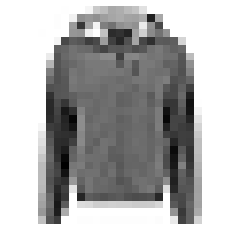

Our model predicted: Coat
The actual answer was: Coat


In [29]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')